# 1 Beginners

## 1.1 Part 1

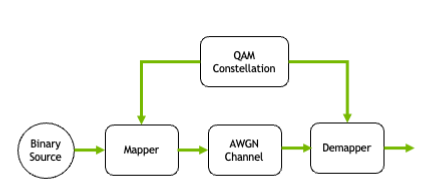

In [1]:
# Imports & Basics

# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow.keras import Model

2023-05-12 16:40:16.223608: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


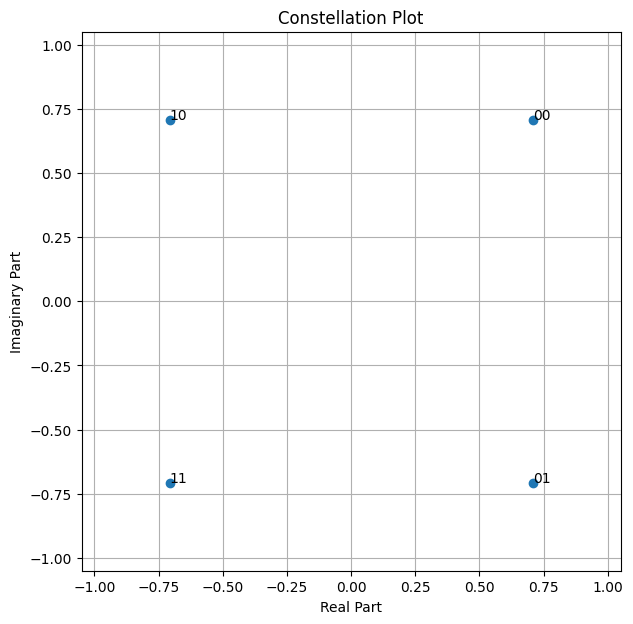

In [2]:
# Constellation

NUM_BITS_PER_SYMBOL = 2 # QPSK
constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL)

constellation.show(figsize=(7,7));

In [3]:
# Mapper and Demapper

mapper = sn.mapping.Mapper(constellation=constellation)

# The demapper uses the same constellation object as the mapper
demapper = sn.mapping.Demapper("app", constellation=constellation)

In [4]:
binary_source = sn.utils.BinarySource()

awgn_channel = sn.channel.AWGN()

no = sn.utils.ebnodb2no(ebno_db=10.0,
                        num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                        coderate=1.0) # Coderate set to 1 as we do uncoded transmission here

BATCH_SIZE = 64 # How many examples are processed by Sionna in parallel

bits = binary_source([BATCH_SIZE,
                      1024]) # Blocklength
print("Shape of bits: ", bits.shape)
print(bits)

x = mapper(bits)
print("Shape of x: ", x.shape)
print("x=",x)

y = awgn_channel([x, no])
print("Shape of y: ", y.shape)
print("y=",y)

llr = demapper([y, no])
print("Shape of llr: ", llr.shape)
print("llr=",llr)

Shape of bits:  (64, 1024)
tf.Tensor(
[[1. 0. 1. ... 0. 1. 0.]
 [0. 1. 1. ... 0. 0. 0.]
 [0. 0. 1. ... 1. 0. 1.]
 ...
 [1. 0. 1. ... 1. 1. 0.]
 [1. 1. 0. ... 1. 0. 1.]
 [1. 0. 1. ... 0. 1. 1.]], shape=(64, 1024), dtype=float32)
Shape of x:  (64, 512)
x= tf.Tensor(
[[-0.70710677+0.70710677j -0.70710677+0.70710677j  0.70710677+0.70710677j
  ...  0.70710677-0.70710677j -0.70710677+0.70710677j
  -0.70710677+0.70710677j]
 [ 0.70710677-0.70710677j -0.70710677-0.70710677j -0.70710677+0.70710677j
  ...  0.70710677+0.70710677j  0.70710677+0.70710677j
   0.70710677+0.70710677j]
 [ 0.70710677+0.70710677j -0.70710677-0.70710677j  0.70710677-0.70710677j
  ... -0.70710677+0.70710677j  0.70710677-0.70710677j
   0.70710677-0.70710677j]
 ...
 [-0.70710677+0.70710677j -0.70710677+0.70710677j  0.70710677+0.70710677j
  ...  0.70710677-0.70710677j  0.70710677-0.70710677j
  -0.70710677+0.70710677j]
 [-0.70710677-0.70710677j  0.70710677-0.70710677j -0.70710677+0.70710677j
  ...  0.70710677-0.70710677j  0.707

In [5]:
num_samples = 8 # how many samples shall be printed
num_symbols = int(num_samples/NUM_BITS_PER_SYMBOL)

print(f"First {num_samples} transmitted bits: {bits[0,:num_samples]}")
print(f"First {num_symbols} transmitted symbols: {np.round(x[0,:num_symbols], 2)}")
print(f"First {num_symbols} received symbols: {np.round(y[0,:num_symbols], 2)}")
print(f"First {num_samples} demapped llrs: {np.round(llr[0,:num_samples], 2)}")

First 8 transmitted bits: [1. 0. 1. 0. 0. 0. 0. 0.]
First 4 transmitted symbols: [-0.71+0.71j -0.71+0.71j  0.71+0.71j  0.71+0.71j]
First 4 received symbols: [-0.53+0.68j -0.99+0.91j  0.61+0.6j   0.85+0.69j]
First 8 demapped llrs: [ 30.13 -38.46  55.76 -51.26 -34.41 -33.89 -48.21 -38.92]


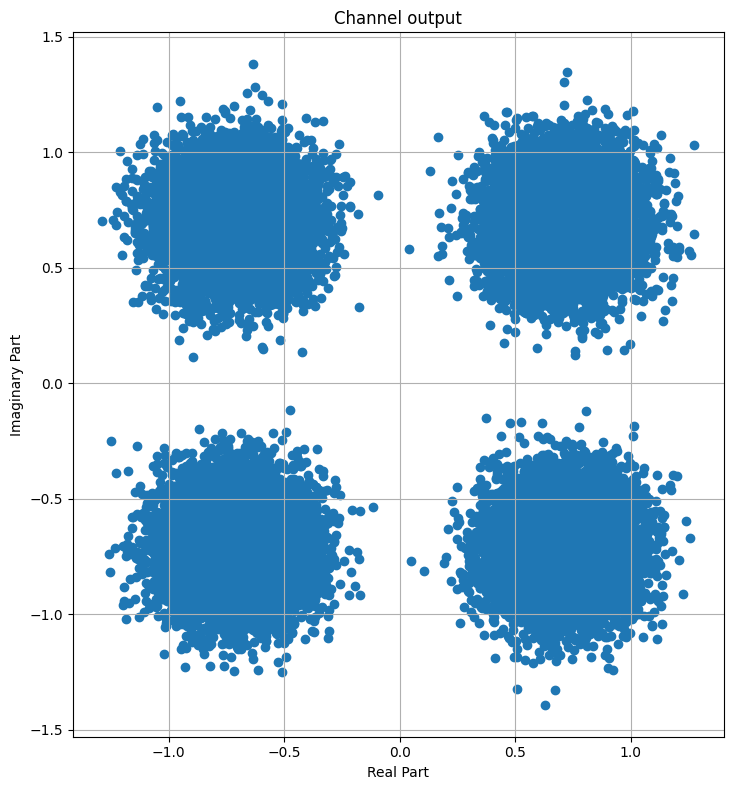

In [6]:
plt.figure(figsize=(8,8))
plt.axes().set_aspect(1)
plt.grid(True)
plt.title('Channel output')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.scatter(tf.math.real(y), tf.math.imag(y))
plt.tight_layout()

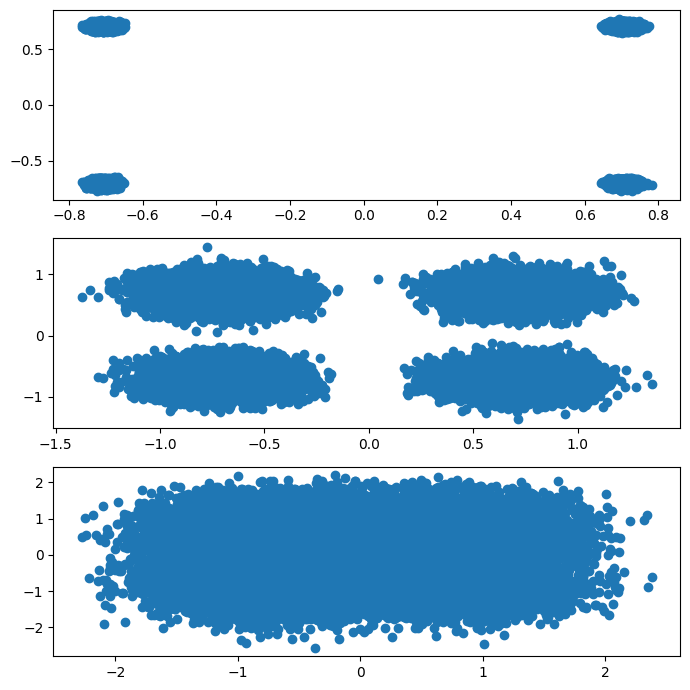

In [7]:
# Task: Change the SNR or Eb/N0 to 30dB to visualize the impact on the received samples
no_1 = sn.utils.ebnodb2no(ebno_db=30.0,
                        num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                        coderate=1.0) # Coderate set to 1 as we do uncoded transmission here

no_2 = sn.utils.ebnodb2no(ebno_db=10.0,
                        num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                        coderate=1.0) # Coderate set to 1 as we do uncoded transmission here

no_3 = sn.utils.ebnodb2no(ebno_db=1.0,
                        num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                        coderate=1.0) # Coderate set to 1 as we do uncoded transmission here

BATCH_SIZE = 64 # How many examples are processed by Sionna in parallel
bits = binary_source([BATCH_SIZE,
                      1024]) # Blocklength
x = mapper(bits)
y_1 = awgn_channel([x, no_1])
llr_1 = demapper([y_1, no_1])
y_2 = awgn_channel([x, no_2])
llr_2 = demapper([y_2, no_2])
y_3 = awgn_channel([x, no_3])
llr_3 = demapper([y_3, no_3])

plt.figure(figsize=(7,7))
plt.axes().set_aspect(1)
plt.grid(True)
plt.title('Channel output')
plt.xlabel('Real Part')
plt.ylabel('Imaginary Part')
plt.subplot(3,1,1)
plt.scatter(tf.math.real(y_1), tf.math.imag(y_1))
plt.subplot(3,1,2)
plt.scatter(tf.math.real(y_2), tf.math.imag(y_2))
plt.subplot(3,1,3)
plt.scatter(tf.math.real(y_3), tf.math.imag(y_3))
plt.tight_layout()

### 1.1.1 Forward Error Correction (FEC)

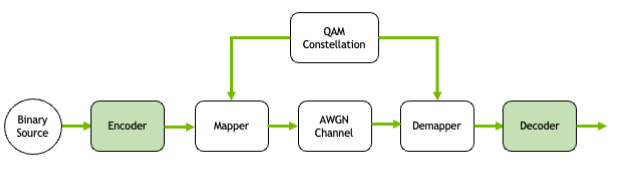

#### Linear Coding

In [8]:
# Linear Encoder

inputs = np.matrix('0 0 1') # Information Bits
print('inputs:',inputs)
gm = np.matrix('1 0 0 1 1 0; 0 1 0 0 1 1; 0 0 1 1 0 1') # Generator Matrix
print('gm:',gm)
c = tf.linalg.matmul(inputs, gm) # Codewords = Information Bits * Generator Matrix
print('c:',c)

# faster implementation of tf.math.mod(c, 2)
c_uint8 = tf.cast(c, tf.uint8)
print('c_uint8:',c_uint8)
c_bin = tf.bitwise.bitwise_and(c_uint8, tf.constant(1, tf.uint8))
print('c_bin:',c_bin)
c = tf.cast(c_bin, tf.float32)
print('c:',c)

inputs: [[0 0 1]]
gm: [[1 0 0 1 1 0]
 [0 1 0 0 1 1]
 [0 0 1 1 0 1]]
c: tf.Tensor([[0 0 1 1 0 1]], shape=(1, 6), dtype=int64)
c_uint8: tf.Tensor([[0 0 1 1 0 1]], shape=(1, 6), dtype=uint8)
c_bin: tf.Tensor([[0 0 1 1 0 1]], shape=(1, 6), dtype=uint8)
c: tf.Tensor([[0. 0. 1. 1. 0. 1.]], shape=(1, 6), dtype=float32)


#### LDPC Coding

In [9]:
k = 12
n = 20

encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)
decoder = sn.fec.ldpc.LDPC5GDecoder(encoder, hard_out=True)

BATCH_SIZE = 1 # one codeword in parallel
u = binary_source([BATCH_SIZE, k])
print("Input bits are: \n", u.numpy())

c = encoder(u)
print("Encoded bits are: \n", c.numpy())

Input bits are: 
 [[0. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 1.]]
Encoded bits are: 
 [[0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0.]]


#### BATCH_SIZE=2, num_basestations=3, num_users=4, k=15

In [10]:
BATCH_SIZE = 2 # samples per scenario
num_basestations = 3 
num_users = 4 # users per basestation
n = 30 # codeword length per transmitted codeword
coderate = 0.5 # coderate

k = int(coderate * n) # number of info bits per codeword

# instantiate a new encoder for codewords of length n
encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)

# the decoder must be linked to the encoder (to know the exact code parameters used for encoding)
decoder = sn.fec.ldpc.LDPC5GDecoder(encoder,
                                    hard_out=True, # binary output or provide soft-estimates
                                    return_infobits=True, # or also return (decoded) parity bits
                                    num_iter=20, # number of decoding iterations
                                    cn_type="boxplus-phi") # also try "minsum" decoding

# draw random bits to encode
u = binary_source([BATCH_SIZE, num_basestations, num_users, k])
print("Shape of u: ", u.shape)
print('u = ', u)

# We can immediately encode u for all users, basetation and samples 
# This all happens with a single line of code
c = encoder(u)
print("Shape of c: ", c.shape)

print("Total number of processed bits: ", np.prod(c.shape))

Shape of u:  (2, 3, 4, 15)
u =  tf.Tensor(
[[[[1. 0. 0. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 1. 0.]
   [0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.]
   [0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0.]
   [0. 0. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 1. 1.]]

  [[0. 1. 1. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 1.]
   [1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 1.]
   [1. 1. 1. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1.]
   [1. 1. 1. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0.]]

  [[0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1.]
   [1. 0. 0. 1. 0. 1. 1. 1. 1. 1. 0. 0. 0. 0. 1.]
   [1. 0. 1. 1. 0. 1. 1. 0. 1. 1. 1. 1. 1. 0. 1.]
   [0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 1. 1. 1.]]]


 [[[1. 0. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1. 0. 0.]
   [1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 1.]
   [1. 0. 1. 0. 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0.]
   [1. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1.]]

  [[1. 1. 1. 1. 0. 1. 1. 1. 0. 1. 0. 1. 0. 0. 0.]
   [1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1. 0. 0.]
   [1. 1. 1. 0. 0. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1

#### Polar Coding

In [11]:
k = 64
n = 128

encoder = sn.fec.polar.Polar5GEncoder(k, n)
decoder = sn.fec.polar.Polar5GDecoder(encoder,
                                      dec_type="SCL") # you can also use "SCL" 

#### Function: hard_decisions

In [12]:
# Imports & Basics

# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow.keras import Model

from sionna.utils.misc import hard_decisions
from sionna.utils.metrics import compute_ber, compute_ser

NUM_BITS_PER_SYMBOL = 4 # QPSK
BLOCK_LENGTH = 1024
BATCH_SIZE = 2000 # How many examples are processed by Sionna in parallel
EBN0_DB_MIN = -3.0 # Minimum value of Eb/N0 [dB] for simulations
EBN0_DB_MAX = 5.0 # Maximum value of Eb/N0 [dB] for simulations
EBN0_DB = 1

# Constellation
constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL)
#constellation.show(figsize=(7,7));

# Mapper and Demapper
mapper = sn.mapping.Mapper(constellation=constellation)
# The demapper uses the same constellation object as the mapper
demapper = sn.mapping.Demapper("app", constellation=constellation)

# Binary source
binary_source = sn.utils.BinarySource()

# AWGN channel
awgn_channel = sn.channel.AWGN()

no = sn.utils.ebnodb2no(ebno_db=EBN0_DB,
                        num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                        coderate=1.0) # Coderate set to 1 as we do uncoded transmission here

bits = binary_source([BATCH_SIZE,
                    BLOCK_LENGTH]) # Blocklength
#print("Shape of bits: ", bits.shape)
#print(bits)

x = mapper(bits)
#print("Shape of x: ", x.shape)
#print("x=",x)

y = awgn_channel([x, no])
#print("Shape of y: ", y.shape)
#print("y=",y)

llr = demapper([y, no])
#print("Shape of llr: ", llr.shape)
print("llr=",llr)

bits_hat = hard_decisions(llr)
print("bits_hat=",bits_hat)

x_hat = mapper(bits_hat)

llr= tf.Tensor(
[[ 6.5658813  10.485719    1.1228318  ... -3.2871299   5.7003026
  -1.0916586 ]
 [ 1.1796231  17.00172    -3.1434727  ... -9.571688    1.9650986
   2.7391493 ]
 [ 0.21869516 -4.607119   -3.9847417  ... -5.442073   -0.3215978
   0.4515493 ]
 ...
 [-4.821438   -8.325066    0.04980087 ... -8.625617    0.33730078
   2.246485  ]
 [11.486536   -9.466869    3.716549   ... -0.8287246  -1.5024168
  -3.5150146 ]
 [ 0.8586159  -8.566353   -3.4845598  ...  5.8297944  -2.065088
   0.690114  ]], shape=(2000, 1024), dtype=float32)
bits_hat= tf.Tensor(
[[1. 1. 1. ... 0. 1. 0.]
 [1. 1. 0. ... 0. 1. 1.]
 [1. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 1. ... 0. 1. 1.]
 [1. 0. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 1. 0. 1.]], shape=(2000, 1024), dtype=float32)


#### About LLR

/var/folders/df/lk9k_37s34v_3m2l25r_rscw0000gp/T/ipykernel_2311/555098243.py:8: RuntimeWarning: divide by zero encountered in log
  y = np.log(x)
/var/folders/df/lk9k_37s34v_3m2l25r_rscw0000gp/T/ipykernel_2311/555098243.py:8: RuntimeWarning: invalid value encountered in log
  y = np.log(x)


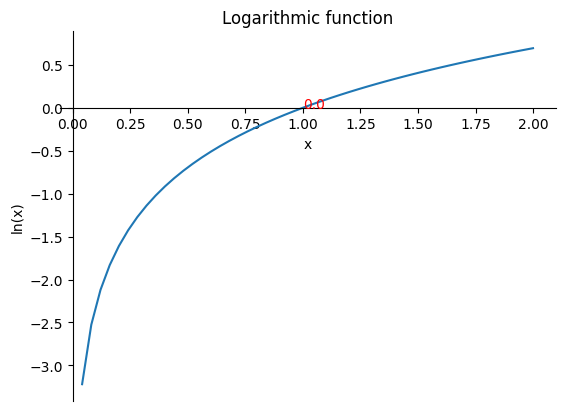

In [13]:
import numpy as np
import matplotlib.pyplot as plt

# Define the x range
x = np.linspace(-2, 2, 101)

# Calculate the y values
y = np.log(x)

# Create the plot
plt.plot(x, y)

# Add labels and title
plt.xlabel('x')
plt.ylabel('ln(x)')
plt.title('Logarithmic function')
plt.text(x[75], y[75], y[75], color = 'r')  # Mark the point (0,1)
# Remove frame of chart
ax = plt.gca()  # Get current axis
ax.spines['right'].set_color('none')  # Set right frame's color as none
ax.spines['top'].set_color('none')
ax.xaxis.set_ticks_position('bottom')
ax.yaxis.set_ticks_position('left')
 
# Set the central of axis as（0，0）
ax.spines['bottom'].set_position(('data', 0))  # The bottom of the specified data setting (that is, the specified x-axis) is bound to the point 0 of the y-axis
ax.spines['left'].set_position(('data', 0))

# Show the plot
plt.show()

### 1.1.2 Part 1 Exercise
Simulate the coded bit error rate (BER) for a Polar coded and 64-QAM modulation. Assume a codeword length of n = 200 and coderate = 0.5.

### LDPC Method

Tracing run_graph for values batch_size=2000 and ebno_db=-3.0.
Tracing run_graph for values batch_size=Tensor("batch_size:0", shape=(), dtype=int32) and ebno_db=Tensor("ebno_db:0", shape=(), dtype=float32).


2023-05-12 16:40:31.128632: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]


EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -3.0 | 3.6974e-01 | 1.0000e+00 |       73209 |      198000 |         2000 |        2000 |         2.6 |reached target block errors
   -2.273 | 3.5830e-01 | 1.0000e+00 |       70944 |      198000 |         2000 |        2000 |         0.8 |reached target block errors
   -1.545 | 3.4517e-01 | 1.0000e+00 |       68344 |      198000 |         2000 |        2000 |         0.8 |reached target block errors
   -0.818 | 3.3285e-01 | 1.0000e+00 |       65904 |      198000 |         2000 |        2000 |         0.8 |reached target block errors
   -0.091 | 3.1755e-01 | 1.0000e+00 |       62875 |      198000 |         2000 |        2000 |         0.9 |reached target block errors
    0.636 | 3.0066e-01 | 1.0000e+00 |       59531 |      198000 |

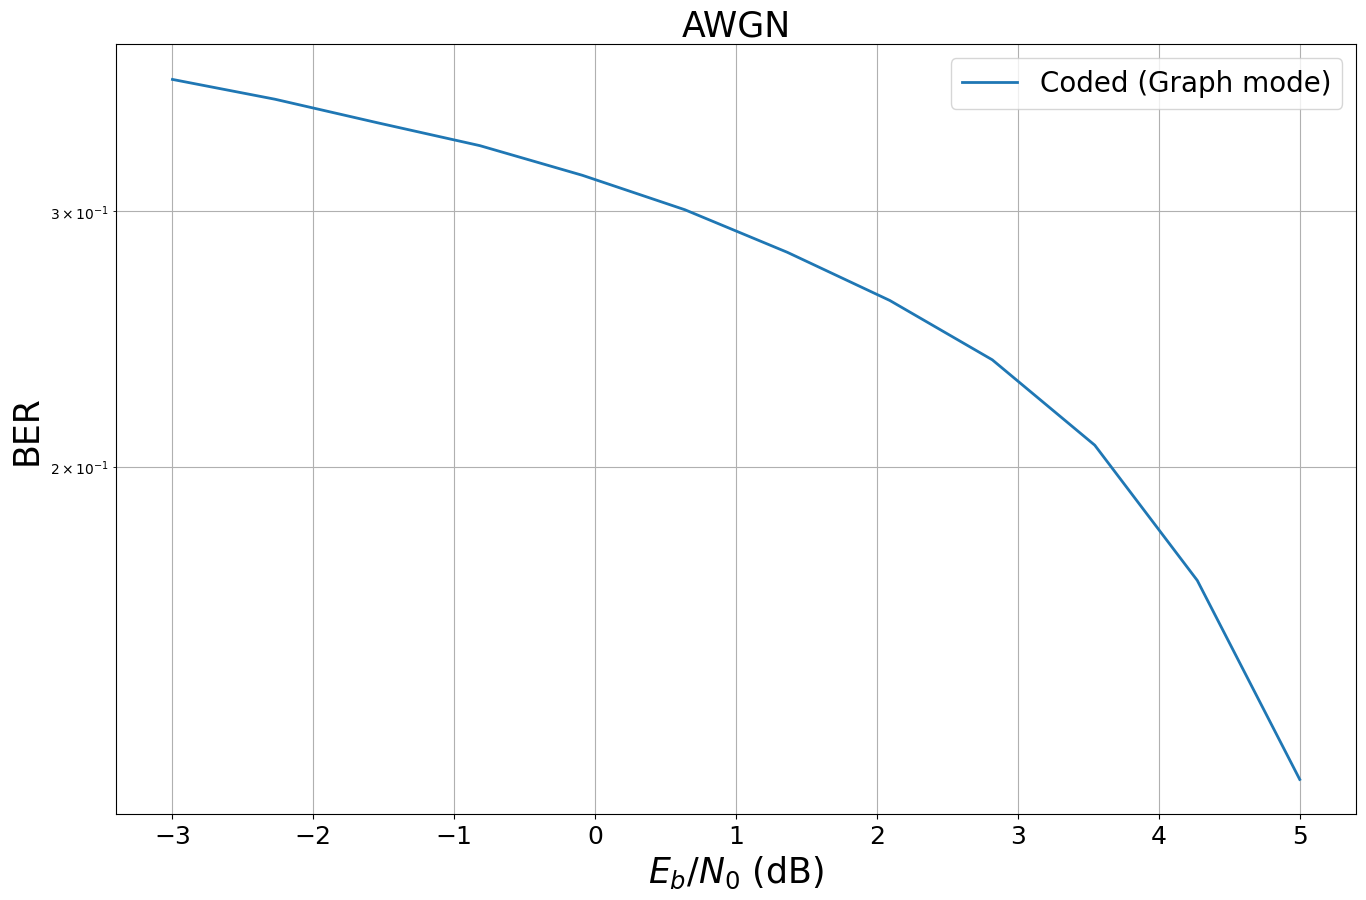

In [14]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
# also try %matplotlib widget

import matplotlib.pyplot as plt

# for performance measurements
import time

# For the implementation of the Keras models
from tensorflow.keras import Model

class UncodedSystemAWGN(Model): # Inherits from Keras Model
    def __init__(self, num_bits_per_symbol, block_length):
        """
        A keras model of an uncoded transmission over the AWGN channel.

        Parameters
        ----------
        num_bits_per_symbol: int
            The number of bits per constellation symbol, e.g., 4 for QAM16.

        block_length: int
            The number of bits per transmitted message block (will be the codeword length later).

        Input
        -----
        batch_size: int
            The batch_size of the Monte-Carlo simulation.

        ebno_db: float
            The `Eb/No` value (=rate-adjusted SNR) in dB.

        Output
        ------
        (bits, llr):
            Tuple:

        bits: tf.float32
            A tensor of shape `[batch_size, block_length] of 0s and 1s
            containing the transmitted information bits.

        llr: tf.float32
            A tensor of shape `[batch_size, block_length] containing the
            received log-likelihood-ratio (LLR) values.
        """

        super().__init__() # Must call the Keras model initializer

        self.num_bits_per_symbol = num_bits_per_symbol
        self.block_length = block_length
        self.constellation = sn.mapping.Constellation("qam", self.num_bits_per_symbol)
        self.mapper = sn.mapping.Mapper(constellation=self.constellation)
        self.demapper = sn.mapping.Demapper("app", constellation=self.constellation)
        self.binary_source = sn.utils.BinarySource()
        self.awgn_channel = sn.channel.AWGN()

    # @tf.function # Enable graph execution to speed things up
    def __call__(self, batch_size, ebno_db):

        # no channel coding used; we set coderate=1.0
        no = sn.utils.ebnodb2no(ebno_db,
                                num_bits_per_symbol=self.num_bits_per_symbol,
                                coderate=1.0)

        bits = self.binary_source([batch_size, self.block_length]) # Blocklength set to 1024 bits
        x = self.mapper(bits)
        y = self.awgn_channel([x, no])
        llr = self.demapper([y,no])
        return bits, llr

class CodedSystemAWGN(Model): # Inherits from Keras Model
    def __init__(self, num_bits_per_symbol, n, coderate):
        super().__init__() # Must call the Keras model initializer

        self.num_bits_per_symbol = num_bits_per_symbol
        self.n = n
        self.k = int(n*coderate)
        self.coderate = coderate
        self.constellation = sn.mapping.Constellation("qam", self.num_bits_per_symbol)

        self.mapper = sn.mapping.Mapper(constellation=self.constellation)
        self.demapper = sn.mapping.Demapper("app", constellation=self.constellation)

        self.binary_source = sn.utils.BinarySource()
        self.awgn_channel = sn.channel.AWGN()

        self.encoder = sn.fec.ldpc.LDPC5GEncoder(self.k, self.n)
        self.decoder = sn.fec.ldpc.LDPC5GDecoder(self.encoder, hard_out=True)

    #@tf.function # activate graph execution to speed things up
    def __call__(self, batch_size, ebno_db):
        no = sn.utils.ebnodb2no(ebno_db, num_bits_per_symbol=self.num_bits_per_symbol, coderate=self.coderate)

        bits = self.binary_source([batch_size, self.k])
        codewords = self.encoder(bits)
        x = self.mapper(codewords)
        y = self.awgn_channel([x, no])
        llr = self.demapper([y,no])
        bits_hat = self.decoder(llr)
        return bits, bits_hat

@tf.function() # enables graph-mode of the following function
def run_graph(batch_size, ebno_db):
    # all code inside this function will be executed in graph mode, also calls of other functions
    print(f"Tracing run_graph for values batch_size={batch_size} and ebno_db={ebno_db}.") # print whenever this function is traced
    return model_coded_awgn(batch_size, ebno_db)

# *You can implement your code here*

n = 198
NUM_BITS_PER_SYMBOL = 6
BATCH_SIZE = 2000 # How many examples are processed by Sionna in parallel
batch_size = BATCH_SIZE
CODERATE = 0.5
ebno_db = -3.0
EBN0_DB_MIN = -3.0 # Minimum value of Eb/N0 [dB] for simulations
EBN0_DB_MAX = 5.0 # Maximum value of Eb/N0 [dB] for simulations

model_uncoded_awgn = UncodedSystemAWGN(num_bits_per_symbol=NUM_BITS_PER_SYMBOL, 
                                       block_length=1024)

model_coded_awgn = CodedSystemAWGN(num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                                   n=n,
                                   coderate=CODERATE)

run_graph(batch_size, ebno_db)

ber_plots = sn.utils.PlotBER("AWGN")

# ber_plots.simulate(model_uncoded_awgn,
#                   ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
#                   batch_size=BATCH_SIZE,
#                   num_target_block_errors=100, # simulate until 100 block errors occured
#                   legend="Uncoded",
#                   soft_estimates=True,
#                   max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
#                   show_fig=True);

# ber_plots.simulate(model_coded_awgn,
#                    ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 15),
#                    batch_size=BATCH_SIZE,
#                    num_target_block_errors=500,
#                    legend="Coded",
#                    soft_estimates=False,
#                    max_mc_iter=15,
#                    show_fig=True,
#                    forward_keyboard_interrupt=False);

ber_plots.simulate(run_graph,
                   ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 12),
                   batch_size=BATCH_SIZE,
                   num_target_block_errors=500,
                   legend="Coded (Graph mode)",
                   soft_estimates=True,
                   max_mc_iter=100,
                   show_fig=True,
                   forward_keyboard_interrupt=False);

## 1.5 Part 5: Simple MIMO Simulations

https://nvlabs.github.io/sionna/examples/Simple_MIMO_Simulation.html#

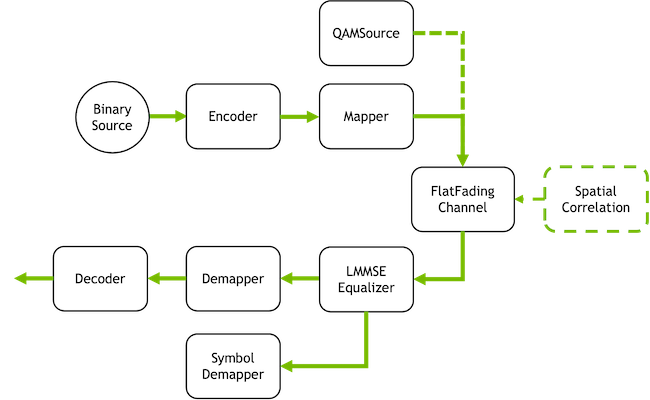

### 1.5.1 Flat-Fading Channel

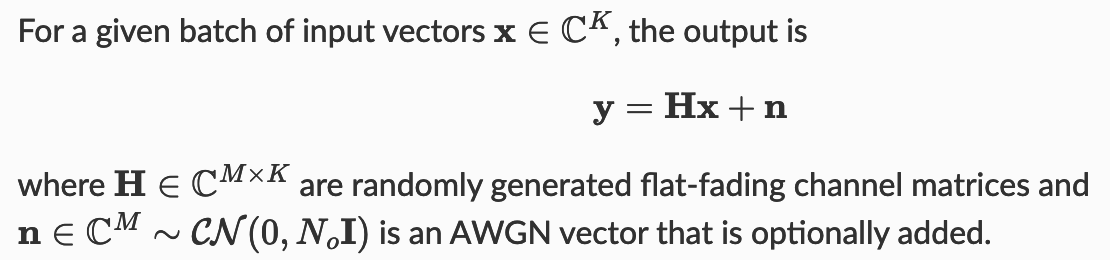

Number of GPUs available : 0
x.shape = (3, 2)
x =
 tf.Tensor(
[[-0.9486833+0.3162278j -0.9486833+0.3162278j]
 [ 0.9486833-0.3162278j -0.9486833-0.9486833j]
 [-0.9486833-0.3162278j  0.3162278+0.3162278j]], shape=(3, 2), dtype=complex64)
h.shape = (3, 2, 2)
h =
 tf.Tensor(
[[[-0.85421723-1.2312891j   1.1148505 -0.14536183j]
  [-0.45200685-0.3583084j   1.1171546 +0.5563888j ]]

 [[ 0.4736864 +0.8139342j   0.13166098+0.19973767j]
  [ 0.3096391 +0.18130857j -0.72406244-0.07861122j]]

 [[ 0.6749716 -0.19448811j -0.2368034 +0.75044453j]
  [ 1.0423853 -0.9172902j  -1.0336461 +1.4035165j ]]], shape=(3, 2, 2), dtype=complex64)
y.shape = (3, 2)
y =
 tf.Tensor(
[[ 0.00851066+1.5771741j  -0.60742474+0.1563159j ]
 [ 0.80750996+0.03389832j  1.1264333 +0.6101942j ]
 [-1.0022612 -0.05328633j -1.9965721 +0.7390953j ]], shape=(3, 2), dtype=complex64)


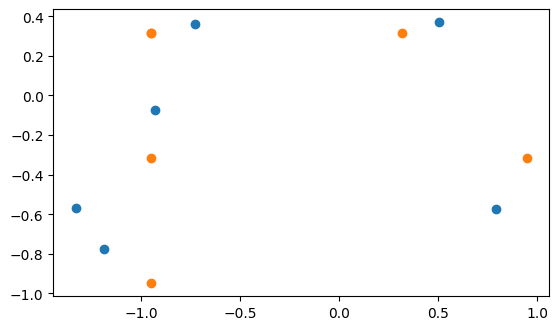

In [15]:
### GPU Configuration and Imports
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

### Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn
    
from sionna.utils import BinarySource, QAMSource, ebnodb2no, compute_ser, compute_ber, PlotBER
from sionna.channel import FlatFadingChannel, KroneckerModel
from sionna.channel.utils import exp_corr_mat
from sionna.mimo import lmmse_equalizer
from sionna.mapping import SymbolDemapper, Mapper, Demapper
from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

### Simple Uncoded Transmission
num_tx_ant = 2 # Number of Transmitter Antennas
num_rx_ant = 2 # Number of Receiver Antennas
num_bits_per_symbol = 4 # 16 QAM
batch_size = 3 # Parallel in 3 batches
qam_source = QAMSource(num_bits_per_symbol)
x = qam_source([batch_size, num_tx_ant])
print('x.shape =',x.shape) # (batch_size=3, num_tx_ant=2)
print('x =\n',x)

### Create `FlatFadingChannel` to simulate transmissions over an i.i.d. Rayleigh fading channel. The channel will also add AWGN with variance `no`.
channel = FlatFadingChannel(num_tx_ant, num_rx_ant, add_awgn=True, return_channel=True)
no = 0.2 # Noise Variance of the Transmission Channel

# y and h are the Channel Output and Channel Realizations, respectively.
y, h = channel([x, no]) # x = qam_source([batch_size, num_tx_ant]), no = 0.2
print('h.shape =',h.shape)
print('h =\n',h)
print('y.shape =',y.shape)
print('y =\n',y)

s = tf.cast(no*tf.eye(num_rx_ant, num_rx_ant), y.dtype)
x_hat, no_eff = lmmse_equalizer(y, h, s)

plt.axes().set_aspect(1.0)
plt.scatter(np.real(x_hat), np.imag(x_hat));
plt.scatter(np.real(x), np.imag(x));

### Analysis of Function 'complex_normal' called by FlatFadingChannel

In [16]:
### Import Libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sys

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn
    
from sionna.utils import BinarySource, QAMSource, ebnodb2no, compute_ser, compute_ber, PlotBER
from sionna.channel import FlatFadingChannel, KroneckerModel
from sionna.channel.utils import exp_corr_mat
from sionna.mimo import lmmse_equalizer
from sionna.mapping import SymbolDemapper, Mapper, Demapper
from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

import tensorflow as tf
from sionna.channel import AWGN
from sionna.utils import complex_normal
from sionna.utils import BinarySource, QAMSource, ebnodb2no, compute_ser, compute_ber, PlotBER

def complex_normal(shape, var=1.0, dtype=tf.complex64):
    r"""Generates a tensor of complex normal random variables.

    Input
    -----
    shape : tf.shape, or list
        The desired shape.

    var : float
        The total variance., i.e., each complex dimension has
        variance ``var/2``.

    dtype: tf.complex
        The desired dtype. Defaults to `tf.complex64`.

    Output
    ------
    : ``shape``, ``dtype``
        Tensor of complex normal random variables.
    """
    # Half the variance for each dimension
    var_dim = tf.cast(var, dtype.real_dtype)/tf.cast(2, dtype.real_dtype)
    stddev = tf.sqrt(var_dim)

    # Generate complex Gaussian noise with the right variance
    xr = tf.random.normal(shape, stddev=stddev, dtype=dtype.real_dtype)
    xi = tf.random.normal(shape, stddev=stddev, dtype=dtype.real_dtype)
    x = tf.complex(xr, xi)

    return x

num_tx_ant = 2
num_rx_ant = 2
batch_size = 3
no = 0.2
num_bits_per_symbol = 4

qam_source = QAMSource(num_bits_per_symbol)
x = qam_source([batch_size, num_tx_ant])
print('x.shape =',x.shape)
print('x =',x)

shape = [batch_size, num_rx_ant, num_tx_ant]
h = complex_normal(shape)
print('h.shape =',h.shape)
print('h',h)

awgn_channel = sn.channel.AWGN()

x = tf.expand_dims(x, axis=-1)
print('x.shape =',x.shape)
print('x =',x)
y = tf.matmul(h, x)
print('y.shape =',y.shape)
print('y =',y)
y = tf.squeeze(y, axis=-1)
print('y.shape =',y.shape)
print('y =',y)
y = awgn_channel([y, no])
print('y.shape =',y.shape)
print('y =',y)


x.shape = (3, 2)
x = tf.Tensor(
[[ 0.9486833-0.9486833j -0.9486833-0.3162278j]
 [ 0.9486833+0.9486833j  0.3162278-0.3162278j]
 [ 0.3162278+0.3162278j -0.9486833-0.3162278j]], shape=(3, 2), dtype=complex64)
h.shape = (3, 2, 2)
h tf.Tensor(
[[[-0.439785  +0.41576213j -0.10256935-0.36312783j]
  [-0.88547   +0.28328276j -0.8862436 -0.8631466j ]]

 [[ 1.0932513 +0.2742706j  -0.18161774+0.5861236j ]
  [ 0.2992382 -0.35860625j -0.71292424-1.209194j  ]]

 [[ 0.44033653-0.86169416j -0.565203  -0.27643344j]
  [-0.94650906+0.4459236j   0.793169  -0.73681754j]]], shape=(3, 2, 2), dtype=complex64)
x.shape = (3, 2, 1)
x = tf.Tensor(
[[[ 0.9486833-0.9486833j]
  [-0.9486833-0.3162278j]]

 [[ 0.9486833+0.9486833j]
  [ 0.3162278-0.3162278j]]

 [[ 0.3162278+0.3162278j]
  [-0.9486833-0.3162278j]]], shape=(3, 2, 1), dtype=complex64)
y.shape = (3, 2, 1)
y = tf.Tensor(
[[[-0.04031538+1.1885718j ]
  [-0.00347143+2.2078838j ]]

 [[ 0.9048693 +1.5401264j ]
  [ 0.01625884-0.21325573j]]

 [[ 0.860521  +0.3077357j

## 2 Differentiable Communication Systems

### Gradient Computation Through End-to-end Systems

BCE: 0.0001753031392581761
(2, 64)


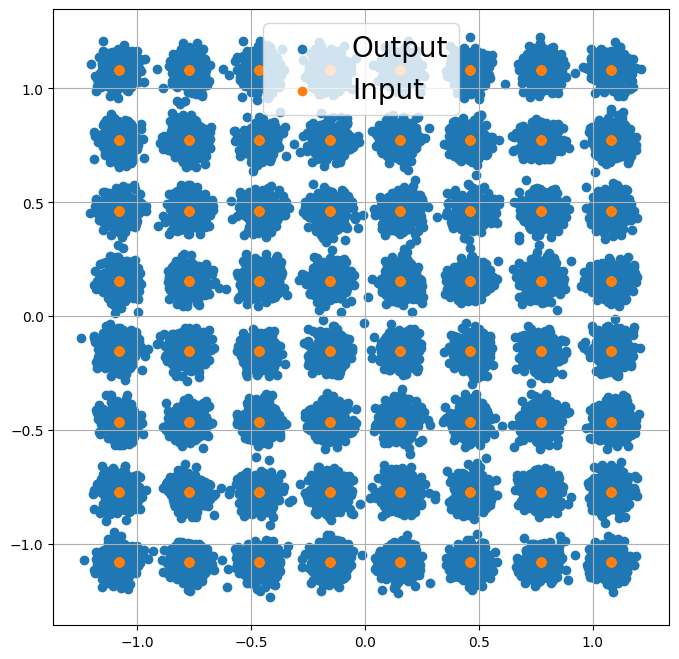

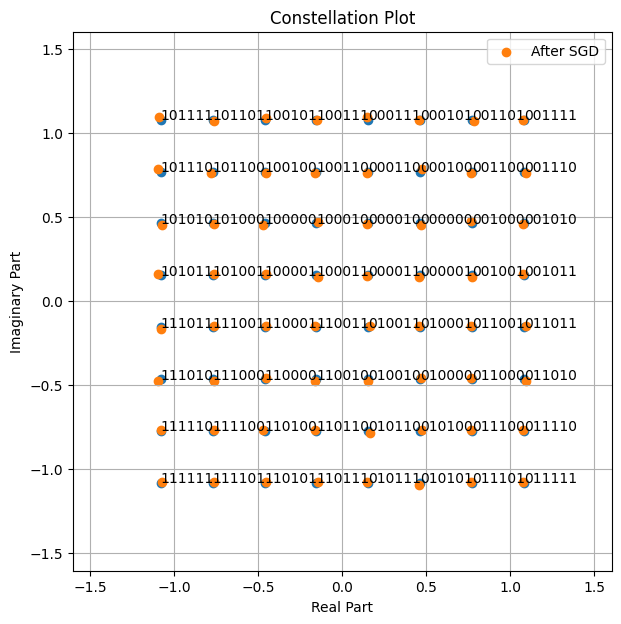

In [17]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# For saving complex Python data structures efficiently
import pickle

# For the implementation of the neural receiver
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Layer


# Gradient Computation Through End-to-end Systems
# Binary source to generate uniform i.i.d. bits
binary_source = sn.utils.BinarySource()

# 256-QAM constellation
NUM_BITS_PER_SYMBOL = 6
constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL, trainable=True) # The constellation is set to be trainable

# Mapper and demapper
mapper = sn.mapping.Mapper(constellation=constellation)
demapper = sn.mapping.Demapper("app", constellation=constellation)

# AWGN channel
awgn_channel = sn.channel.AWGN()

BATCH_SIZE = 128 # How many examples are processed by Sionna in parallel
EBN0_DB = 17.0 # Eb/N0 in dB

no = sn.utils.ebnodb2no(ebno_db=EBN0_DB,
                        num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                        coderate=1.0) # Coderate set to 1 as we do uncoded transmission here

bits = binary_source([BATCH_SIZE,
                        1200]) # Blocklength
x = mapper(bits)
y = awgn_channel([x, no])
llr = demapper([y,no])

plt.figure(figsize=(8,8))
plt.axes().set_aspect(1.0)
plt.grid(True)
plt.scatter(tf.math.real(y), tf.math.imag(y), label='Output')
plt.scatter(tf.math.real(x), tf.math.imag(x), label='Input')
plt.legend(fontsize=20);

# Binary cross-entropy (BCE) as the loss function
bce = tf.keras.losses.BinaryCrossentropy(from_logits=True)
print(f"BCE: {bce(bits, llr)}")


# Stochastic Gradient Descent (SGD)
# Step 1: Operate the transmission system and calculate the loss function at receiver
with tf.GradientTape() as tape:
    bits = binary_source([BATCH_SIZE,
                            1200]) # Blocklength
    x = mapper(bits)
    y = awgn_channel([x, no])
    llr = demapper([y,no])
    loss = bce(bits, llr)
# Step 2: Calculate the gradient of the loss function with trainable weights
gradient = tape.gradient(loss, tape.watched_variables())
for g in gradient:
    print(g.shape)
# Step 3: Update weights by applyig the gradient from Step 2 to Adam optimizer 
optimizer = tf.keras.optimizers.Adam(1e-2)
optimizer.apply_gradients(zip(gradient, tape.watched_variables()));


fig = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL).show()
fig.axes[0].scatter(tf.math.real(constellation.points), tf.math.imag(constellation.points), label='After SGD')
fig.axes[0].legend();

### Creating Custom Layers

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     10.0 | 2.5794e-02 | 1.0000e+00 |        3962 |      153600 |          128 |         128 |         0.1 |reached target block errors
   10.526 | 2.1517e-02 | 1.0000e+00 |        3305 |      153600 |          128 |         128 |         0.1 |reached target block errors
   11.053 | 1.6549e-02 | 1.0000e+00 |        2542 |      153600 |          128 |         128 |         0.1 |reached target block errors
   11.579 | 1.1973e-02 | 1.0000e+00 |        1839 |      153600 |          128 |         128 |         0.2 |reached target block errors
   12.105 | 8.9128e-03 | 1.0000e+00 |        1369 |      153600 |          128 |         128 |         0.2 |reached target block errors
   12.632 | 6.4323e-03 | 1.0000e+00 |         988 |      153600 |

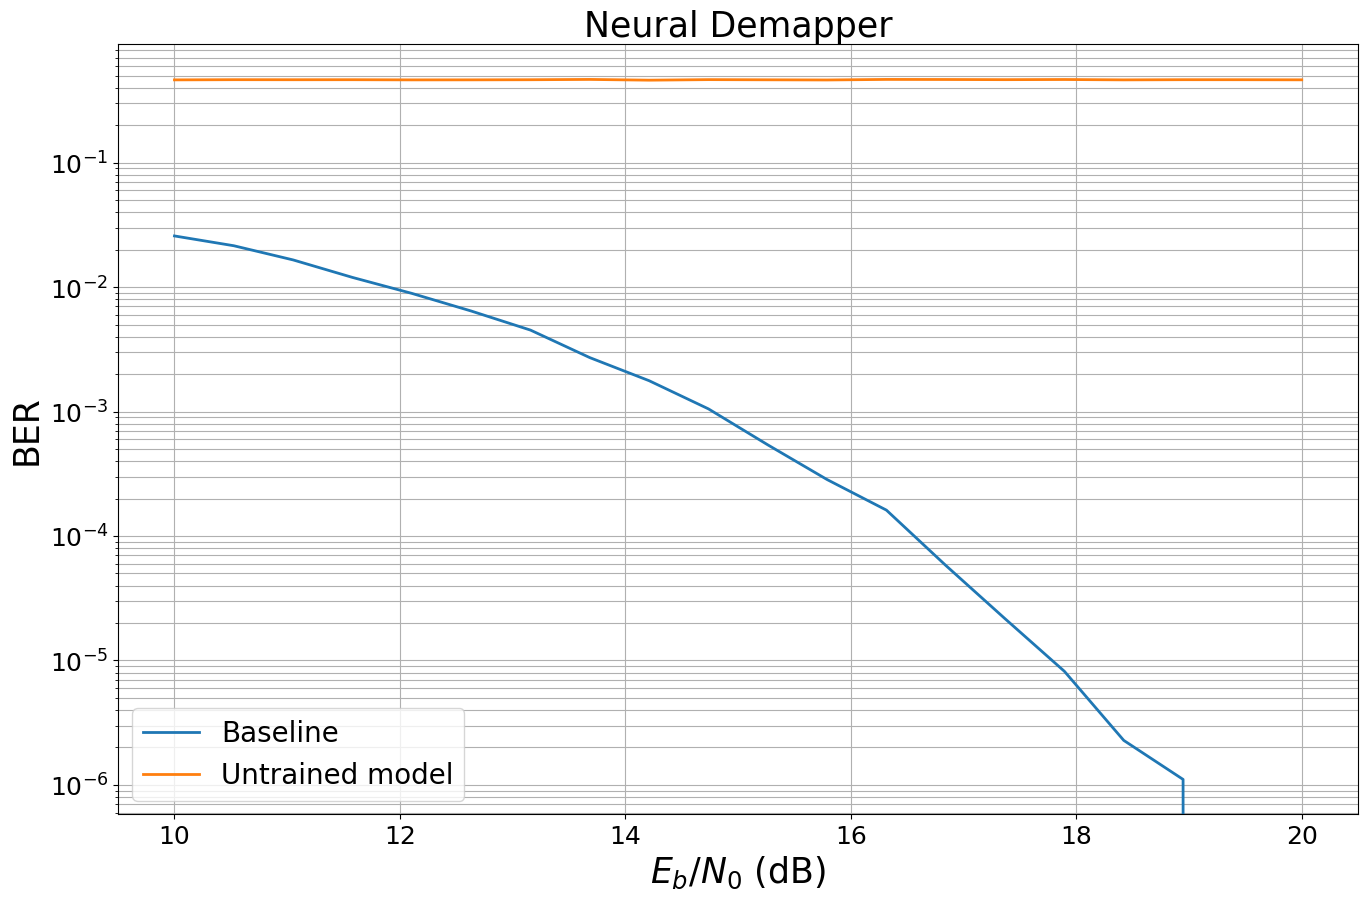

In [18]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# For saving complex Python data structures efficiently
import pickle

# For the implementation of the neural receiver
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Layer

class NeuralDemapper(Layer): # Inherits from Keras Layer

    def __init__(self):
        super().__init__()

        # The three dense layers that form the custom trainable neural network-based demapper
        self.dense_1 = Dense(64, 'relu')
        self.dense_2 = Dense(64, 'relu')
        self.dense_3 = Dense(NUM_BITS_PER_SYMBOL, None) # The last layer has no activation and therefore outputs logits, i.e., LLRs

    def call(self, y):

        # y : complex-valued with shape [batch size, block length]
        # y is first mapped to a real-valued tensor with shape
        #  [batch size, block length, 2]
        # where the last dimension consists of the real and imaginary components
        # The dense layers operate on the last dimension, and treat the inner dimensions as batch dimensions, i.e.,
        # all the received symbols are independently processed.
        nn_input = tf.stack([tf.math.real(y), tf.math.imag(y)], axis=-1)
        z = self.dense_1(nn_input)
        z = self.dense_2(z)
        z = self.dense_3(z) # [batch size, number of symbols per block, number of bits per symbol]
        llr = tf.reshape(z, [tf.shape(y)[0], -1]) # [batch size, number of bits per block]
        return llr

class End2EndSystem(Model): # Inherits from Keras Model

    def __init__(self, training):

        super().__init__() # Must call the Keras model initializer

        self.constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL, trainable=True) # Constellation is trainable
        self.mapper = sn.mapping.Mapper(constellation=self.constellation)
        self.demapper = NeuralDemapper() # Intantiate the NeuralDemapper custom layer as any other
        self.binary_source = sn.utils.BinarySource()
        self.awgn_channel = sn.channel.AWGN()
        self.bce = tf.keras.losses.BinaryCrossentropy(from_logits=True) # Loss function

        self.training = training

    # @tf.function(jit_compile=True) # Enable graph execution to speed things up
    def __call__(self, batch_size, ebno_db):

        # no channel coding used; we set coderate=1.0
        no = sn.utils.ebnodb2no(ebno_db,
                                num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                                coderate=1.0)
        bits = self.binary_source([batch_size, 1200]) # Blocklength set to 1200 bits
        x = self.mapper(bits)
        y = self.awgn_channel([x, no])
        llr = self.demapper(y)  # Call the NeuralDemapper custom layer as any other
        if self.training:
            loss = self.bce(bits, llr)
            return loss
        else:
            return bits, llr

EBN0_DB_MIN = 10.0
EBN0_DB_MAX = 20.0


###############################
# Baseline
###############################

class Baseline(Model): # Inherits from Keras Model

    def __init__(self):

        super().__init__() # Must call the Keras model initializer

        self.constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL)
        self.mapper = sn.mapping.Mapper(constellation=self.constellation)
        self.demapper = sn.mapping.Demapper("app", constellation=self.constellation)
        self.binary_source = sn.utils.BinarySource()
        self.awgn_channel = sn.channel.AWGN()

    # @tf.function # Enable graph execution to speed things up
    def __call__(self, batch_size, ebno_db):

        # no channel coding used; we set coderate=1.0
        no = sn.utils.ebnodb2no(ebno_db,
                                num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                                coderate=1.0)
        bits = self.binary_source([batch_size, 1200]) # Blocklength set to 1200 bits
        x = self.mapper(bits)
        y = self.awgn_channel([x, no])
        llr = self.demapper([y,no])
        return bits, llr

###############################
# Benchmarking
###############################

baseline = Baseline()
model = End2EndSystem(False)
ber_plots = sn.utils.PlotBER("Neural Demapper")
ber_plots.simulate(baseline,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Baseline",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);
ber_plots.simulate(model,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Untrained model",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=True);

### Setting up Training Loops

EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     10.0 | 2.6823e-02 | 1.0000e+00 |        4120 |      153600 |          128 |         128 |         0.1 |reached target block errors
   10.526 | 2.1432e-02 | 1.0000e+00 |        3292 |      153600 |          128 |         128 |         0.1 |reached target block errors
   11.053 | 1.6497e-02 | 1.0000e+00 |        2534 |      153600 |          128 |         128 |         0.1 |reached target block errors
   11.579 | 1.2396e-02 | 1.0000e+00 |        1904 |      153600 |          128 |         128 |         0.1 |reached target block errors
   12.105 | 9.3555e-03 | 1.0000e+00 |        1437 |      153600 |          128 |         128 |         0.3 |reached target block errors
   12.632 | 6.6016e-03 | 1.0000e+00 |        1014 |      153600 |

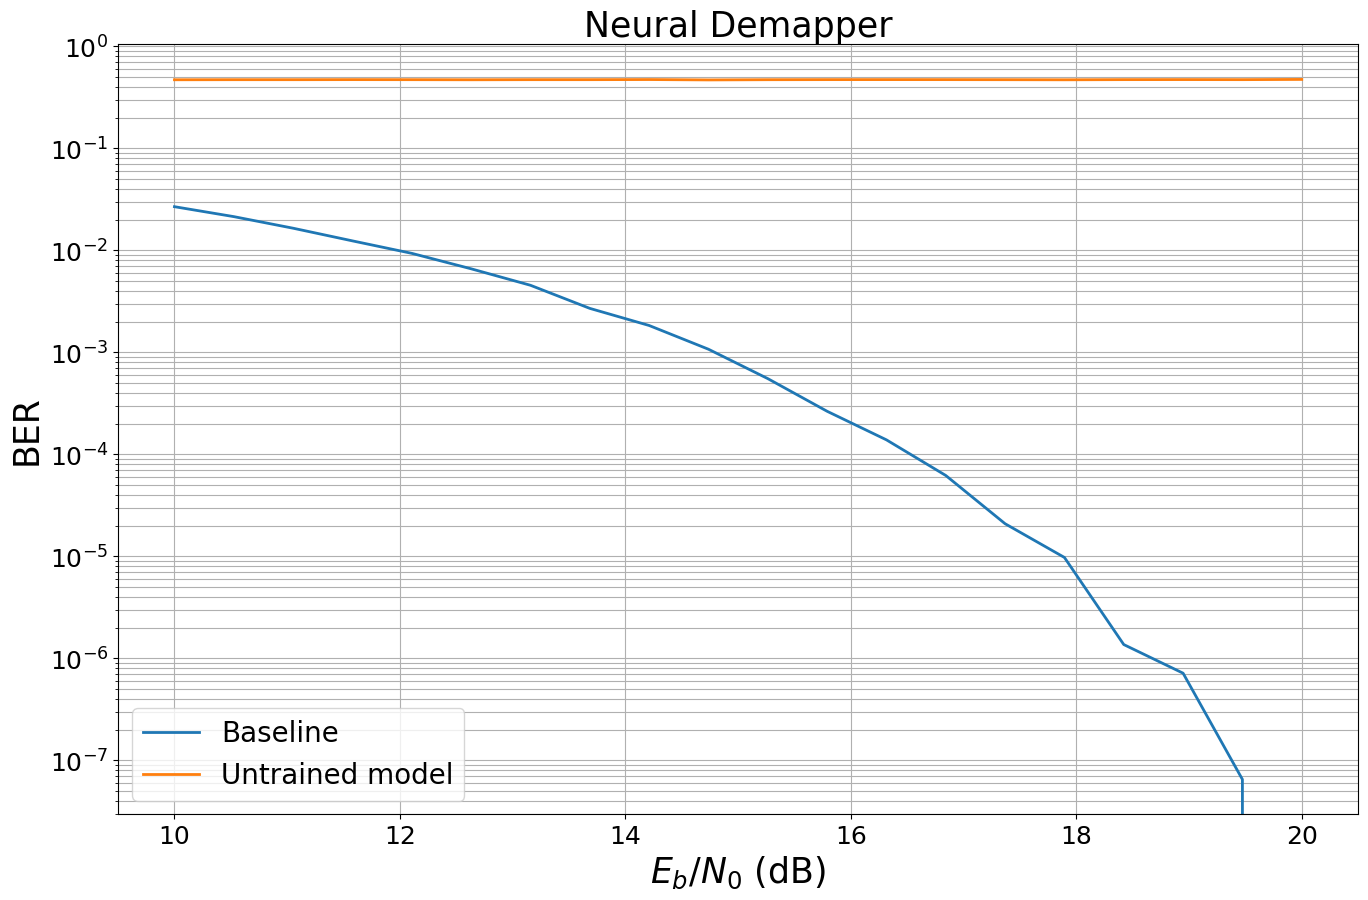

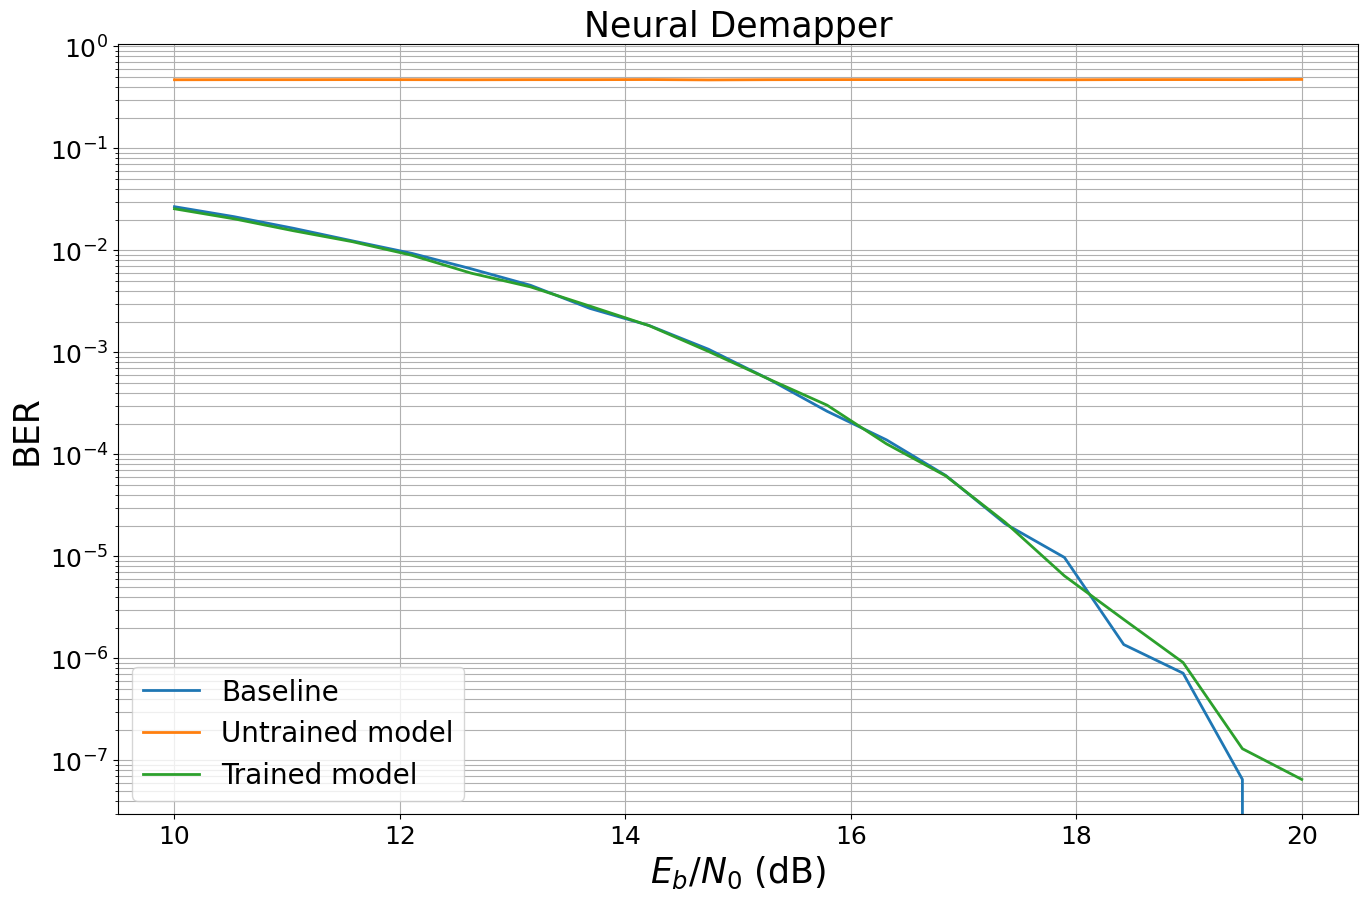

In [19]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# For saving complex Python data structures efficiently
import pickle

# For the implementation of the neural receiver
from tensorflow.keras import Model
from tensorflow.keras.layers import Dense, Layer

class NeuralDemapper(Layer): # Inherits from Keras Layer

    def __init__(self):
        super().__init__()

        # The three dense layers that form the custom trainable neural network-based demapper
        self.dense_1 = Dense(64, 'relu')
        self.dense_2 = Dense(64, 'relu')
        self.dense_3 = Dense(NUM_BITS_PER_SYMBOL, None) # The last layer has no activation and therefore outputs logits, i.e., LLRs

    def call(self, y):

        # y : complex-valued with shape [batch size, block length]
        # y is first mapped to a real-valued tensor with shape
        #  [batch size, block length, 2]
        # where the last dimension consists of the real and imaginary components
        # The dense layers operate on the last dimension, and treat the inner dimensions as batch dimensions, i.e.,
        # all the received symbols are independently processed.
        nn_input = tf.stack([tf.math.real(y), tf.math.imag(y)], axis=-1)
        z = self.dense_1(nn_input)
        z = self.dense_2(z)
        z = self.dense_3(z) # [batch size, number of symbols per block, number of bits per symbol]
        llr = tf.reshape(z, [tf.shape(y)[0], -1]) # [batch size, number of bits per block]
        return llr

class End2EndSystem(Model): # Inherits from Keras Model

    def __init__(self, training):

        super().__init__() # Must call the Keras model initializer

        self.constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL, trainable=True) # Constellation is trainable
        self.mapper = sn.mapping.Mapper(constellation=self.constellation)
        self.demapper = NeuralDemapper() # Intantiate the NeuralDemapper custom layer as any other
        self.binary_source = sn.utils.BinarySource()
        self.awgn_channel = sn.channel.AWGN()
        self.bce = tf.keras.losses.BinaryCrossentropy(from_logits=True) # Loss function

        self.training = training

    # @tf.function(jit_compile=True) # Enable graph execution to speed things up
    def __call__(self, batch_size, ebno_db):

        # no channel coding used; we set coderate=1.0
        no = sn.utils.ebnodb2no(ebno_db,
                                num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                                coderate=1.0)
        bits = self.binary_source([batch_size, 1200]) # Blocklength set to 1200 bits
        x = self.mapper(bits)
        y = self.awgn_channel([x, no])
        llr = self.demapper(y)  # Call the NeuralDemapper custom layer as any other
        if self.training:
            loss = self.bce(bits, llr)
            return loss
        else:
            return bits, llr

EBN0_DB_MIN = 10.0
EBN0_DB_MAX = 20.0


###############################
# Baseline
###############################

class Baseline(Model): # Inherits from Keras Model

    def __init__(self):

        super().__init__() # Must call the Keras model initializer

        self.constellation = sn.mapping.Constellation("qam", NUM_BITS_PER_SYMBOL)
        self.mapper = sn.mapping.Mapper(constellation=self.constellation)
        self.demapper = sn.mapping.Demapper("app", constellation=self.constellation)
        self.binary_source = sn.utils.BinarySource()
        self.awgn_channel = sn.channel.AWGN()

    # @tf.function # Enable graph execution to speed things up
    def __call__(self, batch_size, ebno_db):

        # no channel coding used; we set coderate=1.0
        no = sn.utils.ebnodb2no(ebno_db,
                                num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
                                coderate=1.0)
        bits = self.binary_source([batch_size, 1200]) # Blocklength set to 1200 bits
        x = self.mapper(bits)
        y = self.awgn_channel([x, no])
        llr = self.demapper([y,no])
        return bits, llr

###############################
# Benchmarking
###############################

baseline = Baseline()
model = End2EndSystem(False)
ber_plots = sn.utils.PlotBER("Neural Demapper")
ber_plots.simulate(baseline,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Baseline",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);
ber_plots.simulate(model,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Untrained model",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=True);

# Number of iterations used for training
NUM_TRAINING_ITERATIONS = 30000

# Set a seed for reproducibility
tf.random.set_seed(1)

# Instantiating the end-to-end model for training
model_train = End2EndSystem(training=True)

# Adam optimizer (SGD variant)
optimizer = tf.keras.optimizers.Adam()

# Training loop
for i in range(NUM_TRAINING_ITERATIONS):
    # Forward pass
    with tf.GradientTape() as tape:
        loss = model_train(BATCH_SIZE, 15.0) # The model is assumed to return the BMD rate
    # Computing and applying gradients
    grads = tape.gradient(loss, model_train.trainable_weights)
    optimizer.apply_gradients(zip(grads, model_train.trainable_weights))
    # Print progress
    if i % 100 == 0:
        print(f"{i}/{NUM_TRAINING_ITERATIONS}  Loss: {loss:.2E}", end="\r")

# Save the weightsin a file
weights = model_train.get_weights()
with open('weights-neural-demapper', 'wb') as f:
    pickle.dump(weights, f)

# Instantiating the end-to-end model for evaluation
model = End2EndSystem(training=False)
# Run one inference to build the layers and loading the weights
model(tf.constant(1, tf.int32), tf.constant(10.0, tf.float32))
with open('weights-neural-demapper', 'rb') as f:
    weights = pickle.load(f)
    model.set_weights(weights)

# Computing and plotting BER
ber_plots.simulate(model,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100,
                  legend="Trained model",
                  soft_estimates=True,
                  max_mc_iter=100,
                  show_fig=True);

## 3 Advanced Link-level Simulations

### OFDM Resource Grid and Stream Management

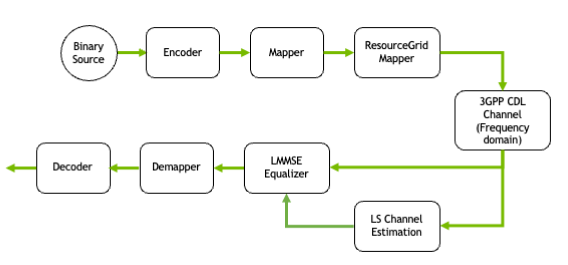

In [20]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# For the implementation of the Keras models
from tensorflow.keras import Model

###############################
# Stream Management
###############################

# Define the number of UT and BS antennas
NUM_UT = 1
NUM_BS = 1
NUM_UT_ANT = 1
NUM_BS_ANT = 4

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
NUM_STREAMS_PER_TX = NUM_UT_ANT

# Create an RX-TX association matrix.
# RX_TX_ASSOCIATION[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change.
# For example, considering a system with 2 RX and 4 TX, the RX-TX
# association matrix could be
# [ [1 , 1, 0, 0],
#   [0 , 0, 1, 1] ]
# which indicates that the RX 0 receives from TX 0 and 1, and RX 1 receives from
# TX 2 and 3.
#
# In this notebook, as we have only a single transmitter and receiver,
# the RX-TX association matrix is simply:
RX_TX_ASSOCIATION = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
STREAM_MANAGEMENT = sn.mimo.StreamManagement(RX_TX_ASSOCIATION, NUM_STREAMS_PER_TX)

###############################
# OFDM Resource Grid
###############################
RESOURCE_GRID = sn.ofdm.ResourceGrid( num_ofdm_symbols=14,
                                      fft_size=76,
                                      subcarrier_spacing=30e3,
                                      num_tx=NUM_UT,
                                      num_streams_per_tx=NUM_STREAMS_PER_TX,
                                      cyclic_prefix_length=6,
                                      pilot_pattern="kronecker",
                                      pilot_ofdm_symbol_indices=[2,11])
# RESOURCE_GRID.show();

# RESOURCE_GRID.pilot_pattern.show();

###############################
# Antenna Arrays
###############################
CARRIER_FREQUENCY = 2.6e9 # Carrier frequency in Hz.
                          # This is needed here to define the antenna element spacing.

UT_ARRAY = sn.channel.tr38901.Antenna(  polarization="single", # Either “single” or “dual”
                                        polarization_type="V", # For single polarization, must be “V” or “H”. For dual polarization, must be “VH” or “cross”.
                                        antenna_pattern="38.901", # Antenna radiation pattern, either “omni” or “38.901”
                                        carrier_frequency=CARRIER_FREQUENCY) # Carrier frequency [Hz]
# UT_ARRAY.show();
# UT_ARRAY.show_element_radiation_pattern();

BS_ARRAY = sn.channel.tr38901.AntennaArray( num_rows=1, # Number of rows of elements
                                            num_cols=int(NUM_BS_ANT/2), # Number of columns of elements
                                            polarization="dual", # Either “single” or “dual”
                                            polarization_type="cross", # For single polarization, must be “V” or “H”. For dual polarization, must be “VH” or “cross”.
                                            antenna_pattern="omni", # Antenna radiation pattern, either “omni” or “38.901”
                                            carrier_frequency=CARRIER_FREQUENCY) # Carrier frequency [Hz]
# BS_ARRAY.show();
# BS_ARRAY.show_element_radiation_pattern();

###############################
# Channel Model: 3GPP CDL
###############################
# 1. 3GPP TR 38.901: CDL, TDL, UMi, UMa, and RMa
# TDL: only supports SISO; corresponds to fixed power delay profiles and fixed angles
# CDL: only supports single-user, possibly with multiple antenna; corresponds to fixed power delay profiles and fixed angles
# UMi, UMa, and RMa: support single- and multi-user
# 2. Rayleigh block fading

DELAY_SPREAD = 100e-9 # Nominal delay spread in [s]. Please see the CDL documentation
                      # about how to choose this value.

DIRECTION = "uplink"  # The `direction` determines if the UT or BS is transmitting.
                      # In the `uplink`, the UT is transmitting.

CDL_MODEL = "C"       # Suitable values are ["A", "B", "C", "D", "E"]

SPEED = 10.0          # UT speed [m/s]. BSs are always assumed to be fixed.
                     # The direction of travel will chosen randomly within the x-y plane.

# Configure a channel impulse reponse (CIR) generator for the CDL model.
CDL = sn.channel.tr38901.CDL(CDL_MODEL, # One of “A”, “B”, “C”, “D” or “E”.
                             DELAY_SPREAD, # RMS delay spread [s]
                             CARRIER_FREQUENCY, # Carrier frequency [Hz]
                             UT_ARRAY, # Panel array used by the UTs.
                             BS_ARRAY, # Panel array used by the Bs.
                             DIRECTION, # Link direction. Either “uplink” or “downlink”.
                             min_speed=SPEED) # Minimum speed [m/s]. Defaults to 0.

BATCH_SIZE = 128 # How many examples are processed by Sionna in parallel

a, tau = CDL(batch_size=BATCH_SIZE,
             num_time_steps=RESOURCE_GRID.num_ofdm_symbols,
             sampling_frequency=1/RESOURCE_GRID.ofdm_symbol_duration)
            # a([batch size, num_rx = 1, num_rx_ant, num_tx = 1, num_tx_ant, num_paths, num_time_steps], tf.complex)
            # tau ([batch size, num_rx = 1, num_tx = 1, num_paths], tf.float) – Path delays [s]

# print("Shape of the path gains: ", a.shape)
# print("Shape of the delays:", tau.shape)

# plt.figure()
# plt.title("Channel impulse response realization")
# plt.stem(tau[0,0,0,:]/1e-9, np.abs(a)[0,0,0,0,0,:,0])
# plt.xlabel(r"$\tau$ [ns]")
# plt.ylabel(r"$|a|$")


# plt.figure()
# plt.title("Time evolution of path gain")
# plt.plot(np.arange(RESOURCE_GRID.num_ofdm_symbols)*RESOURCE_GRID.ofdm_symbol_duration/1e-6, np.real(a)[0,0,0,0,0,0,:])
# plt.plot(np.arange(RESOURCE_GRID.num_ofdm_symbols)*RESOURCE_GRID.ofdm_symbol_duration/1e-6, np.imag(a)[0,0,0,0,0,0,:])
# plt.legend(["Real part", "Imaginary part"])

# plt.xlabel(r"$t$ [us]")
# plt.ylabel(r"$a$");

###############################
# Uplink Transmission in the Frequency Domain
###############################

NUM_BITS_PER_SYMBOL = 2 # QPSK
CODERATE = 0.5

# # Number of coded bits in a resource grid
# n = int(RESOURCE_GRID.num_data_symbols*NUM_BITS_PER_SYMBOL)
# # Number of information bits in a resource groud
# k = int(n*CODERATE)

# # The binary source will create batches of information bits
# binary_source = sn.utils.BinarySource()

# # The encoder maps information bits to coded bits
# encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)

# # The mapper maps blocks of information bits to constellation symbols
# mapper = sn.mapping.Mapper("qam", NUM_BITS_PER_SYMBOL)

# # The resource grid mapper maps symbols onto an OFDM resource grid
# rg_mapper = sn.ofdm.ResourceGridMapper(RESOURCE_GRID)

# # Frequency domain channel
# channel = sn.channel.OFDMChannel(CDL, RESOURCE_GRID, add_awgn=True, normalize_channel=True, return_channel=True)

# # The LS channel estimator will provide channel estimates and error variances
# ls_est = sn.ofdm.LSChannelEstimator(RESOURCE_GRID, interpolation_type="nn")

# # The LMMSE equalizer will provide soft symbols together with noise variance estimates
# lmmse_equ = sn.ofdm.LMMSEEqualizer(RESOURCE_GRID, STREAM_MANAGEMENT)

# # The demapper produces LLR for all coded bits
# demapper = sn.mapping.Demapper("app", "qam", NUM_BITS_PER_SYMBOL)

# # The decoder provides hard-decisions on the information bits
# decoder = sn.fec.ldpc.LDPC5GDecoder(encoder, hard_out=True)

# no = sn.utils.ebnodb2no(ebno_db=10.0,
#                         num_bits_per_symbol=NUM_BITS_PER_SYMBOL,
#                         coderate=CODERATE,
#                         resource_grid=RESOURCE_GRID)

# # Transmitter
# bits = binary_source([BATCH_SIZE, NUM_UT, RESOURCE_GRID.num_streams_per_tx, k])
# print("Shape of bits: ", bits.shape)
# codewords = encoder(bits)
# print("Shape of codewords: ", codewords.shape)
# x = mapper(codewords)
# print("Shape of x: ", x.shape)
# x_rg = rg_mapper(x)
# print("Shape of x_rg: ", x_rg.shape)

# # Channel
# y, h_freq = channel([x_rg, no])
# print("Shape of y_rg: ", y.shape)
# print("Shape of h_freq: ", h_freq.shape)

# # Receiver
# h_hat, err_var = ls_est ([y, no])
# print("Shape of h_hat: ", h_hat.shape)
# print("Shape of err_var: ", err_var.shape)
# x_hat, no_eff = lmmse_equ([y, h_hat, err_var, no])
# print("Shape of x_hat: ", x_hat.shape)
# print("Shape of no_eff: ", no_eff.shape)
# llr = demapper([x_hat, no_eff])
# print("Shape of llr: ", llr.shape)
# bits_hat = decoder(llr)
# print("Shape of bits_hat: ", bits_hat.shape)

class OFDMSystem(Model): # Inherits from Keras Model

    def __init__(self, perfect_csi):
        super().__init__() # Must call the Keras model initializer

        self.perfect_csi = perfect_csi

        n = int(RESOURCE_GRID.num_data_symbols*NUM_BITS_PER_SYMBOL) # Number of coded bits
        k = int(n*CODERATE) # Number of information bits
        self.k = k

        # The binary source will create batches of information bits
        self.binary_source = sn.utils.BinarySource()

        # The encoder maps information bits to coded bits
        self.encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)

        # The mapper maps blocks of information bits to constellation symbols
        self.mapper = sn.mapping.Mapper("qam", NUM_BITS_PER_SYMBOL)

        # The resource grid mapper maps symbols onto an OFDM resource grid
        self.rg_mapper = sn.ofdm.ResourceGridMapper(RESOURCE_GRID)

        # Frequency domain channel
        self.channel = sn.channel.OFDMChannel(CDL, RESOURCE_GRID, add_awgn=True, normalize_channel=True, return_channel=True)

        # The LS channel estimator will provide channel estimates and error variances
        self.ls_est = sn.ofdm.LSChannelEstimator(RESOURCE_GRID, interpolation_type="nn")

        # The LMMSE equalizer will provide soft symbols together with noise variance estimates
        self.lmmse_equ = sn.ofdm.LMMSEEqualizer(RESOURCE_GRID, STREAM_MANAGEMENT)

        # The demapper produces LLR for all coded bits
        self.demapper = sn.mapping.Demapper("app", "qam", NUM_BITS_PER_SYMBOL)

        # The decoder provides hard-decisions on the information bits
        self.decoder = sn.fec.ldpc.LDPC5GDecoder(self.encoder, hard_out=True)

    @tf.function # Graph execution to speed things up
    def __call__(self, batch_size, ebno_db):
        no = sn.utils.ebnodb2no(ebno_db, num_bits_per_symbol=NUM_BITS_PER_SYMBOL, coderate=CODERATE, resource_grid=RESOURCE_GRID)

        # Transmitter
        bits = self.binary_source([batch_size, NUM_UT, RESOURCE_GRID.num_streams_per_tx, self.k])
        codewords = self.encoder(bits)
        x = self.mapper(codewords)
        x_rg = self.rg_mapper(x)

        # Channel
        y, h_freq = self.channel([x_rg, no])

        # Receiver
        if self.perfect_csi:
            h_hat, err_var = h_freq, 0.
        else:
            h_hat, err_var = self.ls_est ([y, no])
        x_hat, no_eff = self.lmmse_equ([y, h_hat, err_var, no])
        llr = self.demapper([x_hat, no_eff])
        bits_hat = self.decoder(llr)

        return bits, bits_hat
    
EBN0_DB_MIN = -8.0 # Minimum value of Eb/N0 [dB] for simulations
EBN0_DB_MAX = 3.0 # Maximum value of Eb/N0 [dB] for simulations

ber_plots = sn.utils.PlotBER("OFDM over 3GPP CDL")

model_ls = OFDMSystem(False)
ber_plots.simulate(model_ls,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="LS Estimation",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);

model_pcsi = OFDMSystem(True)
ber_plots.simulate(model_pcsi,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Perfect CSI",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);

ber_plots();

2023-05-12 17:49:21.418172: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'batch_size' with dtype int32
	 [[{{node batch_size}}]]


Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
EbNo [dB] |        BER |       BLER |  bit errors |    num bits | block errors |  num blocks | runtime [s] |    status
---------------------------------------------------------------------------------------------------------------------------------------
     -8.0 | 4.2869e-01 | 1.0000e+00 |       50043 |      116736 |          128 |         128 |        20.8 |reached target block errors
   -7.421 | 4.1895e-01 | 1.0000e+00 |       48907 |      116736 |          128 |         128 |         1.9 |reached target block errors
   -6.842 | 4.1222e-01 | 1.0000e+00 |       48121 |      116736 |          128 |         128 |         1.4 |reached target block errors


KeyboardInterrupt: 

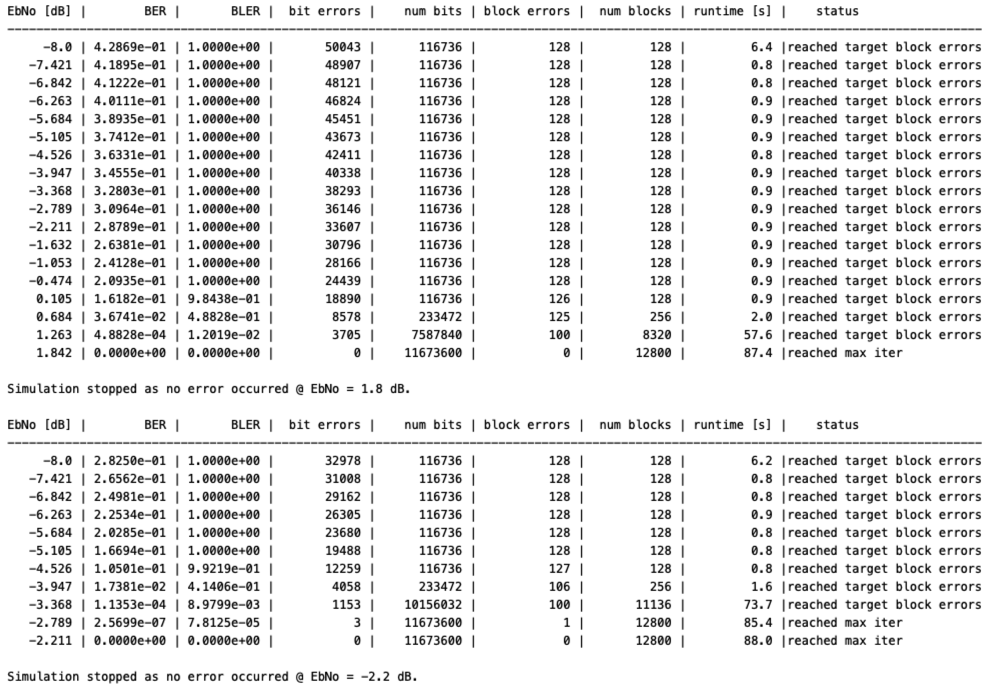

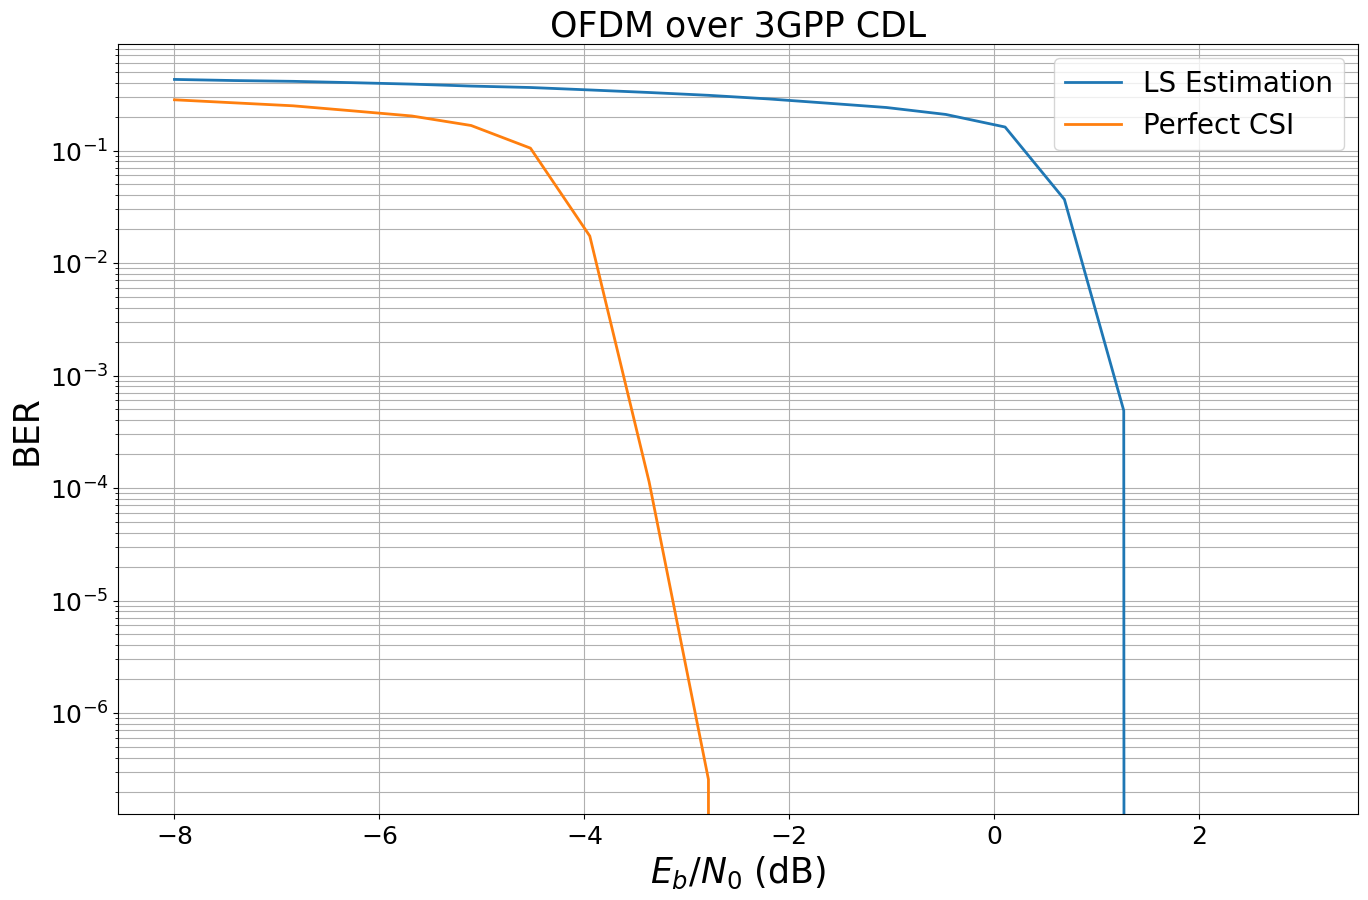

## 4 Toward Learned Receivers

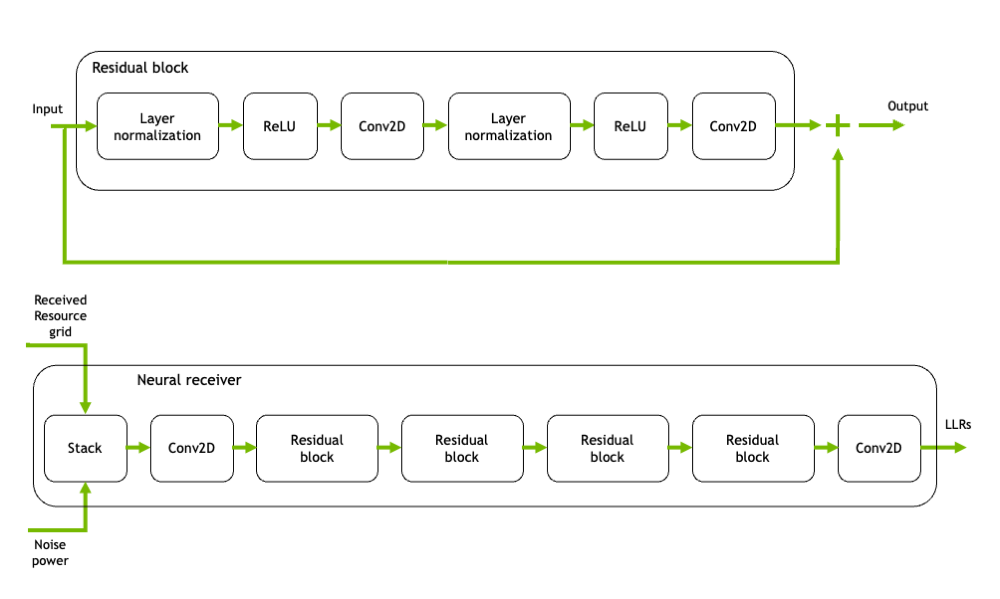

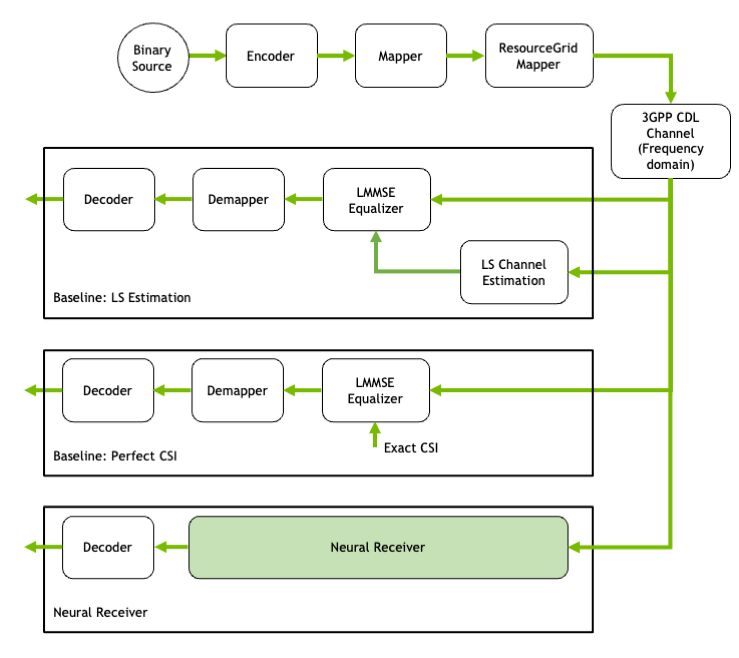

In [ ]:
# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np

# Import Sionna
try:
    import sionna as sn
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna as sn

# For saving complex Python data structures efficiently
import pickle

# For plotting
%matplotlib inline
import matplotlib.pyplot as plt

# For the implementation of the neural receiver
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer, Conv2D, LayerNormalization
from tensorflow.nn import relu

###############################
# Simulation Parameters
###############################
# Bit per channel use
NUM_BITS_PER_SYMBOL = 2 # QPSK

# Minimum value of Eb/N0 [dB] for simulations
EBN0_DB_MIN = -3.0

# Maximum value of Eb/N0 [dB] for simulations
EBN0_DB_MAX = 5.0

# How many examples are processed by Sionna in parallel
BATCH_SIZE = 128

# Coding rate
CODERATE = 0.5

# Define the number of UT and BS antennas
NUM_UT = 1
NUM_BS = 1
NUM_UT_ANT = 1
NUM_BS_ANT = 2

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
NUM_STREAMS_PER_TX = NUM_UT_ANT

# Create an RX-TX association matrix.
# RX_TX_ASSOCIATION[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change.
# For example, considering a system with 2 RX and 4 TX, the RX-TX
# association matrix could be
# [ [1 , 1, 0, 0],
#   [0 , 0, 1, 1] ]
# which indicates that the RX 0 receives from TX 0 and 1, and RX 1 receives from
# TX 2 and 3.
#
# In this notebook, as we have only a single transmitter and receiver,
# the RX-TX association matrix is simply:
RX_TX_ASSOCIATION = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
STREAM_MANAGEMENT = sn.mimo.StreamManagement(RX_TX_ASSOCIATION, NUM_STREAMS_PER_TX)

RESOURCE_GRID = sn.ofdm.ResourceGrid( num_ofdm_symbols=14,
                                      fft_size=76,
                                      subcarrier_spacing=30e3,
                                      num_tx=NUM_UT,
                                      num_streams_per_tx=NUM_STREAMS_PER_TX,
                                      cyclic_prefix_length=6,
                                      pilot_pattern="kronecker",
                                      pilot_ofdm_symbol_indices=[2,11])

# Carrier frequency in Hz.
CARRIER_FREQUENCY = 2.6e9

# Antenna setting
UT_ARRAY = sn.channel.tr38901.Antenna(  polarization="single",
                                        polarization_type="V",
                                        antenna_pattern="38.901",
                                        carrier_frequency=CARRIER_FREQUENCY)
BS_ARRAY = sn.channel.tr38901.AntennaArray( num_rows=1,
                                            num_cols=int(NUM_BS_ANT/2),
                                            polarization="dual",
                                            polarization_type="cross",
                                            antenna_pattern="38.901", # Try 'omni'
                                            carrier_frequency=CARRIER_FREQUENCY)

# Nominal delay spread in [s]. Please see the CDL documentation
# about how to choose this value.
DELAY_SPREAD = 100e-9

# The `direction` determines if the UT or BS is transmitting.
# In the `uplink`, the UT is transmitting.
DIRECTION = "uplink"

# Suitable values are ["A", "B", "C", "D", "E"]
CDL_MODEL = "C"

# UT speed [m/s]. BSs are always assumed to be fixed.
# The direction of travel will chosen randomly within the x-y plane.
SPEED = 10.0

# Configure a channel impulse reponse (CIR) generator for the CDL model.
CDL = sn.channel.tr38901.CDL(CDL_MODEL,
                             DELAY_SPREAD,
                             CARRIER_FREQUENCY,
                             UT_ARRAY,
                             BS_ARRAY,
                             DIRECTION,
                             min_speed=SPEED)

###############################
# Implemention of an Advanced Neural Receiver
###############################
class ResidualBlock(Layer):

    def __init__(self):
        super().__init__()

        # Layer normalization is done over the last three dimensions: time, frequency, conv 'channels'
        self._layer_norm_1 = LayerNormalization(axis=(-1, -2, -3))
        self._conv_1 = Conv2D(filters=128,
                              kernel_size=[3,3],
                              padding='same',
                              activation=None)
        # Layer normalization is done over the last three dimensions: time, frequency, conv 'channels'
        self._layer_norm_2 = LayerNormalization(axis=(-1, -2, -3))
        self._conv_2 = Conv2D(filters=128,
                              kernel_size=[3,3],
                              padding='same',
                              activation=None)

    def call(self, inputs):
        z = self._layer_norm_1(inputs)
        z = relu(z)
        z = self._conv_1(z)
        z = self._layer_norm_2(z)
        z = relu(z)
        z = self._conv_2(z) # [batch size, num time samples, num subcarriers, num_channels]
        # Skip connection
        z = z + inputs

        return z

class NeuralReceiver(Layer):

    def __init__(self):
        super().__init__()

        # Input convolution
        self._input_conv = Conv2D(filters=128,
                                  kernel_size=[3,3],
                                  padding='same',
                                  activation=None)
        # Residual blocks
        self._res_block_1 = ResidualBlock()
        self._res_block_2 = ResidualBlock()
        self._res_block_3 = ResidualBlock()
        self._res_block_4 = ResidualBlock()
        # Output conv
        self._output_conv = Conv2D(filters=NUM_BITS_PER_SYMBOL,
                                   kernel_size=[3,3],
                                   padding='same',
                                   activation=None)

    def call(self, inputs):
        y, no = inputs

        # Assuming a single receiver, remove the num_rx dimension
        y = tf.squeeze(y, axis=1)

        # Feeding the noise power in log10 scale helps with the performance
        no = sn.utils.log10(no)

        # Stacking the real and imaginary components of the different antennas along the 'channel' dimension
        y = tf.transpose(y, [0, 2, 3, 1]) # Putting antenna dimension last
        no = sn.utils.insert_dims(no, 3, 1)
        no = tf.tile(no, [1, y.shape[1], y.shape[2], 1])
        # z : [batch size, num ofdm symbols, num subcarriers, 2*num rx antenna + 1]
        z = tf.concat([tf.math.real(y),
                       tf.math.imag(y),
                       no], axis=-1)
        # Input conv
        z = self._input_conv(z)
        # Residual blocks
        z = self._res_block_1(z)
        z = self._res_block_2(z)
        z = self._res_block_3(z)
        z = self._res_block_4(z)
        # Output conv
        z = self._output_conv(z)

        # Reshape the input to fit what the resource grid demapper is expected
        z = sn.utils.insert_dims(z, 2, 1)

        return z

class OFDMSystemNeuralReceiver(Model): # Inherits from Keras Model

    def __init__(self, training):
        super().__init__() # Must call the Keras model initializer

        self.training = training

        n = int(RESOURCE_GRID.num_data_symbols*NUM_BITS_PER_SYMBOL) # Number of coded bits
        k = int(n*CODERATE) # Number of information bits
        self.k = k
        self.n = n

        # The binary source will create batches of information bits
        self.binary_source = sn.utils.BinarySource()

        # The encoder maps information bits to coded bits
        self.encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)

        # The mapper maps blocks of information bits to constellation symbols
        self.mapper = sn.mapping.Mapper("qam", NUM_BITS_PER_SYMBOL)

        # The resource grid mapper maps symbols onto an OFDM resource grid
        self.rg_mapper = sn.ofdm.ResourceGridMapper(RESOURCE_GRID)

        # Frequency domain channel
        self.channel = sn.channel.OFDMChannel(CDL, RESOURCE_GRID, add_awgn=True, normalize_channel=True, return_channel=False)

        # Neural receiver
        self.neural_receiver = NeuralReceiver()

        # Used to extract data-carrying resource elements
        self.rg_demapper = sn.ofdm.ResourceGridDemapper(RESOURCE_GRID, STREAM_MANAGEMENT)

        # The decoder provides hard-decisions on the information bits
        self.decoder = sn.fec.ldpc.LDPC5GDecoder(self.encoder, hard_out=True)

        # Loss function
        self.bce = tf.keras.losses.BinaryCrossentropy(from_logits=True) # Loss function

    @tf.function # Graph execution to speed things up
    def __call__(self, batch_size, ebno_db):
        no = sn.utils.ebnodb2no(ebno_db, num_bits_per_symbol=NUM_BITS_PER_SYMBOL, coderate=CODERATE, resource_grid=RESOURCE_GRID)

        # The neural receiver is expected no to have shape [batch_size].
        if len(no.shape) == 0:
            no = tf.fill([batch_size], no)

        # Transmitter
        # Outer coding is only performed if not training
        if self.training:
            codewords = self.binary_source([batch_size, NUM_UT, NUM_UT_ANT, self.n])
        else:
            bits = self.binary_source([batch_size, NUM_UT, NUM_UT_ANT, self.k])
            codewords = self.encoder(bits)
        x = self.mapper(codewords)
        x_rg = self.rg_mapper(x)

        # Channel
        y = self.channel([x_rg, no])

        # Receiver
        llr = self.neural_receiver([y, no])
        llr = self.rg_demapper(llr) # Extract data-carrying resource elements. The other LLrs are discarded
        llr = tf.reshape(llr, [batch_size, NUM_UT, NUM_UT_ANT, self.n]) # Reshape the LLRs to fit what the outer decoder is expected
        if self.training:
            loss = self.bce(codewords, llr)
            return loss
        else:
            bits_hat = self.decoder(llr)
            return bits, bits_hat

###############################
# Training the Neural Receiver
###############################
# Set a seed for reproducibility
tf.random.set_seed(1)

# Number of iterations used for training
NUM_TRAINING_ITERATIONS = 1000 #100000

# Instantiating the end-to-end model for training
model = OFDMSystemNeuralReceiver(training=True)

# Adam optimizer (SGD variant)
optimizer = tf.keras.optimizers.Adam()

# Training loop
for i in range(NUM_TRAINING_ITERATIONS):
    # Sample a batch of SNRs.
    ebno_db = tf.random.uniform(shape=[BATCH_SIZE], minval=EBN0_DB_MIN, maxval=EBN0_DB_MAX)
    # Forward pass
    with tf.GradientTape() as tape:
        loss = model(BATCH_SIZE, ebno_db)
    # Computing and applying gradients
    weights = model.trainable_weights
    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))
    # Print progress
    if i % 100 == 0:
        print(f"{i}/{NUM_TRAINING_ITERATIONS}  Loss: {loss:.2E}", end="\r")
# Save the weightsin a file
weights = model.get_weights()
with open('weights-ofdm-neuralrx', 'wb') as f:
    pickle.dump(weights, f)

###############################
# Benchmarking the Neural Receiver
###############################
class OFDMSystem(Model): # Inherits from Keras Model

    def __init__(self, perfect_csi):
        super().__init__() # Must call the Keras model initializer

        self.perfect_csi = perfect_csi

        n = int(RESOURCE_GRID.num_data_symbols*NUM_BITS_PER_SYMBOL) # Number of coded bits
        k = int(n*CODERATE) # Number of information bits
        self.k = k

        # The binary source will create batches of information bits
        self.binary_source = sn.utils.BinarySource()

        # The encoder maps information bits to coded bits
        self.encoder = sn.fec.ldpc.LDPC5GEncoder(k, n)

        # The mapper maps blocks of information bits to constellation symbols
        self.mapper = sn.mapping.Mapper("qam", NUM_BITS_PER_SYMBOL)

        # The resource grid mapper maps symbols onto an OFDM resource grid
        self.rg_mapper = sn.ofdm.ResourceGridMapper(RESOURCE_GRID)

        # Frequency domain channel
        self.channel = sn.channel.OFDMChannel(CDL, RESOURCE_GRID, add_awgn=True, normalize_channel=True, return_channel=True)

        # The LS channel estimator will provide channel estimates and error variances
        self.ls_est = sn.ofdm.LSChannelEstimator(RESOURCE_GRID, interpolation_type="nn")

        # The LMMSE equalizer will provide soft symbols together with noise variance estimates
        self.lmmse_equ = sn.ofdm.LMMSEEqualizer(RESOURCE_GRID, STREAM_MANAGEMENT)

        # The demapper produces LLR for all coded bits
        self.demapper = sn.mapping.Demapper("app", "qam", NUM_BITS_PER_SYMBOL)

        # The decoder provides hard-decisions on the information bits
        self.decoder = sn.fec.ldpc.LDPC5GDecoder(self.encoder, hard_out=True)

    @tf.function # Graph execution to speed things up
    def __call__(self, batch_size, ebno_db):
        no = sn.utils.ebnodb2no(ebno_db, num_bits_per_symbol=NUM_BITS_PER_SYMBOL, coderate=CODERATE, resource_grid=RESOURCE_GRID)

        # Transmitter
        bits = self.binary_source([batch_size, NUM_UT, RESOURCE_GRID.num_streams_per_tx, self.k])
        codewords = self.encoder(bits)
        x = self.mapper(codewords)
        x_rg = self.rg_mapper(x)

        # Channel
        y, h_freq = self.channel([x_rg, no])

        # Receiver
        if self.perfect_csi:
            h_hat, err_var = h_freq, 0.
        else:
            h_hat, err_var = self.ls_est ([y, no])
        x_hat, no_eff = self.lmmse_equ([y, h_hat, err_var, no])
        llr = self.demapper([x_hat, no_eff])
        bits_hat = self.decoder(llr)

        return bits, bits_hat

ber_plots = sn.utils.PlotBER("Advanced neural receiver")

baseline_ls = OFDMSystem(False)
ber_plots.simulate(baseline_ls,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Baseline: LS Estimation",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);

baseline_pcsi = OFDMSystem(True)
ber_plots.simulate(baseline_pcsi,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100, # simulate until 100 block errors occured
                  legend="Baseline: Perfect CSI",
                  soft_estimates=True,
                  max_mc_iter=100, # run 100 Monte-Carlo simulations (each with batch_size samples)
                  show_fig=False);

# Instantiating the end-to-end model for evaluation
model_neuralrx = OFDMSystemNeuralReceiver(training=False)

# Run one inference to build the layers and loading the weights
model_neuralrx(tf.constant(1, tf.int32), tf.constant(10.0, tf.float32))
with open('weights-ofdm-neuralrx', 'rb') as f:
    weights = pickle.load(f)
    model_neuralrx.set_weights(weights)

# Computing and plotting BER
ber_plots.simulate(model_neuralrx,
                  ebno_dbs=np.linspace(EBN0_DB_MIN, EBN0_DB_MAX, 20),
                  batch_size=BATCH_SIZE,
                  num_target_block_errors=100,
                  legend="Neural Receiver",
                  soft_estimates=True,
                  max_mc_iter=100,
                  show_fig=True);


# 2 Experts

## 2.2 Bit_Interleaved_Coded_Modulation

In [ ]:
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        #tf.config.set_visible_devices([], 'GPU')
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna
    
# Load the required Sionna components
from sionna.mapping import Constellation, Mapper, Demapper
from sionna.fec.ldpc import LDPC5GEncoder, LDPC5GDecoder, LDPCBPDecoder
from sionna.fec.interleaving import RandomInterleaver, Deinterleaver
from sionna.fec.scrambling import Scrambler, Descrambler
from sionna.fec.utils import GaussianPriorSource, load_parity_check_examples, get_exit_analytic, plot_exit_chart, plot_trajectory
from sionna.utils import BinarySource, ebnodb2no, hard_decisions
from sionna.utils.plotting import PlotBER
from sionna.channel import AWGN

# show QPSK constellation
constellation = Constellation("qam", num_bits_per_symbol=2)
constellation.show();

# generate 16QAM with Gray labeling
constellation = Constellation("qam", num_bits_per_symbol=4)
constellation.show();

## 2.3 MIMO OFDM Transmissions over the CDL Channel Model

<img style="float: left;" src="/Users/im/Documents/GitHub/sionna/Figures/Expert Part 3 MIMO OFDM Transmissions over the CDL Channel Model.png" width="100%"> 

**This Model includes:**

-5G LDPC FEC

-QAM modulation

-OFDM resource grid with configurabel pilot pattern

-Multiple data streams

-3GPP 38.901 CDL channel models and antenna patterns

-ZF Precoding with perfect channel state information

-LS Channel estimation with nearest-neighbor interpolation as well as perfect CSl

-LMMSE MIMO equalization


**This Model investigates:**

-The performance over different CDL models

-The impact of imperfect CSI

-Channel aging due to mobility

-Inter-symbol interference due to insufficient cyclic prefix length


**Table of Contents**

    1 GPU Configuration and Imports

    2 System Setup

        2.1 Stream Management

        2.2 OFDM Resource Grid & Pilot Pattern

        2.3 Antenna Arrays

        2.4 CDL Channel Model

            2.4.1 CIR Sampling Process

            2.4.2 Generate the Channel Frequency Response

            2.4.3 Generate the Discrete-Time Channel Impulse Response

        2.5 Other Physical Layer Components

    3 Simulations

        3.1 Uplink Transmission in the Frequency Domain

        3.2 Uplink Transmission in the Time Domain

        3.3 Downlink Transmission in the Frequency Domain

        3.4 Understand the Difference Between the CDL Models

        3.5 Create an End-to-End Keras Model

        3.6 Compare Uplink Performance Over Different CDL Models

        3.7 Compare Downlink Performance Over Different CDL Models

        3.8 Evaluate the Impact of Mobility
        
        3.9 Evaluate the Impact of Insufficient Cyclic Prefix Length


## 3.1 Uplink Transmission in the Frequency Domain

In [ ]:
###############################
# 1 GPU Configuration and Imports
###############################
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

from sionna.mimo import StreamManagement

from sionna.ofdm import ResourceGrid, ResourceGridMapper, LSChannelEstimator, LMMSEEqualizer
from sionna.ofdm import OFDMModulator, OFDMDemodulator, ZFPrecoder, RemoveNulledSubcarriers

from sionna.channel.tr38901 import AntennaArray, CDL, Antenna
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel
from sionna.channel import ApplyOFDMChannel, ApplyTimeChannel, OFDMChannel, TimeChannel

from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

from sionna.mapping import Mapper, Demapper

from sionna.utils import BinarySource, ebnodb2no, sim_ber
from sionna.utils.metrics import compute_ber

###############################
# 2 System Setup
###############################

## 2.1 Stream Management

# Define the number of UT and BS antennas.
# For the CDL model, that will be used in this notebook, only
# a single UT and BS are supported.
num_ut = 1
num_bs = 1
num_ut_ant = 4
num_bs_ant = 8

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
num_streams_per_tx = num_ut_ant

# Create an RX-TX association matrix
# rx_tx_association[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change. However, as we have only a single
# transmitter and receiver, this does not matter:
rx_tx_association = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
sm = StreamManagement(rx_tx_association, num_streams_per_tx)

## 2.2 OFDM Resource Grid & Pilot Pattern

rg = ResourceGrid(num_ofdm_symbols=14, # Number of OFDM symbols: 14
                  fft_size=76, # Number of subcarriers: 76 
                  subcarrier_spacing=15e3,
                  num_tx=1,
                  num_streams_per_tx=num_streams_per_tx,
                  cyclic_prefix_length=6,
                  num_guard_carriers=[5,6],
                  dc_null=True,
                  pilot_pattern="kronecker",
                  pilot_ofdm_symbol_indices=[2,11])
# rg.show(); # spans 76 subcarriers over 14 OFDM symbols
# rg.pilot_pattern.show(); # 76 - 1 (DC) - 5 (left guards) - 6 (right guards) = 64 effective subcarriers

# plt.figure()
# plt.title("Real Part of the Pilot Sequences")
# for i in range(num_streams_per_tx):
#     plt.stem(np.real(rg.pilot_pattern.pilots[0, i]),
#              markerfmt="C{}.".format(i), linefmt="C{}-".format(i),
#              label="Stream {}".format(i))
# plt.legend()
# print("Average energy per pilot symbol: {:1.2f}".format(np.mean(np.abs(rg.pilot_pattern.pilots[0,0])**2)))

## 2.3 Antenna Arrays
# This can be ignored for simple channel models, such as AWGN, flat-fading, RayleighBlockFading, or TDL 
# which do not account for antenna array geometries and antenna radiation patterns. 
# However, other models, such as CDL, UMi, UMa, and RMa from the 3GPP 38.901 specification, require it.

carrier_frequency = 2.6e9 # Carrier frequency in Hz.
                          # This is needed here to define the antenna element spacing.

# By default, the antenna elements are spaced half of a wavelength apart in both vertical and horizontal directions.

ut_array = AntennaArray(num_rows=1,
                        num_cols=int(num_ut_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# ut_array.show()

bs_array = AntennaArray(num_rows=1,
                        num_cols=int(num_bs_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# bs_array.show()

# ut_array.show_element_radiation_pattern()

## 2.4 CDL Channel Model

delay_spread = 300e-9 # Nominal delay spread in [s]. Please see the CDL documentation
                      # about how to choose this value.

direction = "uplink"  # The `direction` determines if the UT or BS is transmitting.
                      # In the `uplink`, the UT is transmitting.
cdl_model = "B"       # Suitable values are ["A", "B", "C", "D", "E"]

speed = 10            # UT speed [m/s]. BSs are always assumed to be fixed.
                      # The direction of travel will chosen randomly within the x-y plane.

# Configure a channel impulse reponse (CIR) generator for the CDL model.
# cdl() will generate CIRs that can be converted to discrete time or discrete frequency.
cdl = CDL(cdl_model, delay_spread, carrier_frequency, ut_array, bs_array, direction, min_speed=speed)

### 2.4.1 CIR Sampling Process
# rg.num_ofdm_symbols = 1/ofdm_symbol_duration, ofdm_symbol_duration = an OFDM symbol + the cyclic prefix
# a = [batch size, num_rx, num_rx_ant, num_tx, num_tx_ant, num_paths, num_time_steps]
# tau = [batch_size, num_rx, num_tx, num_paths]
a, tau = cdl(batch_size=32, num_time_steps=rg.num_ofdm_symbols, sampling_frequency=1/rg.ofdm_symbol_duration)
# print("Shape of the path gains: ", a.shape)
# print("Shape of the delays:", tau.shape)

# plt.figure()
# plt.title("Channel impulse response realization")
# plt.stem(tau[0,0,0,:]/1e-9, np.abs(a)[0,0,0,0,0,:,0])
# plt.xlabel(r"$\tau$ [ns]")
# plt.ylabel(r"$|a|$")


# plt.figure()
# plt.title("Time evolution of path gain")
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.real(a)[0,0,0,0,0,0,:])
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.imag(a)[0,0,0,0,0,0,:])
# plt.legend(["Real part", "Imaginary part"])

# plt.xlabel(r"$t$ [us]")
# plt.ylabel(r"$a$");

### 2.4.2 Generate the Channel Frequency Response
# subcarrier_frequencies: acquires frequencies
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
# cir_to_ofdm_channel: computes the Fourier transform of the continuous-time channel impulse response 
# at a set of frequencies, corresponding to the different subcarriers.
h_freq = cir_to_ofdm_channel(frequencies, a, tau, normalize=True)

# plt.figure()
# plt.title("Channel frequency response")
# plt.plot(np.real(h_freq[0,0,0,0,0,0,:]))
# plt.plot(np.imag(h_freq[0,0,0,0,0,0,:]))
# plt.xlabel("OFDM Symbol Index")
# plt.ylabel(r"$h$")
# plt.legend(["Real part", "Imaginary part"]);

# Function that will apply the channel frequency response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_freq = ApplyOFDMChannel(add_awgn=True)

### 2.4.3 Generate the Discrete-Time Channel Impulse Response

# The following values for truncation are recommended.
# Please feel free to tailor them to you needs.
l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
l_tot = l_max-l_min+1

a, tau = cdl(batch_size=2, num_time_steps=rg.num_time_samples+l_tot-1, sampling_frequency=rg.bandwidth)

h_time = cir_to_time_channel(rg.bandwidth, a, tau, l_min=l_min, l_max=l_max, normalize=True)

# plt.figure()
# plt.title("Discrete-time channel impulse response")
# plt.stem(np.abs(h_time[0,0,0,0,0,0]))
# plt.xlabel(r"Time step $\ell$")
# plt.ylabel(r"$|\bar{h}|$");

# Function that will apply the discrete-time channel impulse response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_time = ApplyTimeChannel(rg.num_time_samples, l_tot=l_tot, add_awgn=True)

## 2.5 Other Physical Layer Components

num_bits_per_symbol = 2 # QPSK modulation
coderate = 0.5 # Code rate
n = int(rg.num_data_symbols*num_bits_per_symbol) # Number of coded bits
k = int(n*coderate) # Number of information bits

# The binary source will create batches of information bits
binary_source = BinarySource()

# The encoder maps information bits to coded bits
encoder = LDPC5GEncoder(k, n)

# The mapper maps blocks of information bits to constellation symbols
mapper = Mapper("qam", num_bits_per_symbol)

# The resource grid mapper maps symbols onto an OFDM resource grid
rg_mapper = ResourceGridMapper(rg)

# The zero forcing precoder precodes the transmit stream towards the intended antennas
zf_precoder = ZFPrecoder(rg, sm, return_effective_channel=True)

# OFDM modulator and demodulator
modulator = OFDMModulator(rg.cyclic_prefix_length)
demodulator = OFDMDemodulator(rg.fft_size, l_min, rg.cyclic_prefix_length)

# This function removes nulled subcarriers from any tensor having the shape of a resource grid
remove_nulled_scs = RemoveNulledSubcarriers(rg)

# The LS channel estimator will provide channel estimates and error variances
ls_est = LSChannelEstimator(rg, interpolation_type="nn")

# The LMMSE equalizer will provide soft symbols together with noise variance estimates
lmmse_equ = LMMSEEqualizer(rg, sm)

# The demapper produces LLR for all coded bits
demapper = Demapper("app", "qam", num_bits_per_symbol)

# The decoder provides hard-decisions on the information bits
decoder = LDPC5GDecoder(encoder, hard_out=True)

###############################
# 3 Simulations
###############################

## 3.1 Uplink Transmission in the Frequency Domain

batch_size = 32 # Depending on the memory of your GPU (or system when a CPU is used),
                # you can in(de)crease the batch size. The larger the batch size, the
                # more memory is required. However, simulations will also run much faster.
ebno_db = 40
perfect_csi = False # Change to switch between perfect and imperfect CSI

# Compute the noise power for a given Eb/No value.
# This takes not only the coderate but also the overheads related pilot
# transmissions and nulled carriers
no = ebnodb2no(ebno_db, num_bits_per_symbol, coderate, rg)

b = binary_source([batch_size, 1, rg.num_streams_per_tx, encoder.k])
c = encoder(b)
x = mapper(c)
x_rg = rg_mapper(x)

# As explained above, we generate random batches of CIR, transform them
# in the frequency domain and apply them to the resource grid in the
# frequency domain.
# cir = cdl(batch_size, rg.num_ofdm_symbols, 1/rg.ofdm_symbol_duration)
# h_freq = cir_to_ofdm_channel(frequencies, *cir, normalize=True)
# y = channel_freq([x_rg, h_freq, no])

# An alternative approach to simulations in the frequency domain using the convenience function OFDMChannel
ofdm_channel = OFDMChannel(cdl, rg, add_awgn=True, normalize_channel=True, return_channel=True)
y, h_freq = ofdm_channel([x_rg, no])

if perfect_csi:
    # For perfect CSI, the receiver gets the channel frequency response as input
    # However, the channel estimator only computes estimates on the non-nulled
    # subcarriers. Therefore, we need to remove them here from `h_freq`.
    # This step can be skipped if no subcarriers are nulled.
    h_hat, err_var = remove_nulled_scs(h_freq), 0.
else:
    h_hat, err_var = ls_est ([y, no])

x_hat, no_eff = lmmse_equ([y, h_hat, err_var, no])
llr = demapper([x_hat, no_eff])
b_hat = decoder(llr)
ber = compute_ber(b, b_hat)
print("BER: {}".format(ber))

## 3.2 Uplink Transmission in the Time Domain

In [ ]:
###############################
# 1 GPU Configuration and Imports
###############################
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

from sionna.mimo import StreamManagement

from sionna.ofdm import ResourceGrid, ResourceGridMapper, LSChannelEstimator, LMMSEEqualizer
from sionna.ofdm import OFDMModulator, OFDMDemodulator, ZFPrecoder, RemoveNulledSubcarriers

from sionna.channel.tr38901 import AntennaArray, CDL, Antenna
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel
from sionna.channel import ApplyOFDMChannel, ApplyTimeChannel, OFDMChannel, TimeChannel

from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

from sionna.mapping import Mapper, Demapper

from sionna.utils import BinarySource, ebnodb2no, sim_ber
from sionna.utils.metrics import compute_ber

###############################
# 2 System Setup
###############################

## 2.1 Stream Management

# Define the number of UT and BS antennas.
# For the CDL model, that will be used in this notebook, only
# a single UT and BS are supported.
num_ut = 1
num_bs = 1
num_ut_ant = 4
num_bs_ant = 8

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
num_streams_per_tx = num_ut_ant

# Create an RX-TX association matrix
# rx_tx_association[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change. However, as we have only a single
# transmitter and receiver, this does not matter:
rx_tx_association = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
sm = StreamManagement(rx_tx_association, num_streams_per_tx)

## 2.2 OFDM Resource Grid & Pilot Pattern

rg = ResourceGrid(num_ofdm_symbols=14, # Number of OFDM symbols: 14
                  fft_size=76, # Number of subcarriers: 76 
                  subcarrier_spacing=15e3,
                  num_tx=1,
                  num_streams_per_tx=num_streams_per_tx,
                  cyclic_prefix_length=6,
                  num_guard_carriers=[5,6],
                  dc_null=True,
                  pilot_pattern="kronecker",
                  pilot_ofdm_symbol_indices=[2,11])
# rg.show(); # spans 76 subcarriers over 14 OFDM symbols
# rg.pilot_pattern.show(); # 76 - 1 (DC) - 5 (left guards) - 6 (right guards) = 64 effective subcarriers

# plt.figure()
# plt.title("Real Part of the Pilot Sequences")
# for i in range(num_streams_per_tx):
#     plt.stem(np.real(rg.pilot_pattern.pilots[0, i]),
#              markerfmt="C{}.".format(i), linefmt="C{}-".format(i),
#              label="Stream {}".format(i))
# plt.legend()
# print("Average energy per pilot symbol: {:1.2f}".format(np.mean(np.abs(rg.pilot_pattern.pilots[0,0])**2)))

## 2.3 Antenna Arrays
# This can be ignored for simple channel models, such as AWGN, flat-fading, RayleighBlockFading, or TDL 
# which do not account for antenna array geometries and antenna radiation patterns. 
# However, other models, such as CDL, UMi, UMa, and RMa from the 3GPP 38.901 specification, require it.

carrier_frequency = 2.6e9 # Carrier frequency in Hz.
                          # This is needed here to define the antenna element spacing.

# By default, the antenna elements are spaced half of a wavelength apart in both vertical and horizontal directions.

ut_array = AntennaArray(num_rows=1,
                        num_cols=int(num_ut_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# ut_array.show()

bs_array = AntennaArray(num_rows=1,
                        num_cols=int(num_bs_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# bs_array.show()

# ut_array.show_element_radiation_pattern()

## 2.4 CDL Channel Model

delay_spread = 300e-9 # Nominal delay spread in [s]. Please see the CDL documentation
                      # about how to choose this value.

direction = "uplink"  # The `direction` determines if the UT or BS is transmitting.
                      # In the `uplink`, the UT is transmitting.
cdl_model = "B"       # Suitable values are ["A", "B", "C", "D", "E"]

speed = 10            # UT speed [m/s]. BSs are always assumed to be fixed.
                      # The direction of travel will chosen randomly within the x-y plane.

# Configure a channel impulse reponse (CIR) generator for the CDL model.
# cdl() will generate CIRs that can be converted to discrete time or discrete frequency.
cdl = CDL(cdl_model, delay_spread, carrier_frequency, ut_array, bs_array, direction, min_speed=speed)

### 2.4.1 CIR Sampling Process
# rg.num_ofdm_symbols = 1/ofdm_symbol_duration, ofdm_symbol_duration = an OFDM symbol + the cyclic prefix
# a = [batch size, num_rx, num_rx_ant, num_tx, num_tx_ant, num_paths, num_time_steps]
# tau = [batch_size, num_rx, num_tx, num_paths]
a, tau = cdl(batch_size=32, num_time_steps=rg.num_ofdm_symbols, sampling_frequency=1/rg.ofdm_symbol_duration)
# print("Shape of the path gains: ", a.shape)
# print("Shape of the delays:", tau.shape)

# plt.figure()
# plt.title("Channel impulse response realization")
# plt.stem(tau[0,0,0,:]/1e-9, np.abs(a)[0,0,0,0,0,:,0])
# plt.xlabel(r"$\tau$ [ns]")
# plt.ylabel(r"$|a|$")


# plt.figure()
# plt.title("Time evolution of path gain")
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.real(a)[0,0,0,0,0,0,:])
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.imag(a)[0,0,0,0,0,0,:])
# plt.legend(["Real part", "Imaginary part"])

# plt.xlabel(r"$t$ [us]")
# plt.ylabel(r"$a$");

### 2.4.2 Generate the Channel Frequency Response
# subcarrier_frequencies: acquires frequencies
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
# cir_to_ofdm_channel: computes the Fourier transform of the continuous-time channel impulse response 
# at a set of frequencies, corresponding to the different subcarriers.
h_freq = cir_to_ofdm_channel(frequencies, a, tau, normalize=True)

# plt.figure()
# plt.title("Channel frequency response")
# plt.plot(np.real(h_freq[0,0,0,0,0,0,:]))
# plt.plot(np.imag(h_freq[0,0,0,0,0,0,:]))
# plt.xlabel("OFDM Symbol Index")
# plt.ylabel(r"$h$")
# plt.legend(["Real part", "Imaginary part"]);

# Function that will apply the channel frequency response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_freq = ApplyOFDMChannel(add_awgn=True)

### 2.4.3 Generate the Discrete-Time Channel Impulse Response

# The following values for truncation are recommended.
# Please feel free to tailor them to you needs.
l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
l_tot = l_max-l_min+1

a, tau = cdl(batch_size=2, num_time_steps=rg.num_time_samples+l_tot-1, sampling_frequency=rg.bandwidth)

h_time = cir_to_time_channel(rg.bandwidth, a, tau, l_min=l_min, l_max=l_max, normalize=True)

# plt.figure()
# plt.title("Discrete-time channel impulse response")
# plt.stem(np.abs(h_time[0,0,0,0,0,0]))
# plt.xlabel(r"Time step $\ell$")
# plt.ylabel(r"$|\bar{h}|$");

# Function that will apply the discrete-time channel impulse response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_time = ApplyTimeChannel(rg.num_time_samples, l_tot=l_tot, add_awgn=True)

## 2.5 Other Physical Layer Components

num_bits_per_symbol = 2 # QPSK modulation
coderate = 0.5 # Code rate
n = int(rg.num_data_symbols*num_bits_per_symbol) # Number of coded bits
k = int(n*coderate) # Number of information bits

# The binary source will create batches of information bits
binary_source = BinarySource()

# The encoder maps information bits to coded bits
encoder = LDPC5GEncoder(k, n)

# The mapper maps blocks of information bits to constellation symbols
mapper = Mapper("qam", num_bits_per_symbol)

# The resource grid mapper maps symbols onto an OFDM resource grid
rg_mapper = ResourceGridMapper(rg)

# The zero forcing precoder precodes the transmit stream towards the intended antennas
zf_precoder = ZFPrecoder(rg, sm, return_effective_channel=True)

# OFDM modulator and demodulator
modulator = OFDMModulator(rg.cyclic_prefix_length)
demodulator = OFDMDemodulator(rg.fft_size, l_min, rg.cyclic_prefix_length)

# This function removes nulled subcarriers from any tensor having the shape of a resource grid
remove_nulled_scs = RemoveNulledSubcarriers(rg)

# The LS channel estimator will provide channel estimates and error variances
ls_est = LSChannelEstimator(rg, interpolation_type="nn")

# The LMMSE equalizer will provide soft symbols together with noise variance estimates
lmmse_equ = LMMSEEqualizer(rg, sm)

# The demapper produces LLR for all coded bits
demapper = Demapper("app", "qam", num_bits_per_symbol)

# The decoder provides hard-decisions on the information bits
decoder = LDPC5GDecoder(encoder, hard_out=True)

###############################
# 3 Simulations
###############################

## 3.2 Uplink Transmission in the Time Domain

batch_size = 4 # We pick a small batch_size as executing this code in Eager mode could consume a lot of memory
ebno_db = 30
perfect_csi = True

no = ebnodb2no(ebno_db, num_bits_per_symbol, coderate, rg)
b = binary_source([batch_size, 1, rg.num_streams_per_tx, encoder.k])
c = encoder(b)
x = mapper(c)
x_rg = rg_mapper(x)

# The CIR needs to be sampled every 1/bandwith [s].
# In contrast to frequency-domain modeling, this implies
# that the channel can change over the duration of a single
# OFDM symbol. We now also need to simulate more
# time steps.
cir = cdl(batch_size, rg.num_time_samples+l_tot-1, rg.bandwidth)

# OFDM modulation with cyclic prefix insertion
x_time = modulator(x_rg)

# Compute the discrete-time channel impulse reponse
h_time = cir_to_time_channel(rg.bandwidth, *cir, l_min, l_max, normalize=True)

# Compute the channel output
# This computes the full convolution between the time-varying
# discrete-time channel impulse reponse and the discrete-time
# transmit signal. With this technique, the effects of an
# insufficiently long cyclic prefix will become visible. This
# is in contrast to frequency-domain modeling which imposes
# no inter-symbol interfernce.
y_time = channel_time([x_time, h_time, no])

# # An alternative approach to simulations in the time domain using the convenience function TimeChannel
# time_channel = TimeChannel(cdl, rg.bandwidth, rg.num_time_samples,
#                            l_min=l_min, l_max=l_max, normalize_channel=True,
#                            add_awgn=True, return_channel=True)

# y_time, h_time = time_channel([x_time, no])


# OFDM demodulation and cyclic prefix removal
y = demodulator(y_time)

if perfect_csi:

    a, tau = cir

    # We need to sub-sample the channel impulse reponse to compute perfect CSI
    # for the receiver as it only needs one channel realization per OFDM symbol
    a_freq = a[...,rg.cyclic_prefix_length:-1:(rg.fft_size+rg.cyclic_prefix_length)]
    a_freq = a_freq[...,:rg.num_ofdm_symbols]

    # Compute the channel frequency response
    h_freq = cir_to_ofdm_channel(frequencies, a_freq, tau, normalize=True)

    h_hat, err_var = remove_nulled_scs(h_freq), 0.
else:
    h_hat, err_var = ls_est ([y, no])

x_hat, no_eff = lmmse_equ([y, h_hat, err_var, no])
llr = demapper([x_hat, no_eff])
b_hat = decoder(llr)
ber = compute_ber(b, b_hat)
print("BER: {}".format(ber))

# Compare the perfect CSI using the ideal channel frequency response and the estimated channel response

# In the example above, we assumed perfect CSI, i.e.,
# h_hat correpsond to the exact ideal channel frequency response.
h_perf = h_hat[0,0,0,0,0,0]

# We now compute the LS channel estimate from the pilots.
h_est, _ = ls_est ([y, no])
h_est = h_est[0,0,0,0,0,0]

plt.figure()
plt.plot(np.real(h_perf))
plt.plot(np.imag(h_perf))
plt.plot(np.real(h_est), "--")
plt.plot(np.imag(h_est), "--")
plt.xlabel("Subcarrier index")
plt.ylabel("Channel frequency response")
plt.legend(["Ideal (real part)", "Ideal (imaginary part)", "Estimated (real part)", "Estimated (imaginary part)"]);
plt.title("Comparison of channel frequency responses");

## 3.3 Downlink Transmission in the Frequency Domain

In [ ]:
###############################
# 1 GPU Configuration and Imports
###############################
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

from sionna.mimo import StreamManagement

from sionna.ofdm import ResourceGrid, ResourceGridMapper, LSChannelEstimator, LMMSEEqualizer
from sionna.ofdm import OFDMModulator, OFDMDemodulator, ZFPrecoder, RemoveNulledSubcarriers

from sionna.channel.tr38901 import AntennaArray, CDL, Antenna
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel
from sionna.channel import ApplyOFDMChannel, ApplyTimeChannel, OFDMChannel, TimeChannel

from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

from sionna.mapping import Mapper, Demapper

from sionna.utils import BinarySource, ebnodb2no, sim_ber
from sionna.utils.metrics import compute_ber

###############################
# 2 System Setup
###############################

## 2.1 Stream Management

# Define the number of UT and BS antennas.
# For the CDL model, that will be used in this notebook, only
# a single UT and BS are supported.
num_ut = 1
num_bs = 1
num_ut_ant = 4
num_bs_ant = 8

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
num_streams_per_tx = num_ut_ant

# Create an RX-TX association matrix
# rx_tx_association[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change. However, as we have only a single
# transmitter and receiver, this does not matter:
rx_tx_association = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
sm = StreamManagement(rx_tx_association, num_streams_per_tx)

## 2.2 OFDM Resource Grid & Pilot Pattern

rg = ResourceGrid(num_ofdm_symbols=14, # Number of OFDM symbols: 14
                  fft_size=76, # Number of subcarriers: 76 
                  subcarrier_spacing=15e3,
                  num_tx=1,
                  num_streams_per_tx=num_streams_per_tx,
                  cyclic_prefix_length=6,
                  num_guard_carriers=[5,6],
                  dc_null=True,
                  pilot_pattern="kronecker",
                  pilot_ofdm_symbol_indices=[2,11])
# rg.show(); # spans 76 subcarriers over 14 OFDM symbols
# rg.pilot_pattern.show(); # 76 - 1 (DC) - 5 (left guards) - 6 (right guards) = 64 effective subcarriers

# plt.figure()
# plt.title("Real Part of the Pilot Sequences")
# for i in range(num_streams_per_tx):
#     plt.stem(np.real(rg.pilot_pattern.pilots[0, i]),
#              markerfmt="C{}.".format(i), linefmt="C{}-".format(i),
#              label="Stream {}".format(i))
# plt.legend()
# print("Average energy per pilot symbol: {:1.2f}".format(np.mean(np.abs(rg.pilot_pattern.pilots[0,0])**2)))

## 2.3 Antenna Arrays
# This can be ignored for simple channel models, such as AWGN, flat-fading, RayleighBlockFading, or TDL 
# which do not account for antenna array geometries and antenna radiation patterns. 
# However, other models, such as CDL, UMi, UMa, and RMa from the 3GPP 38.901 specification, require it.

carrier_frequency = 2.6e9 # Carrier frequency in Hz.
                          # This is needed here to define the antenna element spacing.

# By default, the antenna elements are spaced half of a wavelength apart in both vertical and horizontal directions.

ut_array = AntennaArray(num_rows=1,
                        num_cols=int(num_ut_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# ut_array.show()

bs_array = AntennaArray(num_rows=1,
                        num_cols=int(num_bs_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# bs_array.show()

# ut_array.show_element_radiation_pattern()

## 2.4 CDL Channel Model

delay_spread = 300e-9 # Nominal delay spread in [s]. Please see the CDL documentation
                      # about how to choose this value.

direction = "uplink"  # The `direction` determines if the UT or BS is transmitting.
                      # In the `uplink`, the UT is transmitting.
cdl_model = "B"       # Suitable values are ["A", "B", "C", "D", "E"]

speed = 10            # UT speed [m/s]. BSs are always assumed to be fixed.
                      # The direction of travel will chosen randomly within the x-y plane.

# Configure a channel impulse reponse (CIR) generator for the CDL model.
# cdl() will generate CIRs that can be converted to discrete time or discrete frequency.
cdl = CDL(cdl_model, delay_spread, carrier_frequency, ut_array, bs_array, direction, min_speed=speed)

### 2.4.1 CIR Sampling Process
# rg.num_ofdm_symbols = 1/ofdm_symbol_duration, ofdm_symbol_duration = an OFDM symbol + the cyclic prefix
# a = [batch size, num_rx, num_rx_ant, num_tx, num_tx_ant, num_paths, num_time_steps]
# tau = [batch_size, num_rx, num_tx, num_paths]
a, tau = cdl(batch_size=32, num_time_steps=rg.num_ofdm_symbols, sampling_frequency=1/rg.ofdm_symbol_duration)
# print("Shape of the path gains: ", a.shape)
# print("Shape of the delays:", tau.shape)

# plt.figure()
# plt.title("Channel impulse response realization")
# plt.stem(tau[0,0,0,:]/1e-9, np.abs(a)[0,0,0,0,0,:,0])
# plt.xlabel(r"$\tau$ [ns]")
# plt.ylabel(r"$|a|$")


# plt.figure()
# plt.title("Time evolution of path gain")
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.real(a)[0,0,0,0,0,0,:])
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.imag(a)[0,0,0,0,0,0,:])
# plt.legend(["Real part", "Imaginary part"])

# plt.xlabel(r"$t$ [us]")
# plt.ylabel(r"$a$");

### 2.4.2 Generate the Channel Frequency Response
# subcarrier_frequencies: acquires frequencies
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
# cir_to_ofdm_channel: computes the Fourier transform of the continuous-time channel impulse response 
# at a set of frequencies, corresponding to the different subcarriers.
h_freq = cir_to_ofdm_channel(frequencies, a, tau, normalize=True)

# plt.figure()
# plt.title("Channel frequency response")
# plt.plot(np.real(h_freq[0,0,0,0,0,0,:]))
# plt.plot(np.imag(h_freq[0,0,0,0,0,0,:]))
# plt.xlabel("OFDM Symbol Index")
# plt.ylabel(r"$h$")
# plt.legend(["Real part", "Imaginary part"]);

# Function that will apply the channel frequency response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_freq = ApplyOFDMChannel(add_awgn=True)

### 2.4.3 Generate the Discrete-Time Channel Impulse Response

# The following values for truncation are recommended.
# Please feel free to tailor them to you needs.
l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
l_tot = l_max-l_min+1

a, tau = cdl(batch_size=2, num_time_steps=rg.num_time_samples+l_tot-1, sampling_frequency=rg.bandwidth)

h_time = cir_to_time_channel(rg.bandwidth, a, tau, l_min=l_min, l_max=l_max, normalize=True)

# plt.figure()
# plt.title("Discrete-time channel impulse response")
# plt.stem(np.abs(h_time[0,0,0,0,0,0]))
# plt.xlabel(r"Time step $\ell$")
# plt.ylabel(r"$|\bar{h}|$");

# Function that will apply the discrete-time channel impulse response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_time = ApplyTimeChannel(rg.num_time_samples, l_tot=l_tot, add_awgn=True)

## 2.5 Other Physical Layer Components

num_bits_per_symbol = 2 # QPSK modulation
coderate = 0.5 # Code rate
n = int(rg.num_data_symbols*num_bits_per_symbol) # Number of coded bits
k = int(n*coderate) # Number of information bits

# The binary source will create batches of information bits
binary_source = BinarySource()

# The encoder maps information bits to coded bits
encoder = LDPC5GEncoder(k, n)

# The mapper maps blocks of information bits to constellation symbols
mapper = Mapper("qam", num_bits_per_symbol)

# The resource grid mapper maps symbols onto an OFDM resource grid
rg_mapper = ResourceGridMapper(rg)

# The zero forcing precoder precodes the transmit stream towards the intended antennas
zf_precoder = ZFPrecoder(rg, sm, return_effective_channel=True)

# OFDM modulator and demodulator
modulator = OFDMModulator(rg.cyclic_prefix_length)
demodulator = OFDMDemodulator(rg.fft_size, l_min, rg.cyclic_prefix_length)

# This function removes nulled subcarriers from any tensor having the shape of a resource grid
remove_nulled_scs = RemoveNulledSubcarriers(rg)

# The LS channel estimator will provide channel estimates and error variances
ls_est = LSChannelEstimator(rg, interpolation_type="nn")

# The LMMSE equalizer will provide soft symbols together with noise variance estimates
lmmse_equ = LMMSEEqualizer(rg, sm)

# The demapper produces LLR for all coded bits
demapper = Demapper("app", "qam", num_bits_per_symbol)

# The decoder provides hard-decisions on the information bits
decoder = LDPC5GDecoder(encoder, hard_out=True)

###############################
# 3 Simulations
###############################

## 3.3 Downlink Transmission in the Frequency Domain

direction = "downlink"
cdl = CDL(cdl_model, delay_spread, carrier_frequency, ut_array, bs_array, direction, min_speed=speed)

perfect_csi = True # Change to switch between perfect and imperfect CSI
no = ebnodb2no(ebno_db, num_bits_per_symbol, coderate, rg)

b = binary_source([batch_size, 1, rg.num_streams_per_tx, encoder.k])
c = encoder(b)
x = mapper(c)
x_rg = rg_mapper(x)
cir = cdl(batch_size, rg.num_ofdm_symbols, 1/rg.ofdm_symbol_duration)
h_freq = cir_to_ofdm_channel(frequencies, *cir, normalize=True)

# Precode the transmit signal in the frequency domain
# It is here assumed that the transmitter has perfect knowledge of the channel
# One could here reduce this to perfect knowledge of the channel for the first
# OFDM symbol, or a noisy version of it to take outdated transmit CSI into account.
# `g` is the post-beamforming or `effective channel` that can be
# used to simulate perfect CSI at the receiver.
x_rg, g = zf_precoder([x_rg, h_freq])

y = channel_freq([x_rg, h_freq, no])

if perfect_csi:
    # The receiver gets here the effective channel after precoding as CSI
    h_hat, err_var = g, 0.
else:
    h_hat, err_var = ls_est ([y, no])

x_hat, no_eff = lmmse_equ([y, h_hat, err_var, no])
llr = demapper([x_hat, no_eff])
b_hat = decoder(llr)
ber = compute_ber(b, b_hat)
print("BER: {}".format(ber))


## 3.4 Understand the Difference Between the CDL Models

In [ ]:
###############################
# 1 GPU Configuration and Imports
###############################
# Configure the notebook to use only a single GPU and allocate only as much memory as needed
# For more details, see https://www.tensorflow.org/guide/gpu
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
print('Number of GPUs available :', len(gpus))
if gpus:
    gpu_num = 0 # Number of the GPU to be used
    try:
        tf.config.set_visible_devices(gpus[gpu_num], 'GPU')
        print('Only GPU number', gpu_num, 'used.')
        tf.config.experimental.set_memory_growth(gpus[gpu_num], True)
    except RuntimeError as e:
        print(e)

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pickle
import time

# Import Sionna
try:
    import sionna
except ImportError as e:
    # Install Sionna if package is not already installed
    import os
    os.system("pip install sionna")
    import sionna

from sionna.mimo import StreamManagement

from sionna.ofdm import ResourceGrid, ResourceGridMapper, LSChannelEstimator, LMMSEEqualizer
from sionna.ofdm import OFDMModulator, OFDMDemodulator, ZFPrecoder, RemoveNulledSubcarriers

from sionna.channel.tr38901 import AntennaArray, CDL, Antenna
from sionna.channel import subcarrier_frequencies, cir_to_ofdm_channel, cir_to_time_channel, time_lag_discrete_time_channel
from sionna.channel import ApplyOFDMChannel, ApplyTimeChannel, OFDMChannel, TimeChannel

from sionna.fec.ldpc.encoding import LDPC5GEncoder
from sionna.fec.ldpc.decoding import LDPC5GDecoder

from sionna.mapping import Mapper, Demapper

from sionna.utils import BinarySource, ebnodb2no, sim_ber
from sionna.utils.metrics import compute_ber

###############################
# 2 System Setup
###############################

## 2.1 Stream Management

# Define the number of UT and BS antennas.
# For the CDL model, that will be used in this notebook, only
# a single UT and BS are supported.
num_ut = 1
num_bs = 1
num_ut_ant = 4
num_bs_ant = 8

# The number of transmitted streams is equal to the number of UT antennas
# in both uplink and downlink
num_streams_per_tx = num_ut_ant

# Create an RX-TX association matrix
# rx_tx_association[i,j]=1 means that receiver i gets at least one stream
# from transmitter j. Depending on the transmission direction (uplink or downlink),
# the role of UT and BS can change. However, as we have only a single
# transmitter and receiver, this does not matter:
rx_tx_association = np.array([[1]])

# Instantiate a StreamManagement object
# This determines which data streams are determined for which receiver.
# In this simple setup, this is fairly easy. However, it can get more involved
# for simulations with many transmitters and receivers.
sm = StreamManagement(rx_tx_association, num_streams_per_tx)

## 2.2 OFDM Resource Grid & Pilot Pattern

rg = ResourceGrid(num_ofdm_symbols=14, # Number of OFDM symbols: 14
                  fft_size=76, # Number of subcarriers: 76 
                  subcarrier_spacing=15e3,
                  num_tx=1,
                  num_streams_per_tx=num_streams_per_tx,
                  cyclic_prefix_length=6,
                  num_guard_carriers=[5,6],
                  dc_null=True,
                  pilot_pattern="kronecker",
                  pilot_ofdm_symbol_indices=[2,11])
# rg.show(); # spans 76 subcarriers over 14 OFDM symbols
# rg.pilot_pattern.show(); # 76 - 1 (DC) - 5 (left guards) - 6 (right guards) = 64 effective subcarriers

# plt.figure()
# plt.title("Real Part of the Pilot Sequences")
# for i in range(num_streams_per_tx):
#     plt.stem(np.real(rg.pilot_pattern.pilots[0, i]),
#              markerfmt="C{}.".format(i), linefmt="C{}-".format(i),
#              label="Stream {}".format(i))
# plt.legend()
# print("Average energy per pilot symbol: {:1.2f}".format(np.mean(np.abs(rg.pilot_pattern.pilots[0,0])**2)))

## 2.3 Antenna Arrays
# This can be ignored for simple channel models, such as AWGN, flat-fading, RayleighBlockFading, or TDL 
# which do not account for antenna array geometries and antenna radiation patterns. 
# However, other models, such as CDL, UMi, UMa, and RMa from the 3GPP 38.901 specification, require it.

carrier_frequency = 2.6e9 # Carrier frequency in Hz.
                          # This is needed here to define the antenna element spacing.

# By default, the antenna elements are spaced half of a wavelength apart in both vertical and horizontal directions.

ut_array = AntennaArray(num_rows=1,
                        num_cols=int(num_ut_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# ut_array.show()

bs_array = AntennaArray(num_rows=1,
                        num_cols=int(num_bs_ant/2),
                        polarization="dual",
                        polarization_type="cross",
                        antenna_pattern="38.901",
                        carrier_frequency=carrier_frequency)
# bs_array.show()

# ut_array.show_element_radiation_pattern()

## 2.4 CDL Channel Model

delay_spread = 300e-9 # Nominal delay spread in [s]. Please see the CDL documentation
                      # about how to choose this value.

direction = "uplink"  # The `direction` determines if the UT or BS is transmitting.
                      # In the `uplink`, the UT is transmitting.
cdl_model = "B"       # Suitable values are ["A", "B", "C", "D", "E"]

speed = 10            # UT speed [m/s]. BSs are always assumed to be fixed.
                      # The direction of travel will chosen randomly within the x-y plane.

# Configure a channel impulse reponse (CIR) generator for the CDL model.
# cdl() will generate CIRs that can be converted to discrete time or discrete frequency.
cdl = CDL(cdl_model, delay_spread, carrier_frequency, ut_array, bs_array, direction, min_speed=speed)

### 2.4.1 CIR Sampling Process
# rg.num_ofdm_symbols = 1/ofdm_symbol_duration, ofdm_symbol_duration = an OFDM symbol + the cyclic prefix
# a = [batch size, num_rx, num_rx_ant, num_tx, num_tx_ant, num_paths, num_time_steps]
# tau = [batch_size, num_rx, num_tx, num_paths]
a, tau = cdl(batch_size=32, num_time_steps=rg.num_ofdm_symbols, sampling_frequency=1/rg.ofdm_symbol_duration)
# print("Shape of the path gains: ", a.shape)
# print("Shape of the delays:", tau.shape)

# plt.figure()
# plt.title("Channel impulse response realization")
# plt.stem(tau[0,0,0,:]/1e-9, np.abs(a)[0,0,0,0,0,:,0])
# plt.xlabel(r"$\tau$ [ns]")
# plt.ylabel(r"$|a|$")


# plt.figure()
# plt.title("Time evolution of path gain")
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.real(a)[0,0,0,0,0,0,:])
# plt.plot(np.arange(rg.num_ofdm_symbols)*rg.ofdm_symbol_duration/1e-6, np.imag(a)[0,0,0,0,0,0,:])
# plt.legend(["Real part", "Imaginary part"])

# plt.xlabel(r"$t$ [us]")
# plt.ylabel(r"$a$");

### 2.4.2 Generate the Channel Frequency Response
# subcarrier_frequencies: acquires frequencies
frequencies = subcarrier_frequencies(rg.fft_size, rg.subcarrier_spacing)
# cir_to_ofdm_channel: computes the Fourier transform of the continuous-time channel impulse response 
# at a set of frequencies, corresponding to the different subcarriers.
h_freq = cir_to_ofdm_channel(frequencies, a, tau, normalize=True)

# plt.figure()
# plt.title("Channel frequency response")
# plt.plot(np.real(h_freq[0,0,0,0,0,0,:]))
# plt.plot(np.imag(h_freq[0,0,0,0,0,0,:]))
# plt.xlabel("OFDM Symbol Index")
# plt.ylabel(r"$h$")
# plt.legend(["Real part", "Imaginary part"]);

# Function that will apply the channel frequency response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_freq = ApplyOFDMChannel(add_awgn=True)

### 2.4.3 Generate the Discrete-Time Channel Impulse Response

# The following values for truncation are recommended.
# Please feel free to tailor them to you needs.
l_min, l_max = time_lag_discrete_time_channel(rg.bandwidth)
l_tot = l_max-l_min+1

a, tau = cdl(batch_size=2, num_time_steps=rg.num_time_samples+l_tot-1, sampling_frequency=rg.bandwidth)

h_time = cir_to_time_channel(rg.bandwidth, a, tau, l_min=l_min, l_max=l_max, normalize=True)

# plt.figure()
# plt.title("Discrete-time channel impulse response")
# plt.stem(np.abs(h_time[0,0,0,0,0,0]))
# plt.xlabel(r"Time step $\ell$")
# plt.ylabel(r"$|\bar{h}|$");

# Function that will apply the discrete-time channel impulse response to an input signal
# This layer can also add additive white Gaussian noise (AWGN) to the channel output.
channel_time = ApplyTimeChannel(rg.num_time_samples, l_tot=l_tot, add_awgn=True)

## 2.5 Other Physical Layer Components

num_bits_per_symbol = 2 # QPSK modulation
coderate = 0.5 # Code rate
n = int(rg.num_data_symbols*num_bits_per_symbol) # Number of coded bits
k = int(n*coderate) # Number of information bits

# The binary source will create batches of information bits
binary_source = BinarySource()

# The encoder maps information bits to coded bits
encoder = LDPC5GEncoder(k, n)

# The mapper maps blocks of information bits to constellation symbols
mapper = Mapper("qam", num_bits_per_symbol)

# The resource grid mapper maps symbols onto an OFDM resource grid
rg_mapper = ResourceGridMapper(rg)

# The zero forcing precoder precodes the transmit stream towards the intended antennas
zf_precoder = ZFPrecoder(rg, sm, return_effective_channel=True)

# OFDM modulator and demodulator
modulator = OFDMModulator(rg.cyclic_prefix_length)
demodulator = OFDMDemodulator(rg.fft_size, l_min, rg.cyclic_prefix_length)

# This function removes nulled subcarriers from any tensor having the shape of a resource grid
remove_nulled_scs = RemoveNulledSubcarriers(rg)

# The LS channel estimator will provide channel estimates and error variances
ls_est = LSChannelEstimator(rg, interpolation_type="nn")

# The LMMSE equalizer will provide soft symbols together with noise variance estimates
lmmse_equ = LMMSEEqualizer(rg, sm)

# The demapper produces LLR for all coded bits
demapper = Demapper("app", "qam", num_bits_per_symbol)

# The decoder provides hard-decisions on the information bits
decoder = LDPC5GDecoder(encoder, hard_out=True)

###############################
# 3 Simulations
###############################

## 3.3 Downlink Transmission in the Frequency Domain

def fun(cdl_model):
    """Generates a histogram of the channel condition numbers"""

    # Setup a CIR generator
    cdl = CDL(cdl_model, delay_spread, carrier_frequency,
              ut_array, bs_array, "uplink", min_speed=0)

    # Generate random CIR realizations
    # As we nned only a single sample in time, the sampling_frequency
    # does not matter.
    cir = cdl(2000, 1, 1)

    # Compute the frequency response
    h = cir_to_ofdm_channel(frequencies, *cir, normalize=True)

    # Reshape to [batch_size, fft_size, num_rx_ant, num_tx_ant]
    h = tf.squeeze(h)
    h = tf.transpose(h, [0,3,1,2])

    # Compute condition number
    c = np.reshape(np.linalg.cond(h), [-1])

    # Compute normalized histogram
    hist, bins = np.histogram(c, 150, (1, 150))
    hist = hist/np.sum(hist)
    return bins[:-1], hist

plt.figure()
for cdl_model in ["A", "B", "C", "D", "E"]:
    bins, hist = fun(cdl_model)
    plt.plot(bins, np.cumsum(hist))
plt.xlim([0,150])
plt.legend(["CDL-A", "CDL-B", "CDL-C", "CDL-D", "CDL-E"]);
plt.xlabel("Channel Condition Number")
plt.ylabel("CDF")
plt.title("CDF of the condition number of 8x4 MIMO channels");


From the figure above, you can observe that the **CDL-B** and **CDL-C** models are substantially better conditioned than the other models. This makes them more suitable for MIMO transmissions as we will observe in the next section.

## 3.5 Create an End-to-End Keras Model

In [ ]:
# We need to enable sionna.config.xla_compat before we can use
# tf.function with jit_compile=True.
sionna.config.xla_compat=True
class Model(tf.keras.Model):
    """This Keras model simulates OFDM MIMO transmissions over the CDL model.

    Simulates point-to-point transmissions between a UT and a BS.
    Uplink and downlink transmissions can be realized with either perfect CSI
    or channel estimation. ZF Precoding for downlink transmissions is assumed.
    The receiver (in both uplink and downlink) applies LS channel estimation
    and LMMSE MIMO equalization. A 5G LDPC code as well as QAM modulation are
    used.

    Parameters
    ----------
    domain : One of ["time", "freq"], str
        Determines if the channel is modeled in the time or frequency domain.
        Time-domain simulations are generally slower and consume more memory.
        They allow modeling of inter-symbol interference and channel changes
        during the duration of an OFDM symbol.

    direction : One of ["uplink", "downlink"], str
        For "uplink", the UT transmits. For "downlink" the BS transmits.

    cdl_model : One of ["A", "B", "C", "D", "E"], str
        The CDL model to use. Note that "D" and "E" are LOS models that are
        not well suited for the transmissions of multiple streams.

    delay_spread : float
        The nominal delay spread [s].

    perfect_csi : bool
        Indicates if perfect CSI at the receiver should be assumed. For downlink
        transmissions, the transmitter is always assumed to have perfect CSI.

    speed : float
        The UT speed [m/s].

    cyclic_prefix_length : int
        The length of the cyclic prefix in number of samples.

    pilot_ofdm_symbol_indices : list, int
        List of integers defining the OFDM symbol indices that are reserved
        for pilots.

    subcarrier_spacing : float
        The subcarrier spacing [Hz]. Defaults to 15e3.

    Input
    -----
    batch_size : int
        The batch size, i.e., the number of independent Mote Carlo simulations
        to be performed at once. The larger this number, the larger the memory
        requiremens.

    ebno_db : float
        The Eb/No [dB]. This value is converted to an equivalent noise power
        by taking the modulation order, coderate, pilot and OFDM-related
        overheads into account.

    Output
    ------
    b : [batch_size, 1, num_streams, k], tf.float32
        The tensor of transmitted information bits for each stream.

    b_hat : [batch_size, 1, num_streams, k], tf.float32
        The tensor of received information bits for each stream.
    """

    def __init__(self,
                 domain,
                 direction,
                 cdl_model,
                 delay_spread,
                 perfect_csi,
                 speed,
                 cyclic_prefix_length,
                 pilot_ofdm_symbol_indices,
                 subcarrier_spacing = 15e3
                ):
        super().__init__()

        # Provided parameters
        self._domain = domain
        self._direction = direction
        self._cdl_model = cdl_model
        self._delay_spread = delay_spread
        self._perfect_csi = perfect_csi
        self._speed = speed
        self._cyclic_prefix_length = cyclic_prefix_length
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices

        # System parameters
        self._carrier_frequency = 2.6e9
        self._subcarrier_spacing = subcarrier_spacing
        self._fft_size = 72
        self._num_ofdm_symbols = 14
        self._num_ut_ant = 4 # Must be a multiple of two as dual-polarized antennas are used
        self._num_bs_ant = 8 # Must be a multiple of two as dual-polarized antennas are used
        self._num_streams_per_tx = self._num_ut_ant
        self._dc_null = True
        self._num_guard_carriers = [5, 6]
        self._pilot_pattern = "kronecker"
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices
        self._num_bits_per_symbol = 2
        self._coderate = 0.5

        # Required system components
        self._sm = StreamManagement(np.array([[1]]), self._num_streams_per_tx)

        self._rg = ResourceGrid(num_ofdm_symbols=self._num_ofdm_symbols,
                                fft_size=self._fft_size,
                                subcarrier_spacing = self._subcarrier_spacing,
                                num_tx=1,
                                num_streams_per_tx=self._num_streams_per_tx,
                                cyclic_prefix_length=self._cyclic_prefix_length,
                                num_guard_carriers=self._num_guard_carriers,
                                dc_null=self._dc_null,
                                pilot_pattern=self._pilot_pattern,
                                pilot_ofdm_symbol_indices=self._pilot_ofdm_symbol_indices)

        self._n = int(self._rg.num_data_symbols * self._num_bits_per_symbol)
        self._k = int(self._n * self._coderate)

        self._ut_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_ut_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._bs_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_bs_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._cdl = CDL(model=self._cdl_model,
                        delay_spread=self._delay_spread,
                        carrier_frequency=self._carrier_frequency,
                        ut_array=self._ut_array,
                        bs_array=self._bs_array,
                        direction=self._direction,
                        min_speed=self._speed)

        self._frequencies = subcarrier_frequencies(self._rg.fft_size, self._rg.subcarrier_spacing)

        if self._domain == "freq":
            self._channel_freq = ApplyOFDMChannel(add_awgn=True)

        elif self._domain == "time":
            self._l_min, self._l_max = time_lag_discrete_time_channel(self._rg.bandwidth)
            self._l_tot = self._l_max - self._l_min + 1
            self._channel_time = ApplyTimeChannel(self._rg.num_time_samples,
                                                  l_tot=self._l_tot,
                                                  add_awgn=True)
            self._modulator = OFDMModulator(self._cyclic_prefix_length)
            self._demodulator = OFDMDemodulator(self._fft_size, self._l_min, self._cyclic_prefix_length)

        self._binary_source = BinarySource()
        self._encoder = LDPC5GEncoder(self._k, self._n)
        self._mapper = Mapper("qam", self._num_bits_per_symbol)
        self._rg_mapper = ResourceGridMapper(self._rg)

        if self._direction == "downlink":
            self._zf_precoder = ZFPrecoder(self._rg, self._sm, return_effective_channel=True)

        self._ls_est = LSChannelEstimator(self._rg, interpolation_type="nn")
        self._lmmse_equ = LMMSEEqualizer(self._rg, self._sm)
        self._demapper = Demapper("app", "qam", self._num_bits_per_symbol)
        self._decoder = LDPC5GDecoder(self._encoder, hard_out=True)
        self._remove_nulled_scs = RemoveNulledSubcarriers(self._rg)

    @tf.function(jit_compile=True) # See the following guide: https://www.tensorflow.org/guide/function
    def call(self, batch_size, ebno_db):

        no = ebnodb2no(ebno_db, self._num_bits_per_symbol, self._coderate, self._rg)
        b = self._binary_source([batch_size, 1, self._num_streams_per_tx, self._k])
        c = self._encoder(b)
        x = self._mapper(c)
        x_rg = self._rg_mapper(x)

        if self._domain == "time":
            # Time-domain simulations

            a, tau = self._cdl(batch_size, self._rg.num_time_samples+self._l_tot-1, self._rg.bandwidth)
            h_time = cir_to_time_channel(self._rg.bandwidth, a, tau,
                                         l_min=self._l_min, l_max=self._l_max, normalize=True)

            # As precoding is done in the frequency domain, we need to downsample
            # the path gains `a` to the OFDM symbol rate prior to converting the CIR
            # to the channel frequency response.
            a_freq = a[...,self._rg.cyclic_prefix_length:-1:(self._rg.fft_size+self._rg.cyclic_prefix_length)]
            a_freq = a_freq[...,:self._rg.num_ofdm_symbols]
            h_freq = cir_to_ofdm_channel(self._frequencies, a_freq, tau, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            x_time = self._modulator(x_rg)
            y_time = self._channel_time([x_time, h_time, no])

            y = self._demodulator(y_time)

        elif self._domain == "freq":
            # Frequency-domain simulations

            cir = self._cdl(batch_size, self._rg.num_ofdm_symbols, 1/self._rg.ofdm_symbol_duration)
            h_freq = cir_to_ofdm_channel(self._frequencies, *cir, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            y = self._channel_freq([x_rg, h_freq, no])

        if self._perfect_csi:
            if self._direction == "uplink":
                h_hat = self._remove_nulled_scs(h_freq)
            elif self._direction =="downlink":
                h_hat = g
            err_var = 0.0
        else:
            h_hat, err_var = self._ls_est ([y, no])

        x_hat, no_eff = self._lmmse_equ([y, h_hat, err_var, no])
        llr = self._demapper([x_hat, no_eff])
        b_hat = self._decoder(llr)

        return b, b_hat

## 3.6 Compare Uplink Performance Over Different CDL Models

In [ ]:
# We need to enable sionna.config.xla_compat before we can use
# tf.function with jit_compile=True.
sionna.config.xla_compat=True
class Model(tf.keras.Model):
    """This Keras model simulates OFDM MIMO transmissions over the CDL model.

    Simulates point-to-point transmissions between a UT and a BS.
    Uplink and downlink transmissions can be realized with either perfect CSI
    or channel estimation. ZF Precoding for downlink transmissions is assumed.
    The receiver (in both uplink and downlink) applies LS channel estimation
    and LMMSE MIMO equalization. A 5G LDPC code as well as QAM modulation are
    used.

    Parameters
    ----------
    domain : One of ["time", "freq"], str
        Determines if the channel is modeled in the time or frequency domain.
        Time-domain simulations are generally slower and consume more memory.
        They allow modeling of inter-symbol interference and channel changes
        during the duration of an OFDM symbol.

    direction : One of ["uplink", "downlink"], str
        For "uplink", the UT transmits. For "downlink" the BS transmits.

    cdl_model : One of ["A", "B", "C", "D", "E"], str
        The CDL model to use. Note that "D" and "E" are LOS models that are
        not well suited for the transmissions of multiple streams.

    delay_spread : float
        The nominal delay spread [s].

    perfect_csi : bool
        Indicates if perfect CSI at the receiver should be assumed. For downlink
        transmissions, the transmitter is always assumed to have perfect CSI.

    speed : float
        The UT speed [m/s].

    cyclic_prefix_length : int
        The length of the cyclic prefix in number of samples.

    pilot_ofdm_symbol_indices : list, int
        List of integers defining the OFDM symbol indices that are reserved
        for pilots.

    subcarrier_spacing : float
        The subcarrier spacing [Hz]. Defaults to 15e3.

    Input
    -----
    batch_size : int
        The batch size, i.e., the number of independent Mote Carlo simulations
        to be performed at once. The larger this number, the larger the memory
        requiremens.

    ebno_db : float
        The Eb/No [dB]. This value is converted to an equivalent noise power
        by taking the modulation order, coderate, pilot and OFDM-related
        overheads into account.

    Output
    ------
    b : [batch_size, 1, num_streams, k], tf.float32
        The tensor of transmitted information bits for each stream.

    b_hat : [batch_size, 1, num_streams, k], tf.float32
        The tensor of received information bits for each stream.
    """

    def __init__(self,
                 domain,
                 direction,
                 cdl_model,
                 delay_spread,
                 perfect_csi,
                 speed,
                 cyclic_prefix_length,
                 pilot_ofdm_symbol_indices,
                 subcarrier_spacing = 15e3
                ):
        super().__init__()

        # Provided parameters
        self._domain = domain
        self._direction = direction
        self._cdl_model = cdl_model
        self._delay_spread = delay_spread
        self._perfect_csi = perfect_csi
        self._speed = speed
        self._cyclic_prefix_length = cyclic_prefix_length
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices

        # System parameters
        self._carrier_frequency = 2.6e9
        self._subcarrier_spacing = subcarrier_spacing
        self._fft_size = 72
        self._num_ofdm_symbols = 14
        self._num_ut_ant = 4 # Must be a multiple of two as dual-polarized antennas are used
        self._num_bs_ant = 8 # Must be a multiple of two as dual-polarized antennas are used
        self._num_streams_per_tx = self._num_ut_ant
        self._dc_null = True
        self._num_guard_carriers = [5, 6]
        self._pilot_pattern = "kronecker"
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices
        self._num_bits_per_symbol = 2
        self._coderate = 0.5

        # Required system components
        self._sm = StreamManagement(np.array([[1]]), self._num_streams_per_tx)

        self._rg = ResourceGrid(num_ofdm_symbols=self._num_ofdm_symbols,
                                fft_size=self._fft_size,
                                subcarrier_spacing = self._subcarrier_spacing,
                                num_tx=1,
                                num_streams_per_tx=self._num_streams_per_tx,
                                cyclic_prefix_length=self._cyclic_prefix_length,
                                num_guard_carriers=self._num_guard_carriers,
                                dc_null=self._dc_null,
                                pilot_pattern=self._pilot_pattern,
                                pilot_ofdm_symbol_indices=self._pilot_ofdm_symbol_indices)

        self._n = int(self._rg.num_data_symbols * self._num_bits_per_symbol)
        self._k = int(self._n * self._coderate)

        self._ut_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_ut_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._bs_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_bs_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._cdl = CDL(model=self._cdl_model,
                        delay_spread=self._delay_spread,
                        carrier_frequency=self._carrier_frequency,
                        ut_array=self._ut_array,
                        bs_array=self._bs_array,
                        direction=self._direction,
                        min_speed=self._speed)

        self._frequencies = subcarrier_frequencies(self._rg.fft_size, self._rg.subcarrier_spacing)

        if self._domain == "freq":
            self._channel_freq = ApplyOFDMChannel(add_awgn=True)

        elif self._domain == "time":
            self._l_min, self._l_max = time_lag_discrete_time_channel(self._rg.bandwidth)
            self._l_tot = self._l_max - self._l_min + 1
            self._channel_time = ApplyTimeChannel(self._rg.num_time_samples,
                                                  l_tot=self._l_tot,
                                                  add_awgn=True)
            self._modulator = OFDMModulator(self._cyclic_prefix_length)
            self._demodulator = OFDMDemodulator(self._fft_size, self._l_min, self._cyclic_prefix_length)

        self._binary_source = BinarySource()
        self._encoder = LDPC5GEncoder(self._k, self._n)
        self._mapper = Mapper("qam", self._num_bits_per_symbol)
        self._rg_mapper = ResourceGridMapper(self._rg)

        if self._direction == "downlink":
            self._zf_precoder = ZFPrecoder(self._rg, self._sm, return_effective_channel=True)

        self._ls_est = LSChannelEstimator(self._rg, interpolation_type="nn")
        self._lmmse_equ = LMMSEEqualizer(self._rg, self._sm)
        self._demapper = Demapper("app", "qam", self._num_bits_per_symbol)
        self._decoder = LDPC5GDecoder(self._encoder, hard_out=True)
        self._remove_nulled_scs = RemoveNulledSubcarriers(self._rg)

    @tf.function(jit_compile=True) # See the following guide: https://www.tensorflow.org/guide/function
    def call(self, batch_size, ebno_db):

        no = ebnodb2no(ebno_db, self._num_bits_per_symbol, self._coderate, self._rg)
        b = self._binary_source([batch_size, 1, self._num_streams_per_tx, self._k])
        c = self._encoder(b)
        x = self._mapper(c)
        x_rg = self._rg_mapper(x)

        if self._domain == "time":
            # Time-domain simulations

            a, tau = self._cdl(batch_size, self._rg.num_time_samples+self._l_tot-1, self._rg.bandwidth)
            h_time = cir_to_time_channel(self._rg.bandwidth, a, tau,
                                         l_min=self._l_min, l_max=self._l_max, normalize=True)

            # As precoding is done in the frequency domain, we need to downsample
            # the path gains `a` to the OFDM symbol rate prior to converting the CIR
            # to the channel frequency response.
            a_freq = a[...,self._rg.cyclic_prefix_length:-1:(self._rg.fft_size+self._rg.cyclic_prefix_length)]
            a_freq = a_freq[...,:self._rg.num_ofdm_symbols]
            h_freq = cir_to_ofdm_channel(self._frequencies, a_freq, tau, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            x_time = self._modulator(x_rg)
            y_time = self._channel_time([x_time, h_time, no])

            y = self._demodulator(y_time)

        elif self._domain == "freq":
            # Frequency-domain simulations

            cir = self._cdl(batch_size, self._rg.num_ofdm_symbols, 1/self._rg.ofdm_symbol_duration)
            h_freq = cir_to_ofdm_channel(self._frequencies, *cir, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            y = self._channel_freq([x_rg, h_freq, no])

        if self._perfect_csi:
            if self._direction == "uplink":
                h_hat = self._remove_nulled_scs(h_freq)
            elif self._direction =="downlink":
                h_hat = g
            err_var = 0.0
        else:
            h_hat, err_var = self._ls_est ([y, no])

        x_hat, no_eff = self._lmmse_equ([y, h_hat, err_var, no])
        llr = self._demapper([x_hat, no_eff])
        b_hat = self._decoder(llr)

        return b, b_hat
    

UL_SIMS = {
    "ebno_db" : list(np.arange(-5, 20, 4.0)),
    "cdl_model" : ["A", "B", "C", "D", "E"],
    "delay_spread" : 100e-9,
    "domain" : "freq",
    "direction" : "uplink",
    "perfect_csi" : True,
    "speed" : 0.0,
    "cyclic_prefix_length" : 6,
    "pilot_ofdm_symbol_indices" : [2, 11],
    "ber" : [],
    "bler" : [],
    "duration" : None
}

start = time.time()

for cdl_model in UL_SIMS["cdl_model"]:

    model = Model(domain=UL_SIMS["domain"],
                  direction=UL_SIMS["direction"],
                  cdl_model=cdl_model,
                  delay_spread=UL_SIMS["delay_spread"],
                  perfect_csi=UL_SIMS["perfect_csi"],
                  speed=UL_SIMS["speed"],
                  cyclic_prefix_length=UL_SIMS["cyclic_prefix_length"],
                  pilot_ofdm_symbol_indices=UL_SIMS["pilot_ofdm_symbol_indices"])

    ber, bler = sim_ber(model,
                        UL_SIMS["ebno_db"],
                        batch_size=256,
                        max_mc_iter=100,
                        num_target_block_errors=1000)

    UL_SIMS["ber"].append(list(ber.numpy()))
    UL_SIMS["bler"].append(list(bler.numpy()))

UL_SIMS["duration"] = time.time() - start

In [ ]:
# Load results (un comment to show saved results from the cell above)
#UL_SIMS = eval(" {'ebno_db': [-5.0, -1.0, 3.0, 7.0, 11.0, 15.0, 19.0], 'cdl_model': ['A', 'B', 'C', 'D', 'E'], 'delay_spread': 1e-07, 'domain': 'freq', 'direction': 'uplink', 'perfect_csi': True, 'speed': 0.0, 'cyclic_prefix_length': 6, 'pilot_ofdm_symbol_indices': [2, 11], 'ber': [[0.15734931098090277, 0.08457483362268518, 0.037556287977430554, 0.010201009114583333, 0.0021562364366319443, 0.0004007025824652778, 3.371853298611111e-05], [0.00840893126370614, 0.0004711371527777778, 6.686740451388889e-06, 0.0, 0.0, 0.0, 0.0], [0.05171542697482639, 0.010815988179125817, 0.0012970784505208334, 7.362196180555556e-05, 2.292209201388889e-06, 2.4142795138888887e-06, 0.0], [0.2598809136284722, 0.19302435980902777, 0.07624737774884259, 0.01058502197265625, 0.0003685031467013889, 2.102322048611111e-06, 0.0], [0.25929497612847224, 0.1982150607638889, 0.08891149450231481, 0.021271128713348766, 0.002695751694775132, 0.00017363823784722222, 5.126953125e-06]], 'bler': [[0.65869140625, 0.3756510416666667, 0.18131510416666666, 0.05242598684210526, 0.011625744047619048, 0.00220703125, 0.00017578125], [0.05396792763157895, 0.0032421875, 7.8125e-05, 0.0, 0.0, 0.0, 0.0], [0.26513671875, 0.05962775735294118, 0.007724609375, 0.0005078125, 9.765625e-06, 9.765625e-06, 0.0], [0.986328125, 0.84765625, 0.390625, 0.06243896484375, 0.00248046875, 1.953125e-05, 0.0], [0.98046875, 0.8515625, 0.4348958333333333, 0.115234375, 0.015562996031746032, 0.001083984375, 2.9296875e-05]], 'duration': 679.6544234752655} ")

print("Simulation duration: {:1.2f} [h]".format(UL_SIMS["duration"]/3600))

plt.figure()
plt.xlabel(r"$E_b/N_0$ (dB)")
plt.ylabel("BLER")
plt.grid(which="both")
plt.title("8x4 MIMO Uplink - Frequency Domain Modeling");
plt.ylim([1e-3, 1.1])
legend = []
for i, bler in enumerate(UL_SIMS["bler"]):
    plt.semilogy(UL_SIMS["ebno_db"], bler)
    legend.append("CDL-{}".format(UL_SIMS["cdl_model"][i]))
plt.legend(legend);

## 3.7 Compare Downlink Performance Over Different CDL Models

In [ ]:
# We need to enable sionna.config.xla_compat before we can use
# tf.function with jit_compile=True.
sionna.config.xla_compat=True
class Model(tf.keras.Model):
    """This Keras model simulates OFDM MIMO transmissions over the CDL model.

    Simulates point-to-point transmissions between a UT and a BS.
    Uplink and downlink transmissions can be realized with either perfect CSI
    or channel estimation. ZF Precoding for downlink transmissions is assumed.
    The receiver (in both uplink and downlink) applies LS channel estimation
    and LMMSE MIMO equalization. A 5G LDPC code as well as QAM modulation are
    used.

    Parameters
    ----------
    domain : One of ["time", "freq"], str
        Determines if the channel is modeled in the time or frequency domain.
        Time-domain simulations are generally slower and consume more memory.
        They allow modeling of inter-symbol interference and channel changes
        during the duration of an OFDM symbol.

    direction : One of ["uplink", "downlink"], str
        For "uplink", the UT transmits. For "downlink" the BS transmits.

    cdl_model : One of ["A", "B", "C", "D", "E"], str
        The CDL model to use. Note that "D" and "E" are LOS models that are
        not well suited for the transmissions of multiple streams.

    delay_spread : float
        The nominal delay spread [s].

    perfect_csi : bool
        Indicates if perfect CSI at the receiver should be assumed. For downlink
        transmissions, the transmitter is always assumed to have perfect CSI.

    speed : float
        The UT speed [m/s].

    cyclic_prefix_length : int
        The length of the cyclic prefix in number of samples.

    pilot_ofdm_symbol_indices : list, int
        List of integers defining the OFDM symbol indices that are reserved
        for pilots.

    subcarrier_spacing : float
        The subcarrier spacing [Hz]. Defaults to 15e3.

    Input
    -----
    batch_size : int
        The batch size, i.e., the number of independent Mote Carlo simulations
        to be performed at once. The larger this number, the larger the memory
        requiremens.

    ebno_db : float
        The Eb/No [dB]. This value is converted to an equivalent noise power
        by taking the modulation order, coderate, pilot and OFDM-related
        overheads into account.

    Output
    ------
    b : [batch_size, 1, num_streams, k], tf.float32
        The tensor of transmitted information bits for each stream.

    b_hat : [batch_size, 1, num_streams, k], tf.float32
        The tensor of received information bits for each stream.
    """

    def __init__(self,
                 domain,
                 direction,
                 cdl_model,
                 delay_spread,
                 perfect_csi,
                 speed,
                 cyclic_prefix_length,
                 pilot_ofdm_symbol_indices,
                 subcarrier_spacing = 15e3
                ):
        super().__init__()

        # Provided parameters
        self._domain = domain
        self._direction = direction
        self._cdl_model = cdl_model
        self._delay_spread = delay_spread
        self._perfect_csi = perfect_csi
        self._speed = speed
        self._cyclic_prefix_length = cyclic_prefix_length
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices

        # System parameters
        self._carrier_frequency = 2.6e9
        self._subcarrier_spacing = subcarrier_spacing
        self._fft_size = 72
        self._num_ofdm_symbols = 14
        self._num_ut_ant = 4 # Must be a multiple of two as dual-polarized antennas are used
        self._num_bs_ant = 8 # Must be a multiple of two as dual-polarized antennas are used
        self._num_streams_per_tx = self._num_ut_ant
        self._dc_null = True
        self._num_guard_carriers = [5, 6]
        self._pilot_pattern = "kronecker"
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices
        self._num_bits_per_symbol = 2
        self._coderate = 0.5

        # Required system components
        self._sm = StreamManagement(np.array([[1]]), self._num_streams_per_tx)

        self._rg = ResourceGrid(num_ofdm_symbols=self._num_ofdm_symbols,
                                fft_size=self._fft_size,
                                subcarrier_spacing = self._subcarrier_spacing,
                                num_tx=1,
                                num_streams_per_tx=self._num_streams_per_tx,
                                cyclic_prefix_length=self._cyclic_prefix_length,
                                num_guard_carriers=self._num_guard_carriers,
                                dc_null=self._dc_null,
                                pilot_pattern=self._pilot_pattern,
                                pilot_ofdm_symbol_indices=self._pilot_ofdm_symbol_indices)

        self._n = int(self._rg.num_data_symbols * self._num_bits_per_symbol)
        self._k = int(self._n * self._coderate)

        self._ut_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_ut_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._bs_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_bs_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._cdl = CDL(model=self._cdl_model,
                        delay_spread=self._delay_spread,
                        carrier_frequency=self._carrier_frequency,
                        ut_array=self._ut_array,
                        bs_array=self._bs_array,
                        direction=self._direction,
                        min_speed=self._speed)

        self._frequencies = subcarrier_frequencies(self._rg.fft_size, self._rg.subcarrier_spacing)

        if self._domain == "freq":
            self._channel_freq = ApplyOFDMChannel(add_awgn=True)

        elif self._domain == "time":
            self._l_min, self._l_max = time_lag_discrete_time_channel(self._rg.bandwidth)
            self._l_tot = self._l_max - self._l_min + 1
            self._channel_time = ApplyTimeChannel(self._rg.num_time_samples,
                                                  l_tot=self._l_tot,
                                                  add_awgn=True)
            self._modulator = OFDMModulator(self._cyclic_prefix_length)
            self._demodulator = OFDMDemodulator(self._fft_size, self._l_min, self._cyclic_prefix_length)

        self._binary_source = BinarySource()
        self._encoder = LDPC5GEncoder(self._k, self._n)
        self._mapper = Mapper("qam", self._num_bits_per_symbol)
        self._rg_mapper = ResourceGridMapper(self._rg)

        if self._direction == "downlink":
            self._zf_precoder = ZFPrecoder(self._rg, self._sm, return_effective_channel=True)

        self._ls_est = LSChannelEstimator(self._rg, interpolation_type="nn")
        self._lmmse_equ = LMMSEEqualizer(self._rg, self._sm)
        self._demapper = Demapper("app", "qam", self._num_bits_per_symbol)
        self._decoder = LDPC5GDecoder(self._encoder, hard_out=True)
        self._remove_nulled_scs = RemoveNulledSubcarriers(self._rg)

    @tf.function(jit_compile=True) # See the following guide: https://www.tensorflow.org/guide/function
    def call(self, batch_size, ebno_db):

        no = ebnodb2no(ebno_db, self._num_bits_per_symbol, self._coderate, self._rg)
        b = self._binary_source([batch_size, 1, self._num_streams_per_tx, self._k])
        c = self._encoder(b)
        x = self._mapper(c)
        x_rg = self._rg_mapper(x)

        if self._domain == "time":
            # Time-domain simulations

            a, tau = self._cdl(batch_size, self._rg.num_time_samples+self._l_tot-1, self._rg.bandwidth)
            h_time = cir_to_time_channel(self._rg.bandwidth, a, tau,
                                         l_min=self._l_min, l_max=self._l_max, normalize=True)

            # As precoding is done in the frequency domain, we need to downsample
            # the path gains `a` to the OFDM symbol rate prior to converting the CIR
            # to the channel frequency response.
            a_freq = a[...,self._rg.cyclic_prefix_length:-1:(self._rg.fft_size+self._rg.cyclic_prefix_length)]
            a_freq = a_freq[...,:self._rg.num_ofdm_symbols]
            h_freq = cir_to_ofdm_channel(self._frequencies, a_freq, tau, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            x_time = self._modulator(x_rg)
            y_time = self._channel_time([x_time, h_time, no])

            y = self._demodulator(y_time)

        elif self._domain == "freq":
            # Frequency-domain simulations

            cir = self._cdl(batch_size, self._rg.num_ofdm_symbols, 1/self._rg.ofdm_symbol_duration)
            h_freq = cir_to_ofdm_channel(self._frequencies, *cir, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            y = self._channel_freq([x_rg, h_freq, no])

        if self._perfect_csi:
            if self._direction == "uplink":
                h_hat = self._remove_nulled_scs(h_freq)
            elif self._direction =="downlink":
                h_hat = g
            err_var = 0.0
        else:
            h_hat, err_var = self._ls_est ([y, no])

        x_hat, no_eff = self._lmmse_equ([y, h_hat, err_var, no])
        llr = self._demapper([x_hat, no_eff])
        b_hat = self._decoder(llr)

        return b, b_hat
    

DL_SIMS = {
    "ebno_db" : list(np.arange(-5, 20, 4.0)),
    "cdl_model" : ["A", "B", "C", "D", "E"],
    "delay_spread" : 100e-9,
    "domain" : "freq",
    "direction" : "downlink",
    "perfect_csi" : True,
    "speed" : 0.0,
    "cyclic_prefix_length" : 6,
    "pilot_ofdm_symbol_indices" : [2, 11],
    "ber" : [],
    "bler" : [],
    "duration" : None
}

start = time.time()

for cdl_model in DL_SIMS["cdl_model"]:

    model = Model(domain=DL_SIMS["domain"],
                  direction=DL_SIMS["direction"],
                  cdl_model=cdl_model,
                  delay_spread=DL_SIMS["delay_spread"],
                  perfect_csi=DL_SIMS["perfect_csi"],
                  speed=DL_SIMS["speed"],
                  cyclic_prefix_length=DL_SIMS["cyclic_prefix_length"],
                  pilot_ofdm_symbol_indices=DL_SIMS["pilot_ofdm_symbol_indices"])

    ber, bler = sim_ber(model,
                        DL_SIMS["ebno_db"],
                        batch_size=256,
                        max_mc_iter=100,
                        num_target_block_errors=1000)

    DL_SIMS["ber"].append(list(ber.numpy()))
    DL_SIMS["bler"].append(list(bler.numpy()))

DL_SIMS["duration"] = time.time() -  start

In [ ]:
# Load results (uncomment to show saved results from the cell above)
#DL_SIMS = eval(" {'ebno_db': [-5.0, -1.0, 3.0, 7.0, 11.0, 15.0, 19.0], 'cdl_model': ['A', 'B', 'C', 'D', 'E'], 'delay_spread': 1e-07, 'domain': 'freq', 'direction': 'downlink', 'perfect_csi': True, 'speed': 0.0, 'cyclic_prefix_length': 6, 'pilot_ofdm_symbol_indices': [2, 11], 'ber': [[0.3537068684895833, 0.270849609375, 0.15740831163194444, 0.06897718641493056, 0.027840169270833333, 0.0057531419143178105, 0.0009830457899305555], [0.03906005859375, 0.003267002566425121, 7.911512586805555e-05, 2.1158854166666666e-06, 0.0, 0.0, 0.0], [0.16080593532986112, 0.048251139322916664, 0.008695991960152116, 0.0008932291666666666, 4.695638020833333e-05, 3.2416449652777776e-06, 0.0], [0.41819661458333335, 0.37223714192708335, 0.29248792860243056, 0.14547797309027777, 0.025933353484623015, 0.0015725519627700617, 2.2610134548611112e-05], [0.4292819552951389, 0.3885362413194444, 0.30676472981770836, 0.18775770399305555, 0.06542392306857639, 0.01351276625934829, 0.0008977457682291666]], 'bler': [[0.96337890625, 0.84423828125, 0.5703125, 0.287353515625, 0.12337239583333333, 0.028894761029411766, 0.005400390625], [0.2185546875, 0.021505604619565216, 0.000576171875, 9.765625e-06, 0.0, 0.0, 0.0], [0.6484375, 0.2392578125, 0.04682849702380952, 0.0053125, 0.000322265625, 1.953125e-05, 0.0], [1.0, 1.0, 0.9716796875, 0.6572265625, 0.15457589285714285, 0.010883246527777777, 0.000166015625], [1.0, 1.0, 0.9638671875, 0.71240234375, 0.306640625, 0.07647235576923077, 0.0060546875]], 'duration': 558.1218893527985} ")

print("Simulation duration: {:1.2f} [h]".format(DL_SIMS["duration"]/3600))

plt.figure()
plt.xlabel(r"$E_b/N_0$ (dB)")
plt.ylabel("BLER")
plt.grid(which="both")
plt.title("8x4 MIMO Downlink - Frequency Domain Modeling");
plt.ylim([1e-3, 1.1])
legend = []
for i, bler in enumerate(DL_SIMS["bler"]):
    plt.semilogy(DL_SIMS["ebno_db"], bler)
    legend.append("CDL-{}".format(DL_SIMS["cdl_model"][i]))
plt.legend(legend);

## 3.8 Evaluate the Impact of Mobility

In [ ]:
# We need to enable sionna.config.xla_compat before we can use
# tf.function with jit_compile=True.
sionna.config.xla_compat=True
class Model(tf.keras.Model):
    """This Keras model simulates OFDM MIMO transmissions over the CDL model.

    Simulates point-to-point transmissions between a UT and a BS.
    Uplink and downlink transmissions can be realized with either perfect CSI
    or channel estimation. ZF Precoding for downlink transmissions is assumed.
    The receiver (in both uplink and downlink) applies LS channel estimation
    and LMMSE MIMO equalization. A 5G LDPC code as well as QAM modulation are
    used.

    Parameters
    ----------
    domain : One of ["time", "freq"], str
        Determines if the channel is modeled in the time or frequency domain.
        Time-domain simulations are generally slower and consume more memory.
        They allow modeling of inter-symbol interference and channel changes
        during the duration of an OFDM symbol.

    direction : One of ["uplink", "downlink"], str
        For "uplink", the UT transmits. For "downlink" the BS transmits.

    cdl_model : One of ["A", "B", "C", "D", "E"], str
        The CDL model to use. Note that "D" and "E" are LOS models that are
        not well suited for the transmissions of multiple streams.

    delay_spread : float
        The nominal delay spread [s].

    perfect_csi : bool
        Indicates if perfect CSI at the receiver should be assumed. For downlink
        transmissions, the transmitter is always assumed to have perfect CSI.

    speed : float
        The UT speed [m/s].

    cyclic_prefix_length : int
        The length of the cyclic prefix in number of samples.

    pilot_ofdm_symbol_indices : list, int
        List of integers defining the OFDM symbol indices that are reserved
        for pilots.

    subcarrier_spacing : float
        The subcarrier spacing [Hz]. Defaults to 15e3.

    Input
    -----
    batch_size : int
        The batch size, i.e., the number of independent Mote Carlo simulations
        to be performed at once. The larger this number, the larger the memory
        requiremens.

    ebno_db : float
        The Eb/No [dB]. This value is converted to an equivalent noise power
        by taking the modulation order, coderate, pilot and OFDM-related
        overheads into account.

    Output
    ------
    b : [batch_size, 1, num_streams, k], tf.float32
        The tensor of transmitted information bits for each stream.

    b_hat : [batch_size, 1, num_streams, k], tf.float32
        The tensor of received information bits for each stream.
    """

    def __init__(self,
                 domain,
                 direction,
                 cdl_model,
                 delay_spread,
                 perfect_csi,
                 speed,
                 cyclic_prefix_length,
                 pilot_ofdm_symbol_indices,
                 subcarrier_spacing = 15e3
                ):
        super().__init__()

        # Provided parameters
        self._domain = domain
        self._direction = direction
        self._cdl_model = cdl_model
        self._delay_spread = delay_spread
        self._perfect_csi = perfect_csi
        self._speed = speed
        self._cyclic_prefix_length = cyclic_prefix_length
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices

        # System parameters
        self._carrier_frequency = 2.6e9
        self._subcarrier_spacing = subcarrier_spacing
        self._fft_size = 72
        self._num_ofdm_symbols = 14
        self._num_ut_ant = 4 # Must be a multiple of two as dual-polarized antennas are used
        self._num_bs_ant = 8 # Must be a multiple of two as dual-polarized antennas are used
        self._num_streams_per_tx = self._num_ut_ant
        self._dc_null = True
        self._num_guard_carriers = [5, 6]
        self._pilot_pattern = "kronecker"
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices
        self._num_bits_per_symbol = 2
        self._coderate = 0.5

        # Required system components
        self._sm = StreamManagement(np.array([[1]]), self._num_streams_per_tx)

        self._rg = ResourceGrid(num_ofdm_symbols=self._num_ofdm_symbols,
                                fft_size=self._fft_size,
                                subcarrier_spacing = self._subcarrier_spacing,
                                num_tx=1,
                                num_streams_per_tx=self._num_streams_per_tx,
                                cyclic_prefix_length=self._cyclic_prefix_length,
                                num_guard_carriers=self._num_guard_carriers,
                                dc_null=self._dc_null,
                                pilot_pattern=self._pilot_pattern,
                                pilot_ofdm_symbol_indices=self._pilot_ofdm_symbol_indices)

        self._n = int(self._rg.num_data_symbols * self._num_bits_per_symbol)
        self._k = int(self._n * self._coderate)

        self._ut_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_ut_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._bs_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_bs_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._cdl = CDL(model=self._cdl_model,
                        delay_spread=self._delay_spread,
                        carrier_frequency=self._carrier_frequency,
                        ut_array=self._ut_array,
                        bs_array=self._bs_array,
                        direction=self._direction,
                        min_speed=self._speed)

        self._frequencies = subcarrier_frequencies(self._rg.fft_size, self._rg.subcarrier_spacing)

        if self._domain == "freq":
            self._channel_freq = ApplyOFDMChannel(add_awgn=True)

        elif self._domain == "time":
            self._l_min, self._l_max = time_lag_discrete_time_channel(self._rg.bandwidth)
            self._l_tot = self._l_max - self._l_min + 1
            self._channel_time = ApplyTimeChannel(self._rg.num_time_samples,
                                                  l_tot=self._l_tot,
                                                  add_awgn=True)
            self._modulator = OFDMModulator(self._cyclic_prefix_length)
            self._demodulator = OFDMDemodulator(self._fft_size, self._l_min, self._cyclic_prefix_length)

        self._binary_source = BinarySource()
        self._encoder = LDPC5GEncoder(self._k, self._n)
        self._mapper = Mapper("qam", self._num_bits_per_symbol)
        self._rg_mapper = ResourceGridMapper(self._rg)

        if self._direction == "downlink":
            self._zf_precoder = ZFPrecoder(self._rg, self._sm, return_effective_channel=True)

        self._ls_est = LSChannelEstimator(self._rg, interpolation_type="nn")
        self._lmmse_equ = LMMSEEqualizer(self._rg, self._sm)
        self._demapper = Demapper("app", "qam", self._num_bits_per_symbol)
        self._decoder = LDPC5GDecoder(self._encoder, hard_out=True)
        self._remove_nulled_scs = RemoveNulledSubcarriers(self._rg)

    @tf.function(jit_compile=True) # See the following guide: https://www.tensorflow.org/guide/function
    def call(self, batch_size, ebno_db):

        no = ebnodb2no(ebno_db, self._num_bits_per_symbol, self._coderate, self._rg)
        b = self._binary_source([batch_size, 1, self._num_streams_per_tx, self._k])
        c = self._encoder(b)
        x = self._mapper(c)
        x_rg = self._rg_mapper(x)

        if self._domain == "time":
            # Time-domain simulations

            a, tau = self._cdl(batch_size, self._rg.num_time_samples+self._l_tot-1, self._rg.bandwidth)
            h_time = cir_to_time_channel(self._rg.bandwidth, a, tau,
                                         l_min=self._l_min, l_max=self._l_max, normalize=True)

            # As precoding is done in the frequency domain, we need to downsample
            # the path gains `a` to the OFDM symbol rate prior to converting the CIR
            # to the channel frequency response.
            a_freq = a[...,self._rg.cyclic_prefix_length:-1:(self._rg.fft_size+self._rg.cyclic_prefix_length)]
            a_freq = a_freq[...,:self._rg.num_ofdm_symbols]
            h_freq = cir_to_ofdm_channel(self._frequencies, a_freq, tau, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            x_time = self._modulator(x_rg)
            y_time = self._channel_time([x_time, h_time, no])

            y = self._demodulator(y_time)

        elif self._domain == "freq":
            # Frequency-domain simulations

            cir = self._cdl(batch_size, self._rg.num_ofdm_symbols, 1/self._rg.ofdm_symbol_duration)
            h_freq = cir_to_ofdm_channel(self._frequencies, *cir, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            y = self._channel_freq([x_rg, h_freq, no])

        if self._perfect_csi:
            if self._direction == "uplink":
                h_hat = self._remove_nulled_scs(h_freq)
            elif self._direction =="downlink":
                h_hat = g
            err_var = 0.0
        else:
            h_hat, err_var = self._ls_est ([y, no])

        x_hat, no_eff = self._lmmse_equ([y, h_hat, err_var, no])
        llr = self._demapper([x_hat, no_eff])
        b_hat = self._decoder(llr)

        return b, b_hat
    

MOBILITY_SIMS = {
    "ebno_db" : list(np.arange(0, 32, 2.0)),
    "cdl_model" : "D",
    "delay_spread" : 100e-9,
    "domain" : "freq",
    "direction" : "uplink",
    "perfect_csi" : [True, False],
    "speed" : [0.0, 20.0],
    "cyclic_prefix_length" : 6,
    "pilot_ofdm_symbol_indices" : [0],
    "ber" : [],
    "bler" : [],
    "duration" : None
}

start = time.time()

for perfect_csi in MOBILITY_SIMS["perfect_csi"]:
    for speed in MOBILITY_SIMS["speed"]:

        model = Model(domain=MOBILITY_SIMS["domain"],
                  direction=MOBILITY_SIMS["direction"],
                  cdl_model=MOBILITY_SIMS["cdl_model"],
                  delay_spread=MOBILITY_SIMS["delay_spread"],
                  perfect_csi=perfect_csi,
                  speed=speed,
                  cyclic_prefix_length=MOBILITY_SIMS["cyclic_prefix_length"],
                  pilot_ofdm_symbol_indices=MOBILITY_SIMS["pilot_ofdm_symbol_indices"])

        ber, bler = sim_ber(model,
                        MOBILITY_SIMS["ebno_db"],
                        batch_size=256,
                        max_mc_iter=100,
                        num_target_block_errors=1000)

        MOBILITY_SIMS["ber"].append(list(ber.numpy()))
        MOBILITY_SIMS["bler"].append(list(bler.numpy()))

MOBILITY_SIMS["duration"] = time.time() - start

In [ ]:
# Load results (uncomment to show saved results from the cell above)
#MOBILITY_SIMS = eval(" {'ebno_db': [0.0, 2.0, 4.0, 6.0, 8.0, 10.0, 12.0, 14.0, 16.0, 18.0, 20.0, 22.0, 24.0, 26.0, 28.0, 30.0], 'cdl_model': 'D', 'delay_spread': 1e-07, 'domain': 'freq', 'direction': 'uplink', 'perfect_csi': [True, False], 'speed': [0.0, 20.0], 'cyclic_prefix_length': 6, 'pilot_ofdm_symbol_indices': [0], 'ber': [[0.15169959435096153, 0.10006385216346154, 0.04578732221554487, 0.014152748564369658, 0.003497385589670746, 0.0006175756209935898, 4.672475961538461e-05, 3.342848557692308e-06, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.15599834735576923, 0.09424036792200854, 0.043501602564102564, 0.015064206897702992, 0.0034728119338768115, 0.000610752203525641, 6.844701522435897e-05, 1.4072516025641026e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.27565479767628204, 0.25848482572115383, 0.22961112780448717, 0.16972468449519232, 0.1010475093482906, 0.04783954326923077, 0.016199555652680653, 0.004016548428705441, 0.0006721880008012821, 7.454427083333334e-05, 8.526141826923077e-06, 0.0, 0.0, 0.0, 0.0, 0.0], [0.2835011017628205, 0.2701497395833333, 0.2480888171073718, 0.21193033854166668, 0.16006485376602564, 0.1103377904647436, 0.06517052283653846, 0.0286998781383547, 0.012703033186431624, 0.005103715945512821, 0.0016146116805757136, 0.000522487214110478, 0.00014040694277510683, 4.0696557791435366e-05, 2.5298629981884056e-05, 2.4334147401800328e-05]], 'bler': [[0.708984375, 0.4964192708333333, 0.248046875, 0.08406575520833333, 0.022349964488636364, 0.0041796875, 0.000322265625, 2.9296875e-05, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.71630859375, 0.4788411458333333, 0.237890625, 0.08780924479166667, 0.021739130434782608, 0.004091796875, 0.000556640625, 0.000107421875, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0], [0.9970703125, 0.9765625, 0.92138671875, 0.74755859375, 0.478515625, 0.2455078125, 0.09064275568181818, 0.023890053353658538, 0.00423828125, 0.00052734375, 6.8359375e-05, 0.0, 0.0, 0.0, 0.0, 0.0], [0.9990234375, 0.9931640625, 0.962890625, 0.88232421875, 0.71533203125, 0.5322265625, 0.3470052083333333, 0.16276041666666666, 0.082763671875, 0.0407421875, 0.01862839033018868, 0.012176890432098766, 0.010203043619791666, 0.01010792525773196, 0.010646654211956522, 0.010409740691489361]], 'duration': 705.361558675766} ")

print("Simulation duration: {:1.2f} [h]".format(MOBILITY_SIMS["duration"]/3600))

plt.figure()
plt.xlabel(r"$E_b/N_0$ (dB)")
plt.ylabel("BLER")
plt.grid(which="both")
plt.title("CDL-D MIMO Uplink - Impact of UT mobility")

i = 0
for perfect_csi in MOBILITY_SIMS["perfect_csi"]:
    for speed in MOBILITY_SIMS["speed"]:
        style = "{}".format("-" if perfect_csi else "--")
        s = "{} CSI {}[m/s]".format("Perf." if perfect_csi else "Imperf.", speed)
        plt.semilogy(MOBILITY_SIMS["ebno_db"],
                     MOBILITY_SIMS["bler"][i],
                      style, label=s,)
        i += 1
plt.legend();
plt.ylim([1e-3, 1]);

## 3.9 Evaluate the Impact of Insufficient Cyclic Prefix Length

In [ ]:
# We need to enable sionna.config.xla_compat before we can use
# tf.function with jit_compile=True.
sionna.config.xla_compat=True
class Model(tf.keras.Model):
    """This Keras model simulates OFDM MIMO transmissions over the CDL model.

    Simulates point-to-point transmissions between a UT and a BS.
    Uplink and downlink transmissions can be realized with either perfect CSI
    or channel estimation. ZF Precoding for downlink transmissions is assumed.
    The receiver (in both uplink and downlink) applies LS channel estimation
    and LMMSE MIMO equalization. A 5G LDPC code as well as QAM modulation are
    used.

    Parameters
    ----------
    domain : One of ["time", "freq"], str
        Determines if the channel is modeled in the time or frequency domain.
        Time-domain simulations are generally slower and consume more memory.
        They allow modeling of inter-symbol interference and channel changes
        during the duration of an OFDM symbol.

    direction : One of ["uplink", "downlink"], str
        For "uplink", the UT transmits. For "downlink" the BS transmits.

    cdl_model : One of ["A", "B", "C", "D", "E"], str
        The CDL model to use. Note that "D" and "E" are LOS models that are
        not well suited for the transmissions of multiple streams.

    delay_spread : float
        The nominal delay spread [s].

    perfect_csi : bool
        Indicates if perfect CSI at the receiver should be assumed. For downlink
        transmissions, the transmitter is always assumed to have perfect CSI.

    speed : float
        The UT speed [m/s].

    cyclic_prefix_length : int
        The length of the cyclic prefix in number of samples.

    pilot_ofdm_symbol_indices : list, int
        List of integers defining the OFDM symbol indices that are reserved
        for pilots.

    subcarrier_spacing : float
        The subcarrier spacing [Hz]. Defaults to 15e3.

    Input
    -----
    batch_size : int
        The batch size, i.e., the number of independent Mote Carlo simulations
        to be performed at once. The larger this number, the larger the memory
        requiremens.

    ebno_db : float
        The Eb/No [dB]. This value is converted to an equivalent noise power
        by taking the modulation order, coderate, pilot and OFDM-related
        overheads into account.

    Output
    ------
    b : [batch_size, 1, num_streams, k], tf.float32
        The tensor of transmitted information bits for each stream.

    b_hat : [batch_size, 1, num_streams, k], tf.float32
        The tensor of received information bits for each stream.
    """

    def __init__(self,
                 domain,
                 direction,
                 cdl_model,
                 delay_spread,
                 perfect_csi,
                 speed,
                 cyclic_prefix_length,
                 pilot_ofdm_symbol_indices,
                 subcarrier_spacing = 15e3
                ):
        super().__init__()

        # Provided parameters
        self._domain = domain
        self._direction = direction
        self._cdl_model = cdl_model
        self._delay_spread = delay_spread
        self._perfect_csi = perfect_csi
        self._speed = speed
        self._cyclic_prefix_length = cyclic_prefix_length
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices

        # System parameters
        self._carrier_frequency = 2.6e9
        self._subcarrier_spacing = subcarrier_spacing
        self._fft_size = 72
        self._num_ofdm_symbols = 14
        self._num_ut_ant = 4 # Must be a multiple of two as dual-polarized antennas are used
        self._num_bs_ant = 8 # Must be a multiple of two as dual-polarized antennas are used
        self._num_streams_per_tx = self._num_ut_ant
        self._dc_null = True
        self._num_guard_carriers = [5, 6]
        self._pilot_pattern = "kronecker"
        self._pilot_ofdm_symbol_indices = pilot_ofdm_symbol_indices
        self._num_bits_per_symbol = 2
        self._coderate = 0.5

        # Required system components
        self._sm = StreamManagement(np.array([[1]]), self._num_streams_per_tx)

        self._rg = ResourceGrid(num_ofdm_symbols=self._num_ofdm_symbols,
                                fft_size=self._fft_size,
                                subcarrier_spacing = self._subcarrier_spacing,
                                num_tx=1,
                                num_streams_per_tx=self._num_streams_per_tx,
                                cyclic_prefix_length=self._cyclic_prefix_length,
                                num_guard_carriers=self._num_guard_carriers,
                                dc_null=self._dc_null,
                                pilot_pattern=self._pilot_pattern,
                                pilot_ofdm_symbol_indices=self._pilot_ofdm_symbol_indices)

        self._n = int(self._rg.num_data_symbols * self._num_bits_per_symbol)
        self._k = int(self._n * self._coderate)

        self._ut_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_ut_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._bs_array = AntennaArray(num_rows=1,
                                      num_cols=int(self._num_bs_ant/2),
                                      polarization="dual",
                                      polarization_type="cross",
                                      antenna_pattern="38.901",
                                      carrier_frequency=self._carrier_frequency)

        self._cdl = CDL(model=self._cdl_model,
                        delay_spread=self._delay_spread,
                        carrier_frequency=self._carrier_frequency,
                        ut_array=self._ut_array,
                        bs_array=self._bs_array,
                        direction=self._direction,
                        min_speed=self._speed)

        self._frequencies = subcarrier_frequencies(self._rg.fft_size, self._rg.subcarrier_spacing)

        if self._domain == "freq":
            self._channel_freq = ApplyOFDMChannel(add_awgn=True)

        elif self._domain == "time":
            self._l_min, self._l_max = time_lag_discrete_time_channel(self._rg.bandwidth)
            self._l_tot = self._l_max - self._l_min + 1
            self._channel_time = ApplyTimeChannel(self._rg.num_time_samples,
                                                  l_tot=self._l_tot,
                                                  add_awgn=True)
            self._modulator = OFDMModulator(self._cyclic_prefix_length)
            self._demodulator = OFDMDemodulator(self._fft_size, self._l_min, self._cyclic_prefix_length)

        self._binary_source = BinarySource()
        self._encoder = LDPC5GEncoder(self._k, self._n)
        self._mapper = Mapper("qam", self._num_bits_per_symbol)
        self._rg_mapper = ResourceGridMapper(self._rg)

        if self._direction == "downlink":
            self._zf_precoder = ZFPrecoder(self._rg, self._sm, return_effective_channel=True)

        self._ls_est = LSChannelEstimator(self._rg, interpolation_type="nn")
        self._lmmse_equ = LMMSEEqualizer(self._rg, self._sm)
        self._demapper = Demapper("app", "qam", self._num_bits_per_symbol)
        self._decoder = LDPC5GDecoder(self._encoder, hard_out=True)
        self._remove_nulled_scs = RemoveNulledSubcarriers(self._rg)

    @tf.function(jit_compile=True) # See the following guide: https://www.tensorflow.org/guide/function
    def call(self, batch_size, ebno_db):

        no = ebnodb2no(ebno_db, self._num_bits_per_symbol, self._coderate, self._rg)
        b = self._binary_source([batch_size, 1, self._num_streams_per_tx, self._k])
        c = self._encoder(b)
        x = self._mapper(c)
        x_rg = self._rg_mapper(x)

        if self._domain == "time":
            # Time-domain simulations

            a, tau = self._cdl(batch_size, self._rg.num_time_samples+self._l_tot-1, self._rg.bandwidth)
            h_time = cir_to_time_channel(self._rg.bandwidth, a, tau,
                                         l_min=self._l_min, l_max=self._l_max, normalize=True)

            # As precoding is done in the frequency domain, we need to downsample
            # the path gains `a` to the OFDM symbol rate prior to converting the CIR
            # to the channel frequency response.
            a_freq = a[...,self._rg.cyclic_prefix_length:-1:(self._rg.fft_size+self._rg.cyclic_prefix_length)]
            a_freq = a_freq[...,:self._rg.num_ofdm_symbols]
            h_freq = cir_to_ofdm_channel(self._frequencies, a_freq, tau, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            x_time = self._modulator(x_rg)
            y_time = self._channel_time([x_time, h_time, no])

            y = self._demodulator(y_time)

        elif self._domain == "freq":
            # Frequency-domain simulations

            cir = self._cdl(batch_size, self._rg.num_ofdm_symbols, 1/self._rg.ofdm_symbol_duration)
            h_freq = cir_to_ofdm_channel(self._frequencies, *cir, normalize=True)

            if self._direction == "downlink":
                x_rg, g = self._zf_precoder([x_rg, h_freq])

            y = self._channel_freq([x_rg, h_freq, no])

        if self._perfect_csi:
            if self._direction == "uplink":
                h_hat = self._remove_nulled_scs(h_freq)
            elif self._direction =="downlink":
                h_hat = g
            err_var = 0.0
        else:
            h_hat, err_var = self._ls_est ([y, no])

        x_hat, no_eff = self._lmmse_equ([y, h_hat, err_var, no])
        llr = self._demapper([x_hat, no_eff])
        b_hat = self._decoder(llr)

        return b, b_hat
    

CP_SIMS = {
    "ebno_db" : list(np.arange(0, 16, 1.0)),
    "cdl_model" : "C",
    "delay_spread" : 100e-9,
    "subcarrier_spacing" : 15e3,
    "domain" : ["freq", "time"],
    "direction" : "uplink",
    "perfect_csi" : False,
    "speed" : 3.0,
    "cyclic_prefix_length" : [20, 4],
    "pilot_ofdm_symbol_indices" : [2, 11],
    "ber" : [],
    "bler" : [],
    "duration": None
}

start = time.time()

for cyclic_prefix_length in CP_SIMS["cyclic_prefix_length"]:
    for domain in CP_SIMS["domain"]:
        model = Model(domain=domain,
                  direction=CP_SIMS["direction"],
                  cdl_model=CP_SIMS["cdl_model"],
                  delay_spread=CP_SIMS["delay_spread"],
                  perfect_csi=CP_SIMS["perfect_csi"],
                  speed=CP_SIMS["speed"],
                  cyclic_prefix_length=cyclic_prefix_length,
                  pilot_ofdm_symbol_indices=CP_SIMS["pilot_ofdm_symbol_indices"],
                  subcarrier_spacing=CP_SIMS["subcarrier_spacing"])

        ber, bler = sim_ber(model,
                        CP_SIMS["ebno_db"],
                        batch_size=256,
                        max_mc_iter=100,
                        num_target_block_errors=1000)

        CP_SIMS["ber"].append(list(ber.numpy()))
        CP_SIMS["bler"].append(list(bler.numpy()))

CP_SIMS["duration"] = time.time() - start

In [ ]:
# Load results (uncomment to show saved results from the cell above)
#CP_SIMS = eval(" {'ebno_db': [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0], 'cdl_model': 'C', 'delay_spread': 1e-07, 'subcarrier_spacing': 15000.0, 'domain': ['freq', 'time'], 'direction': 'uplink', 'perfect_csi': False, 'speed': 3.0, 'cyclic_prefix_length': [20, 4], 'pilot_ofdm_symbol_indices': [2, 11], 'ber': [[0.06557798032407407, 0.05356038411458333, 0.036498360339506174, 0.02517761752136752, 0.017377266589506172, 0.011118797019675926, 0.006675488753019323, 0.004243488387664524, 0.002491552599862259, 0.0012659071180555555, 0.0007226888020833333, 0.0004105794270833333, 0.00021171875, 0.00011207682291666667, 4.0809461805555556e-05, 2.279730902777778e-05], [0.06876168536324787, 0.051859085648148145, 0.03822603202160494, 0.02548694577991453, 0.016959404550827423, 0.011013454861111112, 0.006892088627304434, 0.004137017877252252, 0.002463582466684675, 0.0014250651041666667, 0.0007145616319444444, 0.00037141927083333336, 0.00019383680555555555, 0.00010481770833333334, 4.1644965277777777e-05, 1.9932725694444446e-05], [0.05217441340488215, 0.03722222222222222, 0.027770973104990583, 0.018300805910669193, 0.012147801143483709, 0.0072280695408950615, 0.004458076408844189, 0.0026281823645104897, 0.0016104890352813088, 0.0008862955729166666, 0.00046706814236111113, 0.0002002495659722222, 0.00011341145833333334, 4.968532986111111e-05, 2.0464409722222224e-05, 1.4811197916666667e-05], [0.0816061000631313, 0.06929166666666667, 0.052485826280381946, 0.035026493778935186, 0.023676058021336554, 0.017314453125, 0.011337403130032207, 0.007286241319444445, 0.004440556877759382, 0.0027163238447260626, 0.0013986585930973266, 0.0009150437801932367, 0.0006104324281090033, 0.00034796381644684255, 0.00018975482723577235, 0.00016822318007662836]], 'bler': [[0.2960069444444444, 0.248046875, 0.17447916666666666, 0.12139423076923077, 0.08697916666666666, 0.05490451388888889, 0.03400135869565218, 0.021543560606060608, 0.012939049586776859, 0.0068515625, 0.0037109375, 0.002203125, 0.001171875, 0.0006171875, 0.000234375, 0.0001171875], [0.3097956730769231, 0.23910984848484848, 0.17604166666666668, 0.12163461538461538, 0.08352726063829788, 0.055182658450704226, 0.03506866591928251, 0.021114864864864864, 0.012662074554294975, 0.0074375, 0.0037265625, 0.0019609375, 0.0010234375, 0.0005703125, 0.0002265625, 0.000109375], [0.24076704545454544, 0.1751736111111111, 0.1340042372881356, 0.08939985795454546, 0.05891682330827068, 0.036205150462962965, 0.022494612068965518, 0.013671875, 0.008275953389830509, 0.0046953125, 0.0024296875, 0.001171875, 0.000609375, 0.00025, 0.000125, 8.59375e-05], [0.37073863636363635, 0.315, 0.246337890625, 0.16438802083333334, 0.1146965579710145, 0.0875, 0.05672554347826087, 0.03807645631067961, 0.025895074503311258, 0.018019153225806453, 0.01474389097744361, 0.016983695652173912, 0.021193258807588076, 0.028158723021582732, 0.038147865853658536, 0.05387931034482758]], 'duration': 5074.19091796875} ")

print("Simulation duration: {:1.2f} [h]".format(CP_SIMS["duration"]/3600))

plt.figure()
plt.xlabel(r"$E_b/N_0$ (dB)")
plt.ylabel("BLER")
plt.grid(which="both")
plt.title("CDL-B MIMO Uplink - Impact of Cyclic Prefix Length")

i = 0
for cyclic_prefix_length in CP_SIMS["cyclic_prefix_length"]:
    for domain in CP_SIMS["domain"]:
        s = "{} Domain, CP length: {}".format("Freq" if domain=="freq" else "Time",
                                               cyclic_prefix_length)
        plt.semilogy(CP_SIMS["ebno_db"],
                     CP_SIMS["bler"][i],
                     label=s)
        i += 1
plt.legend();
plt.ylim([1e-3, 1]);